# Analysis of Russian regional budgets 2011-2021: an illustrated story of winners and losers

Huge imbalances exist between the Russian regions in terms of how much money they give or take from the federal center (the so-called "snickering" Moscow), as well as in terms of the income and perspectives of their dwellers. In this notebook, I use the newly created regional budget dataset to explore these imbalances.

### What will we try to find out 

- How many regions in Russia act as the country's sponsors? How many live on federal money and how many survive on their own? 

- How much money do different types of regions contribute to the country, and how much do they get from the federal budget? 

- How much have these quantities and sums changed since 2011? 

- How does the "donor" or "dependent" stance affect the region's dwellers' standard of living?

## Table of Contents <a class="anchor" id="contents"></a>

* [Description Of The Dataset](#part_0)
* [The Growing Regional Tribute](#part_1)
    * [Five years ago, the Russian regions stopped getting most of their money](#part_1_1)
        * [Chart 01: Regional money distribution and its share in the federal budget](#chart_01)
    * [Regions' contributions to the federal budget now exceed their revenues up to 12 times](#part_1_2)
        * [Chart 02: What percentage of a region's revenue was its federal tax equal to in 2011 and 2021](#chart_02)
    * [The structure of the regions' payments to the federal center](#part_1_3)
        * [Chart 03: Amount of taxes paid to the federal center each year: types of taxes](#chart_03)
        * [Table 01: The mining taxes input](#table_01)
    * [Small payers become big](#part_1_4)
        * [Chart 04: Amount of taxes paid to the federal center each year: regions](#chart_04)
        * [Table 02: Each region's input into federal tax growth](#table_02)
        * [Chart 05: 20 key federal tax payers beyound the top-5](#chart_05) 
* [What's On The Federal Level?](#part_2)
    * [Which federal money was replaced by regional taxes?](#part_2_1)
        * [Chart 06: Regions' role in the federal revenue growth](#chart_06)
        * [Table 03: The falling of the international trade revenues](#table_03)
    * [So, we sponsored the federal center. Did it start to spend more?](#part_2_2)
        * [Chart 07: Growing federal revenue and lagging spending](#chart_07)
        * [Chart 08: Which federal spendings have grown significantly after 2017](#chart_08)
        * [Chart 09: Federal spendings on the national economy](#chart_09)
        * [Chart 10: Federal spendings on "other national economy issues"](#chart_10)
* [The Balance Between Given And Taken](#part_3)
    * [How much do the regions get back from the state?](#part_3_1)
        * [Chart 11: What percentage of a region's revenue were transfers from the state](#chart_11)
    * [Cash leaders of the federal-regional money exchange](#part_3_2)
        * [Chart 12: Cumulative net cash flow between the regions and the federal center in 2017-2021](#chart_12)
* [Any benefits for the state's sponsors?](#part_4)
    * [Mapping the givers and takers](#part_4_1)
        * [Chart 13: Mapping the donors, the dependents, and their budget balances](#chart_13)
    * [How did the region's position change with time?](#part_4_2)
        * [Chart 14: Mapping the donors, the dependents, and their budget balances: dynamics by year](#chart_14)
    * [Mapping the donors and the takers: absolute sums](#part_4_3)
        * [Chart 15: Mapping the donors and the dependents: absolute sums](#chart_15)
    * [Drifting between donors and takers](#part_4_4)
        * [Chart 16: How the regions' budget role and per capita income has changed since 2011](#chart_16)
        * [Chart 17: How the regions' budget role and real income has changed since 2011](#chart_17)
    * [How did the regional standard of living change?](#part_4_5)
        * [Chart 18: How the regions' per capita spendings have changed since 2016](#chart_18)
        * [Chart 19: How the regions' standard of living has changed since 2016](#chart_19)
* [Conclusions](#part_5)

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FixedLocator
import matplotlib.patches as mpatches
from matplotlib.patches import PathPatch
from matplotlib import gridspec
import matplotlib.markers

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout

from IPython.display import display
from termcolor import colored

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## [Description Of The Dataset](#contents) <a class="anchor" id="part_0"></a>

In [2]:
df = pd.read_csv('final_data/russian_budget_data.csv', index_col=0)

In [3]:
df.head()

i1  i2  i3  r1  r2  r3  r4  r5  s1  s2                      index  \
0   2   1   1   1   0   0   0   0   0   0            reg_own_revenue   
1   2   1   1   1   1   0   0   0   0   0            reg_tax_revenue   
2   2   1   1   1   1   1   0   0   0   0     profit taxes, revenues   
3   2   1   1   1   1   1   1   0   0   0  corporate income tax full   
4   2   1   1   1   1   1   1  10   0   0       corporate income tax   

  region_eng  year         value  
0     russia  2011  5.825363e+12  
1     russia  2011  5.280061e+12  
2     russia  2011  3.922583e+12  
3     russia  2011  1.928099e+12  
4     russia  2011  1.926076e+12

#### The dataset has the following structure:

- The index column defines the indicator being measured.
- The region_eng and year columns stand for the region and year of the transaction, respectively.
- The index column defines the transaction amount.
- 10 columns with encoded characteristics of the transaction we'll use to filter the dataset:

| <font size = '3'>Code</font> | <font size = '3'>Type</font> | <font size = '3'>Description</font> | <font size = '3'>Examples/Decoding</font> |
| --- | :--- | :--- | :--- |
| <font size = '2'><b>i1</b></font> | <font size = '2'>general</font> | <font size = '2'>the level of aggregation</font> | <font size = '2'>1 = the region, 2 = the whole country</font> |
| <font size = '2'><b>i2</b></font> | <font size = '2'>general</font> | <font size = '2'>the type of budget</font> | <font size = '2'>1 = regional, 2 = federal</font> |
| <font size = '2'><b>i3</b></font> | <font size = '2'>revenue</font> | <font size = '2'>the type of indicator</font> | <font size = '2'>1 = revenue, 2 = spending, 6 = population, 7 = real income, 8 = income per capita, 9 = USDRUB</font> |
| <font size = '2'><b>r1</b></font> | <font size = '2'>revenue</font> | <font size = '2'>revenue group</font> | <font size = '2'>1 = own revenues, 2 = federal transfers to regions, 3 = regional taxes to the federal budget</font> |
| <font size = '2'><b>r2</b></font> | <font size = '2'>revenue</font> | <font size = '2'>revenue type</font> | <font size = '2'>1 = tax, 2 = nontax</font> |
| <font size = '2'><b>r3</b></font> | <font size = '2'>revenue</font> | <font size = '2'>revenue subgroup</font> | <font size = '2'>income taxes, obligatory insurance premiums, sales, fines, etc.</font> |
| <font size = '2'><b>r4</b></font> | <font size = '2'>revenue</font> | <font size = '2'>revenue item</font> | <font size = '2'>corporate income tax, personal income tax, VAT, excises, etc.</font> |
| <font size = '2'><b>r5</b></font> | <font size = '2'>revenue</font> | <font size = '2'>revenue subitem</font> | <font size = '2'>oil extraction tax, etc.</font> |
| <font size = '2'><b>s1</b></font> | <font size = '2'>spending</font> | <font size = '2'>spending section</font> | <font size = '2'>national defence, healthcare, etc.</font> |
| <font size = '2'><b>s2</b></font> | <font size = '2'>spending</font> | <font size = '2'>spending subsection</font> | <font size = '2'>in-patient medical care, emergency care, etc.</font> |

The process of creating a dataset is described in detail in the Dataset_Creation_Full_Description notebook.

## [The Growing Regional Tribute](#contents) <a class="anchor" id="part_1"></a>

### [Five years ago, the Russian regions stopped getting most of their money](#contents) <a class="anchor" id="part_1_1"></a>

To start with, let's check how much money the regions in Russia make for their own needs in total and how much they have to give away. In the overwhelming part, the regions' revenues consist of various taxes (and in a small part of non-tax revenues, e.g., various payments, interest on loans, state property rental payments, fines, etc.). But they don't get all the collected taxes, only a part, while another part goes directly to the state.

The chart below shows how the amount of Russian regions' revenues and the amount of taxes they pay to the state compare.

In [4]:
# extracting the major revenue/spending articles
flows_table = df.query(
    '(i1 == 2 & r1 in (1,2,3) & r2 == 0) | (i1 == 2 & i3 == 2 & s1 == 0)')[[
        'index', 'year', 'value'
    ]].pivot(index='year', columns='index', values='value')

# adding a bit of older data to the table
add_data = [[
    2008, 4912503992338, 1131386604537, 3571924426000.0, 6250532971905,
    9274577925050.70, 6729780930309.44
],
            [
                2009, 4244958893090, 1487492588276, 2502596062000.0,
                6255717005452, 7330176061609.42, 8686258597547.90
            ],
            [
                2010, 4979799124998, 1398889882504, 3174306871000.0,
                6636900730414, 8304928790151.13, 9054666240771.42
            ]]
add_data = pd.DataFrame(add_data,
                        columns=[
                            'year', 'reg_own_revenue', 'transfers_to_reg',
                            'tax_to_fed', 'reg_spending', 'fed_revenue',
                            'fed_spending'
                        ]).set_index('year')
flows_table = pd.concat([flows_table, add_data]).sort_index()

# deficit = own revenues + transfers from the federal budget - spendings:
flows_table['reg_deficit'] = flows_table['reg_own_revenue'] + flows_table[
    'transfers_to_reg'] - flows_table['reg_spending']

# rounding all sums up to trillions of rubles
flows_table = (flows_table / 1000000000000).round(1)

# the percentage of regional and non-regional input in federal revenues:
flows_table['fedrev_regtax_share'] = (flows_table['tax_to_fed'] /
                                      flows_table['fed_revenue'] *
                                      100).round(1)
flows_table['fedrev_nonregtax_share'] = (
    (flows_table['fed_revenue'] - flows_table['tax_to_fed']) /
    flows_table['fed_revenue'] * 100).round(1)
flows_table[['fedrev_regtax_share', 'fedrev_nonregtax_share']] = flows_table[[
    'fedrev_regtax_share', 'fedrev_nonregtax_share'
]].round(0).astype('int')
flows_table = flows_table[[
    'reg_own_revenue', 'transfers_to_reg', 'tax_to_fed', 'reg_spending',
    'reg_deficit', 'fed_revenue', 'fedrev_regtax_share',
    'fedrev_nonregtax_share', 'fed_spending'
]]

flows_table

reg_own_revenue  transfers_to_reg  tax_to_fed  reg_spending  \
year                                                                
2008              4.9               1.1         3.6           6.3   
2009              4.2               1.5         2.5           6.3   
2010              5.0               1.4         3.2           6.6   
2011              5.8               1.6         4.5           7.7   
2012              6.4               1.6         5.2           8.3   
2013              6.6               1.5         5.4           8.8   
2014              7.2               1.7         6.2           9.4   
2015              7.6               1.6         6.9           9.5   
2016              8.3               1.6         6.9           9.9   
2017              9.0               1.7         9.2          10.8   
2018             10.2               2.1        11.9          11.9   
2019             11.0               2.5        12.6          13.6   
2020             10.8               3.8        11.0          15.6   
2021             13.7               3.7        15.9          16.9   

      reg_deficit  fed_revenue  fedrev_regtax_share  fedrev_nonregtax_share  \
year                                                                          
2008         -0.2          9.3                   39                      61   
2009         -0.5          7.3                   34                      66   
2010         -0.3          8.3                   39                      61   
2011         -0.2         11.3                   40                      60   
2012         -0.3         12.8                   41                      59   
2013         -0.7         13.0                   42                      58   
2014         -0.5         14.4                   43                      57   
2015         -0.2         13.4                   52                      48   
2016         -0.1         13.3                   52                      48   
2017         -0.1         15.0                   61                      39   
2018          0.4         19.4                   61                      39   
2019         -0.1         20.1                   63                      37   
2020         -1.0         17.6                   62                      38   
2021          0.4         25.0                   64                      36   

      fed_spending  
year                
2008           6.7  
2009           8.7  
2010           9.1  
2011           9.7  
2012          11.4  
2013          11.5  
2014          12.6  
2015          12.6  
2016          12.9  
2017          13.6  
2018          13.9  
2019          15.2  
2020          19.2  
2021          21.0

#### [Chart 01: Regional money distribution and its share in the federal budget](#contents) <a class="anchor" id="chart_01"></a>

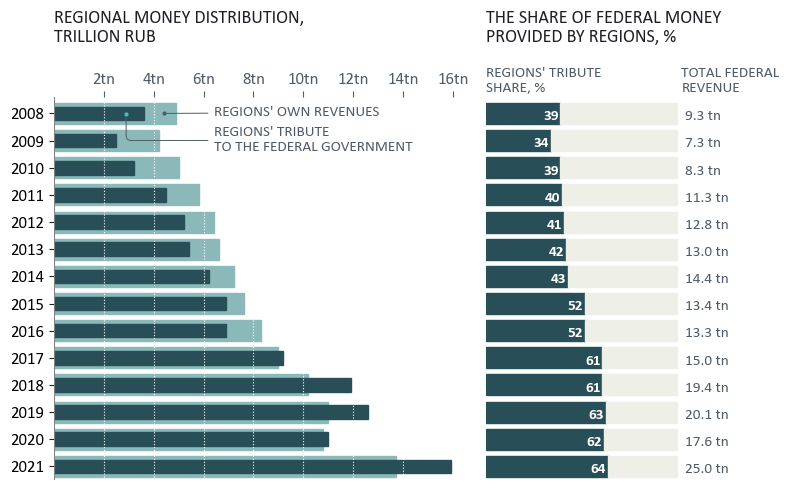

In [5]:
# STYLE PARAMETERS

# all
hfont = {'fontname': 'Calibri'}
font_color = 'k'

# ticklabels
x_color = '#4f5b66'
y_color = 'k'
ticklabelsize = 12

# annotations
annotate_fontsize = 11

# THE CHART

yticks = flows_table.index  # years
bars_1 = flows_table[
    'reg_own_revenue']  # the amount of revenue regions make and use for their own needs
bars_2 = flows_table[
    'tax_to_fed']  # the amount of taxes that regions pay to the federal budget
bars_3 = flows_table[
    'fedrev_regtax_share']  # the percentage of reginal taxes in the federal budget
bars_4 = flows_table[
    'fedrev_nonregtax_share']  # the percentage of other taxes and non-tax revenues of the federal budget
bars_5 = flows_table['fed_revenue']  # total amount of federal revenue
bars_6 = bars_3 + bars_4  # 100% of federal revenue

bar_width_1 = 0.085
bar_width_2 = 0.05
y_range = np.arange(len(bars_1) / 10, step=0.1)

fig = plt.figure(figsize=(8, 5), facecolor='w')
gs = gridspec.GridSpec(1, 3)

# a horizontal bar chart with overlapping bars
ax1 = fig.add_subplot(gs[0, :2])
ax1.barh(y_range,
         bars_1,
         left=0,
         color='#8bb9b9',
         edgecolor='#8bb9b9',
         height=bar_width_1 / 1.1,
         label="own revenues",
         zorder=0)
ax1.barh(y_range,
         bars_2,
         left=0,
         color='#284e57',
         edgecolor='#284e57',
         height=bar_width_2 / 1,
         label="tribute to federal budget",
         zorder=0)

# a horizontal bar chart with percentages
ax2 = fig.add_subplot(gs[0, 2], sharey=ax1)
ax2.barh(y_range,
         bars_3,
         left=0,
         color='#284e57',
         edgecolor='#284e57',
         height=bar_width_1 / 1.1)
ax2.barh(y_range,
         bars_4,
         left=bars_3,
         color='#eef0e7',
         edgecolor='#eef0e7',
         height=bar_width_1 / 1.1)

# the percentages subplot: annotating the percentages inside the bars
for n, x in enumerate([*bars_3.index.values]):
    position = bars_3.loc[x]
    ax2.text(x=(position - 1),
             y=n / 10 + 0.025,
             s=f'{position}',
             color="w",
             fontsize=11,
             fontweight='bold',
             horizontalalignment='right',
             **hfont)

# the percentages subplot: annotating the totals outside the bars
for n, x in enumerate([*bars_6.index.values]):
    position = bars_6.loc[x]
    values = bars_5.loc[x]
    ax2.text(x=(position + 4),
             y=n / 10 + 0.025,
             s=f'{values} tn',
             color="#4f5b66",
             fontsize=11,
             horizontalalignment='left',
             **hfont)

ax1.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax1.set_xticklabels(
    ['', '2tn', '4tn', '6tn', '8tn', '10tn', '12tn', '14tn', '16tn'])
ax1.set_yticks(y_range)
ax1.set_yticklabels(yticks)
ax1.tick_params(axis='x',
                labelsize=10,
                colors='#4f5b66',
                direction='out',
                color='#4f5b66',
                length=4,
                top=True,
                bottom=False,
                labeltop=True,
                labelbottom=False)
ax1.tick_params(axis='y', labelsize=11, colors='#1e1f26')
xticks = ax1.xaxis.get_major_ticks()
xticks[0].set_visible(False)
for label in ax1.get_xticklabels():
    label.set(fontsize=12, color=x_color, **hfont)
for label in ax1.get_yticklabels():
    label.set(fontsize=12, color=y_color, **hfont)

ax1.grid(False)
ax1.grid(axis='x', color='w', linestyle=':', zorder=3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_ylim(-0.06, 1.35)
ax1.invert_yaxis()

ax1.axvline(x=0, color='gray')

ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# annotations
ax1.annotate("REGIONS' OWN REVENUES",
             xy=(flows_table['reg_own_revenue'][2008] - 0.5, y_range[0]),
             xytext=(flows_table['reg_own_revenue'][2008] + 1.5,
                     y_range[0] + 0.01),
             arrowprops=dict(arrowstyle='-', color='#4f5b66', lw=0.7),
             fontsize=11,
             color='#4f5b66',
             **hfont)
ax1.plot(flows_table['reg_own_revenue'][2008] - 0.5,
         y_range[0] - 0.002,
         '.',
         markersize=4,
         color='#4f5b66')

ax1.annotate("REGIONS' TRIBUTE\nTO THE FEDERAL GOVERNMENT",
             xy=(flows_table['reg_own_revenue'][2008] - 2, y_range[0]),
             xytext=(flows_table['reg_own_revenue'][2008] + 1.5,
                     y_range[0] + 0.14),
             arrowprops=dict(arrowstyle='-',
                             color='#4f5b66',
                             lw=0.7,
                             connectionstyle="angle,angleA=0,angleB=90,rad=5"),
             fontsize=11,
             color='#4f5b66',
             **hfont)
ax1.plot(flows_table['reg_own_revenue'][2008] - 2,
         y_range[0] + 0.002,
         '.',
         markersize=4,
         color='#44c1c5')

ax2.text(flows_table['fed_revenue'][2008] - 9,
         y_range[0] - 0.08,
         "REGIONS' TRIBUTE\nSHARE, %",
         color='#4f5b66',
         fontsize=11,
         **hfont)
ax2.text(flows_table['fed_revenue'][2008] + 93,
         y_range[0] - 0.08,
         'TOTAL FEDERAL\nREVENUE',
         color='#4f5b66',
         fontsize=11,
         **hfont)

# titles
ax1.set_title('REGIONAL MONEY DISTRIBUTION,\nTRILLION RUB',
              fontsize=13,
              color='#1e1f26',
              loc='left',
              pad=40,
              **hfont)
ax2.set_title('THE SHARE OF FEDERAL MONEY\nPROVIDED BY REGIONS, %',
              fontsize=13,
              color='#1e1f26',
              loc='left',
              pad=40,
              **hfont)

fig.tight_layout()

plt.rcParams['figure.constrained_layout.use'] = True

plt.show()

plt.rcParams['figure.constrained_layout.use'] = False

### Key takeaways

- Until 2016, the majority of the money stayed in the regions where it was earned, but since 2017, regions' payments to the state have exceeded their own earnings (which include both taxes and non-tax revenues).


- Simultaneously, the regional share of federal revenues has grown from below 40% to almost 65% during the last 10 years. The most remarkable shift took place in 2017, when it jumped almost 10 percentage points.

### [Regions' contributions to the federal budget now exceed their revenues up to 12 times](#contents) <a class="anchor" id="part_1_2"></a>

So, in total, regions give the state more than 100% of their revenues. But what about individual regions? Let's check the balance between how much each region makes and how much it pays to the federal government.

The chart below estimates the amount of taxes as a percentage of the region's own revenues for 2011 and 2021. The region's own revenue for the year is equal to 100%.

In [6]:
# regional data for 2011 and 2021: 1) own revenue 2) taxes paid to the federal budget
regs_for_graph = df.query(
    'i1 == 1 & r1 in (1, 3) & r3 == 0 & year in (2011,2021)')[[
        'year', 'index', 'region_eng', 'value'
    ]].pivot(index=['year', 'region_eng'], columns='index', values='value')

# the percentage of a region's own revenue that its federal taxes are equal to
regs_for_graph['fedtax_share'] = (regs_for_graph['tax_to_fed'] /
                                  regs_for_graph['reg_own_revenue'] *
                                  100).round(1)

# making columns for 2011 and 2021
regs_for_graph = regs_for_graph.query('tax_to_fed >= 0').reset_index().pivot(
    index='region_eng', columns='year',
    values='fedtax_share').dropna().sort_values(by=2021).reset_index()

regs_for_graph['region_eng'] = regs_for_graph['region_eng'].str.title()

# how did the federal tax/own revenue ratio change in percentage points
regs_for_graph['diff'] = regs_for_graph[2021] - regs_for_graph[2011]

regs_for_graph.head()

year          region_eng  2011  2021  diff
0                   Tyva   3.5   1.8  -1.7
1               Buryatia  11.6   3.2  -8.4
2        Kamchatsky Krai  17.4  13.1  -4.3
3     Arkhangelsk Oblast  17.9  14.4  -3.5
4         Vologda Oblast  13.6  14.7   1.1

#### [Chart 02: What percentage of a region's revenue was its federal tax equal to in 2011 and 2021](#contents) <a class="anchor" id="chart_02"></a>

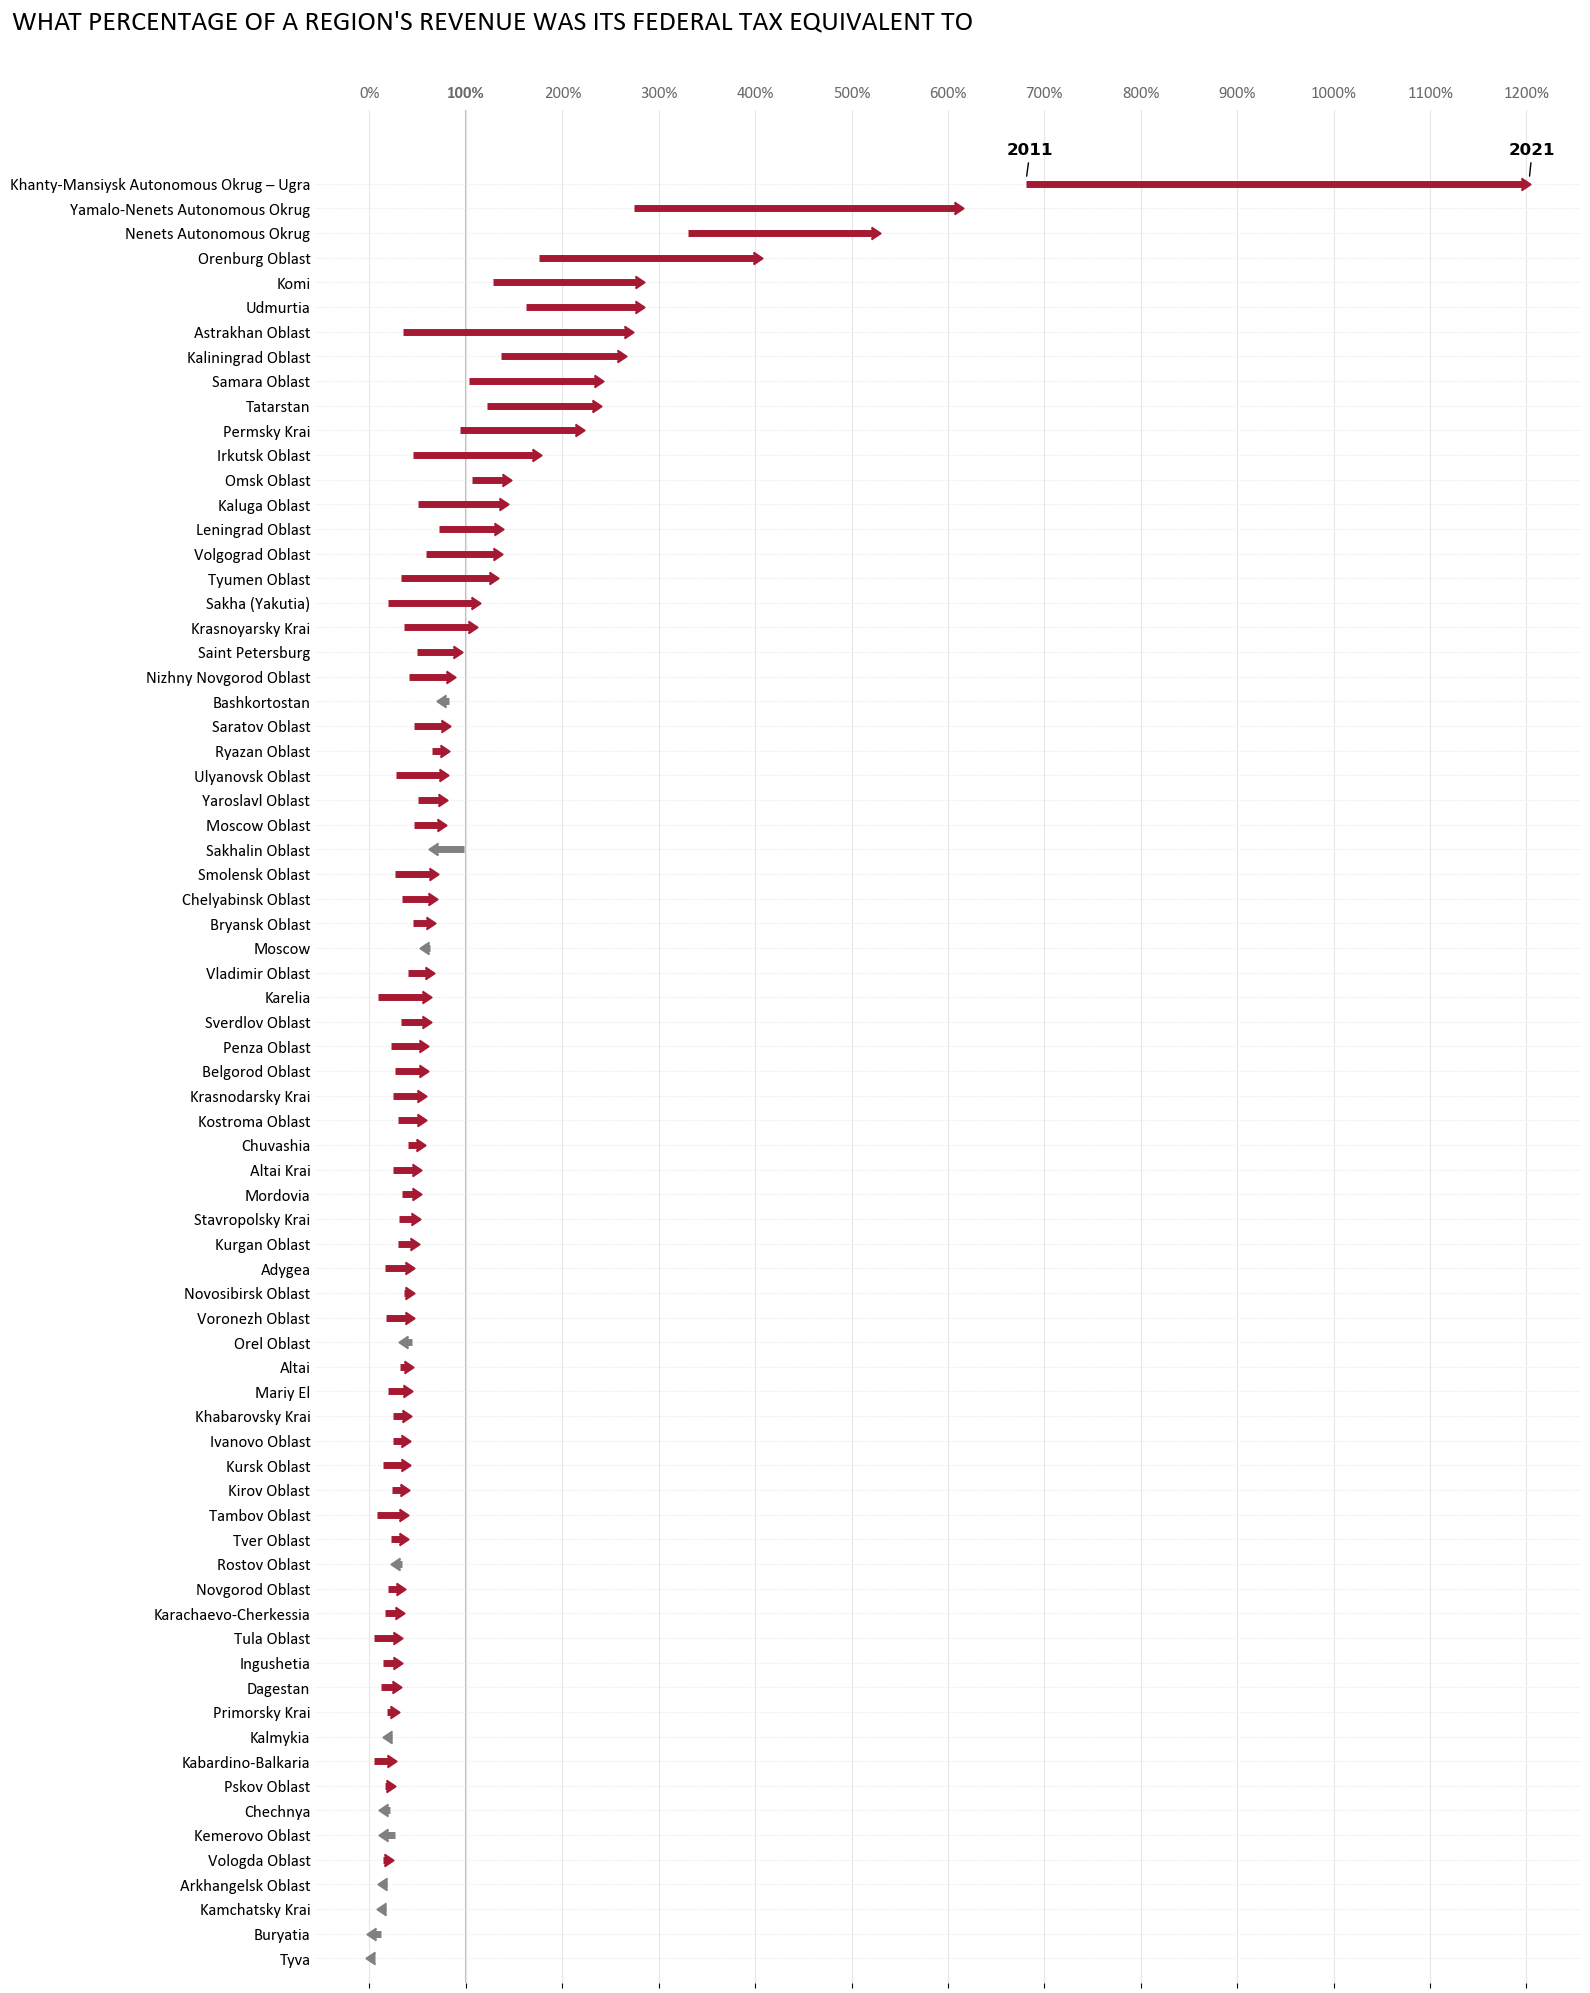

In [7]:
hfont = {'fontname': 'Calibri'}
font_color = 'k'

plt.figure(figsize=(16, 20))
y_range = range(len(regs_for_graph.index))

# a color dictionary for growing and falling shares
color_lines = dict()
for i in y_range:
    color_lines = []
    for val in regs_for_graph['diff']:
        if val > 0:
            color_lines.append('#A61932')
        else:
            color_lines.append('#808080')

# dividing the growing and falling values to draw an "arrow" on the corresponding side
z = regs_for_graph['diff']
mask1 = z > 0
mask2 = z < 0

# a modified dumbbell chart: a line, and an arrow on one of its sides
ax = plt.axes(frameon=False)
plt.hlines(y_range,
           xmin=regs_for_graph[2011],
           xmax=regs_for_graph[2021] + 2,
           color=color_lines,
           edgecolor=color_lines,
           lw=5,
           zorder=3)
plt.scatter(regs_for_graph[2021][mask2] + 4,
            regs_for_graph[mask2].index,
            color='#808080',
            s=75,
            marker=matplotlib.markers.CARETLEFTBASE,
            label=2011,
            zorder=4)
plt.scatter(regs_for_graph[2021][mask1],
            regs_for_graph[mask1].index,
            color='#A61932',
            s=75,
            marker=matplotlib.markers.CARETRIGHTBASE,
            label=2021,
            zorder=4)

# annotations for the top dumbbell
plt.annotate(2011,
             xy=(regs_for_graph[2011][72], y_range[72] + 0.2),
             xytext=(regs_for_graph[2011][72] - 20, y_range[72] + 1.2),
             arrowprops=dict(arrowstyle='-', color='k', lw=1),
             fontsize=12,
             fontweight='bold')
plt.annotate(2021,
             xy=(regs_for_graph[2021][72] + 9, y_range[72] + 0.2),
             xytext=(regs_for_graph[2021][72] - 12, y_range[72] + 1.2),
             arrowprops=dict(arrowstyle='-', color='k', lw=1),
             fontsize=12,
             fontweight='bold')

# axes, grid and ticklabels design
plt.gca().yaxis.grid(color='#E6E6E6', linestyle=':')
plt.gca().xaxis.grid(color='#E6E6E6', linestyle='-')
ax.legend().set_visible(False)

plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
ax.get_xticklabels()[1].set_weight('bold')
ax.yaxis.set_tick_params(length=0)

for label in ax.get_xticklabels():
    label.set(fontsize=12, color='dimgray', **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=12, color=font_color, **hfont)

plt.yticks(y_range, regs_for_graph['region_eng'])
plt.ylim(-1, 75)

# 100% is the amount of revenue for the year
ynew = 100
ax.axvline(ynew, color='#BFBFBF', linestyle='-', zorder=1)

plt.title(
    "WHAT PERCENTAGE OF A REGION'S REVENUE WAS ITS FEDERAL TAX EQUIVALENT TO",
    x=0.14,
    y=1.01,
    fontsize=20,
    pad=45,
    **hfont)

plt.tight_layout()

plt.show()

### Key takeaways

- The federal tax/own revenue ratio has grown in the vast majority of regions.


- The number of regions paying taxes equal to or greater than 100% of their own revenues nearly doubled between 2011 and 2021, rising from 10 to 19. The leaders are the Khanty-Mansiysk Autonomous Okrug, which transferred money equal to 12 own revenues in 2021; the Yamalo-Nenets Autonomous Okrug (more than six own revenues); the Nenets Autonomous Okrug (more than five own revenues); Orenburg Oblast (four); Tomsk Oblast, Komi, and Udmurtia (almost three yearly revenues each). All of them used to be federal donors in 2011 as well, but the amounts of money contributed were closer to their own earnings then.


- The most notable growth in the federal tax/own revenue ratio was in Astrakhan Oblast: it used to pay less than 50% of revenue, and now gives away almost 300%.


- Almost all of the top-payers are oil-producing.


- The remainder of the regions contribute less than they earn. But the federal tax/own revenue ratio has grown in the majority of them anyway. Namely, the number of regions that pay the money equivalent to 50–100% of their revenues has grown from 10 to 19.


- Only a few regions saw a decrease in ratio, including wealthy ones like Bashkortostan, Sakhalin, and Moscow.

### [The structure of the regions' payments to the federal center](#contents) <a class="anchor" id="part_1_3"></a>

If we look at the regions that pay taxes to the federal budget equal to 100% or more of their own revenues, we see that almost all of these regions are oil-bearing. However, the ratio between taxes and revenues has grown not only in mining regions. 

Let's check how the total amount of the regional payment to the federal center is distributed among different types of taxes.

In [8]:
# total federal taxes by item
fed_tax = (
    df.query('i1 == 2 & r1 == 3 & r3 != 0 & r5 == 0').set_index('index')[[
        'year', 'value'
    ]].reset_index().pivot(index='year', columns='index', values='value') /
    1000000000000).round(1)

# top-5 tax types by the 11-year average amount (for the chart)
fed_tax = fed_tax.reindex(fed_tax.mean().sort_values(ascending=False).index,
                          axis=1)

# making top-5 and "other taxes" columns
fed_tax['other taxes'] = fed_tax.iloc[:, 6:].sum(axis=1) + fed_tax.iloc[:, 4]
fed_tax = fed_tax.iloc[:, [0, 1, 2, 3, 5, -1]]

fed_tax = fed_tax.rename(
    columns={
        'additional income from hydrocarbon extraction tax':
        'hydrocarbon extraction tax',
        'corporate income tax full': 'corporate income tax',
        'vat on sales': 'VAT on sales'
    })

fed_tax

index  minerals extraction tax  VAT on sales  corporate income tax  excises  \
year                                                                          
2011                       2.0           1.8                   0.3      0.2   
2012                       2.4           1.9                   0.4      0.3   
2013                       2.5           1.9                   0.4      0.5   
2014                       2.9           2.2                   0.4      0.5   
2015                       3.2           2.4                   0.5      0.5   
2016                       2.9           2.7                   0.5      0.6   
2017                       4.1           3.1                   0.8      0.9   
2018                       6.1           3.6                   1.0      0.9   
2019                       6.0           4.3                   1.2      0.5   
2020                       3.9           4.3                   1.1      1.0   
2021                       7.2           5.5                   1.6     -0.3   

index  hydrocarbon extraction tax  other taxes  
year                                            
2011                          0.0          0.1  
2012                          0.0          0.1  
2013                          0.0          0.1  
2014                          0.0          0.1  
2015                          0.0          0.1  
2016                          0.0          0.2  
2017                          0.0          0.2  
2018                          0.0          0.2  
2019                          0.1          0.2  
2020                          0.1          0.2  
2021                          1.0          0.3

#### [Chart 03: Amount of taxes paid to the federal center each year: types of taxes](#contents)  <a class="anchor" id="chart_03"></a>

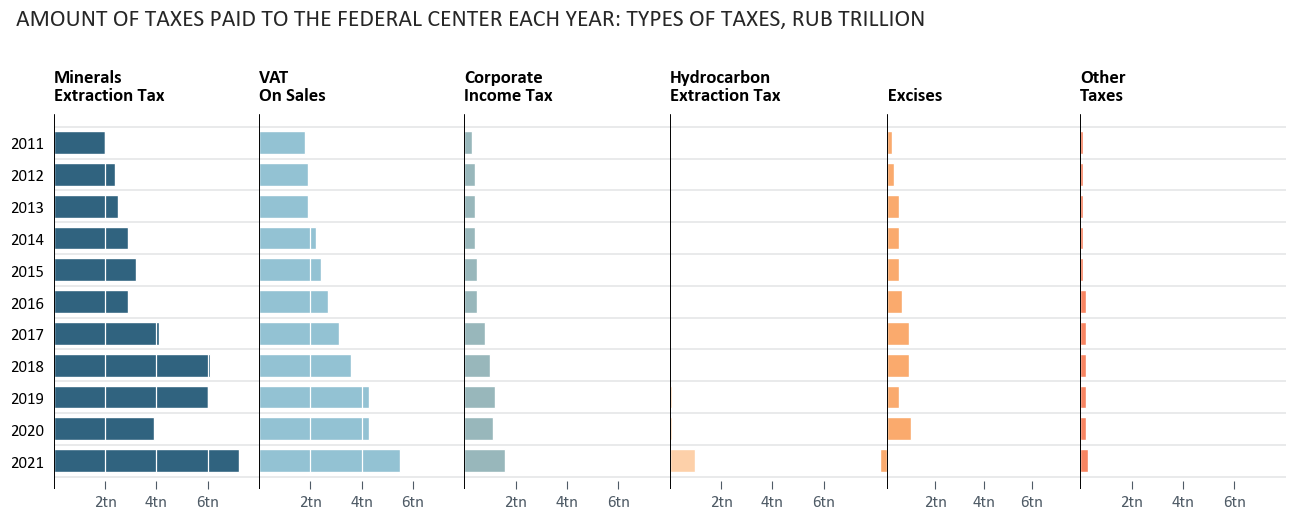

In [9]:
index = fed_tax.index

cols = [
    fed_tax['minerals extraction tax'], fed_tax['VAT on sales'],
    fed_tax['corporate income tax'], fed_tax['hydrocarbon extraction tax'],
    fed_tax['excises'], fed_tax['other taxes']
]

titles = [
    'Minerals\nExtraction Tax', 'VAT\nOn Sales', 'Corporate\nIncome Tax',
    'Hydrocarbon\nExtraction Tax', '   Excises', 'Other\nTaxes'
]

colors = ['#30637f', '#93c2d3', '#98b7bb', '#fdd0a9', '#faaa6d', '#f78562']

hfont = {'fontname': 'Calibri'}

sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(16, 5), facecolor='w', ncols=6, sharey=True)
fig.tight_layout()

# a cycle to build subplots
for i in range(6):
    axes[i].barh(index,
                 cols[i],
                 align='center',
                 height=0.72,
                 color=colors[i],
                 zorder=0)
    axes[i].set_title(titles[i],
                      loc='left',
                      fontsize=13.5,
                      fontweight='bold',
                      pad=10,
                      color='k',
                      **hfont)
    axes[i].xaxis.tick_bottom()
    axes[i].tick_params(axis='x', color='#4f5b66', length=6, direction='in')
    if i != 4:
        axes[i].set_xticks([2, 4, 6, 8])
        axes[i].xaxis.get_major_ticks()[3].set_visible(False)
        axes[i].set_xticklabels(['2tn', '4tn', '6tn', ''])
    else:
        axes[i].set_xticks([-0.5, 2, 4, 6, 8])
        axes[i].xaxis.get_major_ticks()[0].set_visible(False)
        axes[i].xaxis.get_major_ticks()[4].set_visible(False)
        axes[i].set_xticklabels(['', '2tn', '4tn', '6tn', ''])
    # minor ticks for the y axis to place the bars between the gridlines
    axes[i].yaxis.set_minor_locator(
        mtick.FixedLocator(np.arange(2010.5, 2022, 1)))
    axes[i].yaxis.set_major_locator(
        mtick.FixedLocator(np.arange(2011, 2022, 1)))
    axes[i].set_yticklabels(np.arange(2011, 2022, 1))
    # gridlines y based on minor ticks
    axes[i].grid(which='major',
                 axis='x',
                 color='w',
                 linestyle='-',
                 linewidth=0.9,
                 zorder=2)
    axes[i].grid(which='minor',
                 axis='y',
                 color='#343d46',
                 linestyle='-',
                 linewidth=0.15,
                 zorder=3)
    axes[i].grid(visible=None, which='major', axis='y')
    axes[i].axvline(0, color='k', linewidth=0.7, zorder=2)
    for label in axes[0].get_yticklabels():
        label.set(fontsize=12, color='k', **hfont)
    for label in axes[i].get_xticklabels():
        label.set(fontsize=12, color='#4f5b66', **hfont)

plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True, right=True)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

plt.suptitle(
    'AMOUNT OF TAXES PAID TO THE FEDERAL CENTER EACH YEAR: TYPES OF TAXES, RUB TRILLION',
    x=0.725,
    y=1.06,
    fontsize=17,
    ha='right',
    va='top',
    **hfont)

plt.show()

#### Key takeaways

- There was a huge jump in mining tax revenues in 2018, and eventually they more than tripled in 2021 compared to 2011.


- However, the other kinds of taxes have also shown progressive growth, especially VAT on sales, which increased more steadily and almost tripled by 2021; the corporate income tax; and the new hydrocarbon extraction tax. 


- Excises have also contributed significantly to tax revenues, though not in 2021, when there was a large tax refund.

What particular items constitute the mining tax revenue growth? Specifically, <b>the oil</b>:

#### [Table 01: The mining taxes input](#contents) <a class="anchor" id="table_01"></a>

In [10]:
mining = df.query('i1 == 2 & r1 == 3 & r3 == 7 & r4 == 1 & r5 != 0')[[
    'index', 'year', 'value'
]].pivot(index='index', columns='year', values='value') / 1000000000000


# a function highlighting a row with values higher than the given threshold
def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return [
        'background-color: #93c2d3' if is_max.any() else '' for v in is_max
    ]


mining.style.apply(highlight_greaterthan, threshold=6, column=2021,
                   axis=1).format(precision=1)

### [Small payers become big](#contents) <a class="anchor" id="part_1_4"></a>

In this chunk we'll modify the previous chart to see which regions are responsible for the accelerated tax revenue growth.

In [11]:
# regional data on the total sum of taxes paid to the state
fed_tax_reg = (df.query('i1 == 1 & r1 == 3 & r3 == 0')[[
    'region_eng', 'year', 'value'
]].pivot(index='year', columns='region_eng', values='value') /
               1000000000000).round(1)

# sorting to find top-5 by mean value
fed_tax_reg = fed_tax_reg.reindex(
    fed_tax_reg.mean().sort_values(ascending=False).index, axis=1)

# "other regions" column
fed_tax_reg['other regions'] = fed_tax_reg.iloc[:, 5:].sum(axis=1)
fed_tax_reg = fed_tax_reg.iloc[:, [0, 1, 2, 3, 4, -1]]

fed_tax_reg

region_eng  khanty-mansiysk autonomous okrug – ugra  moscow  \
year                                                          
2011                                            1.3     0.8   
2012                                            1.5     0.9   
2013                                            1.5     0.8   
2014                                            1.7     0.9   
2015                                            1.7     1.1   
2016                                            1.4     1.1   
2017                                            2.0     1.3   
2018                                            3.1     1.4   
2019                                            3.1     1.6   
2020                                            2.0     1.8   
2021                                            3.7     1.9   

region_eng  yamalo-nenets autonomous okrug  saint petersburg  tatarstan  \
year                                                                      
2011                                   0.3               0.2        0.2   
2012                                   0.5               0.2        0.2   
2013                                   0.5               0.2        0.2   
2014                                   0.6               0.3        0.2   
2015                                   0.6               0.4        0.2   
2016                                   0.7               0.5        0.2   
2017                                   0.9               0.6        0.4   
2018                                   1.2               0.7        0.5   
2019                                   1.3               0.7        0.6   
2020                                   1.0               1.0        0.4   
2021                                   1.6               0.7        0.8   

region_eng  other regions  
year                       
2011                  1.2  
2012                  1.3  
2013                  1.4  
2014                  2.1  
2015                  2.4  
2016                  2.4  
2017                  3.6  
2018                  4.5  
2019                  5.0  
2020                  4.3  
2021                  6.4

#### [Chart 04: Amount of taxes paid to the federal center each year: regions](#contents) <a class="anchor" id="chart_04"></a>

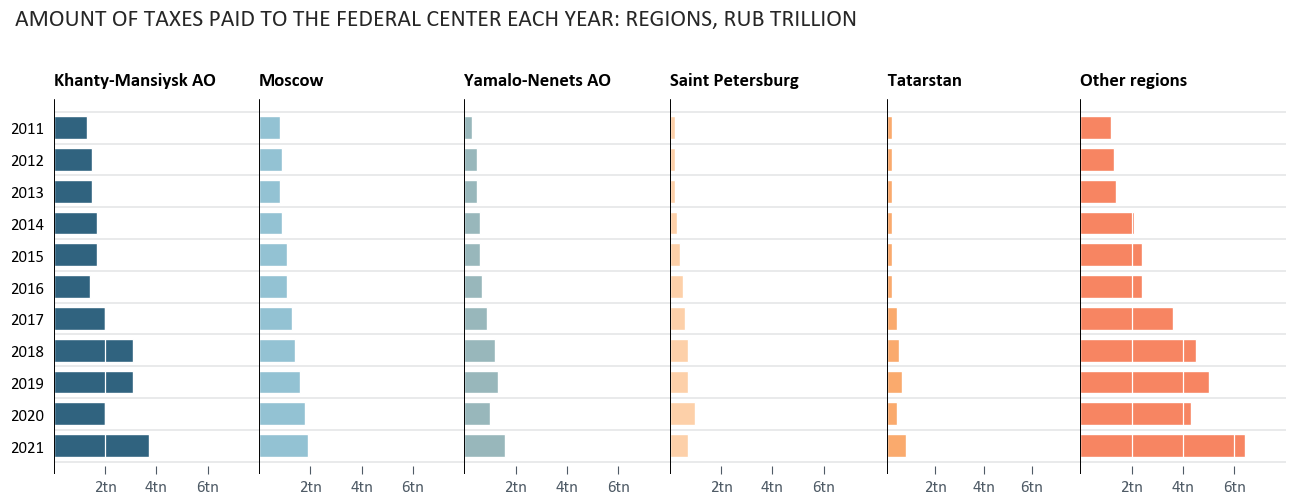

In [12]:
index = fed_tax_reg.index

cols = [fed_tax_reg.iloc[:, 0], fed_tax_reg.iloc[:, 1], fed_tax_reg.iloc[:, 2],
        fed_tax_reg.iloc[:, 3], fed_tax_reg.iloc[:, 4], fed_tax_reg.iloc[:, 5]]

titles = ['Khanty-Mansiysk AO', 'Moscow', 'Yamalo-Nenets AO',
          'Saint Petersburg', '   Tatarstan', 'Other regions']

colors = ['#30637f', '#93c2d3', '#98b7bb', '#fdd0a9', '#faaa6d', '#f78562']

hfont = {'fontname':'Calibri'}

sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(16,5), facecolor='w', ncols=6, sharey=True)
fig.tight_layout()

# a cycle to build subplots
for i in range(6):
    axes[i].barh(index, cols[i], align='center', height=0.72, color=colors[i], zorder=0)
    axes[i].set_title(titles[i], loc='left', fontsize=13.5, fontweight='bold', pad=10, color='k', **hfont)
    axes[i].xaxis.tick_bottom()
    axes[i].tick_params(axis='x', color='#4f5b66', length=6, direction='in')
    if i != 4:
        axes[i].set_xticks([2, 4, 6, 8])
        axes[i].xaxis.get_major_ticks()[3].set_visible(False)
        axes[i].set_xticklabels(['2tn', '4tn', '6tn', ''])
    else:
        axes[i].set_xticks([-0.5, 2, 4, 6, 8])
        axes[i].xaxis.get_major_ticks()[0].set_visible(False)
        axes[i].xaxis.get_major_ticks()[4].set_visible(False)
        axes[i].set_xticklabels(['', '2tn', '4tn', '6tn', ''])
    # we need minor ticks for the y axis to place the bars between the gridlines
    axes[i].yaxis.set_minor_locator(mtick.FixedLocator(np.arange(2010.5, 2022, 1)))
    axes[i].yaxis.set_major_locator(mtick.FixedLocator(np.arange(2011, 2022, 1)))
    axes[i].set_yticklabels(np.arange(2011, 2022, 1))
    # gridlines y based on minor ticks
    axes[i].grid(which='major', axis='x', color='w', linestyle='-', linewidth=0.9, zorder=2)
    axes[i].grid(which='minor', axis='y', color='#343d46', linestyle='-', linewidth=0.15, zorder=3)
    axes[i].grid(visible=None, which='major', axis='y')
    axes[i].axvline(0, color='k', linewidth=0.7, zorder=2)
    for label in axes[0].get_yticklabels():
        label.set(fontsize=12, color='k', **hfont)
    for label in axes[i].get_xticklabels():
        label.set(fontsize=12, color='#4f5b66', **hfont)

plt.gca().invert_yaxis()
sns.despine(left=True, bottom=True, right=True)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

plt.suptitle('AMOUNT OF TAXES PAID TO THE FEDERAL CENTER EACH YEAR: REGIONS, RUB TRILLION',
             x=0.682, y=1.03, fontsize=17, ha='right', va='top', **hfont)

plt.show()

#### Key takeaways

- 50% of all taxes going to the federal budget are traditionally collected by four leading regions: Khanty-Mansiysk autonomous district, Yamalo-Nenets autonomous district, Moscow, and (till 2020) Saint Petersburg or (starting from 2021) Tatarstan.


- There has been a synchronized notable increase in revenues in 2018, 2019, and 2021 in oil-producing regions, namely, Khanty-Mansiysk, Yamalo-Nenets autonomous districts, as well as Tatarstan. And it seems to be a similar tendency in the "other" regions, whose role has become more important since 2011, and which now provide about 40% of all tax revenue.


- In Moscow and Saint Petersburg, the growth has been steady, with only a contraction in the latter in 2021.

Let's calculate each region's input into the growth of the total sum of mining tax, total sum of VAT, corporate income tax, new hydrocarbon tax, and sum of them all.

#### [Table 02: Each region's input into federal tax growth in 2011-2021](#contents) <a class="anchor" id="table_02"></a>

In [13]:
# key taxes sums in 2011 and 2021 for each region
key_taxes_change = df.query(
    '(i1 == 1 & r1 == 3 & r3 == 3 & r4 == 1) | (i1 == 1 & r1 == 3 & r3 == 7 & r4 == 5 & r5 == 0) | (i1 == 1 & r1 == 3 & r3 == 1 & r4 == 1 & r5 == 0) | (i1 == 1 & r1 == 3 & r3 == 7 & r4 == 1 & r5 == 0)'
)[['region_eng', 'index', 'year',
   'value']].query('year in (2011,2021)').pivot(index=['region_eng', 'index'],
                                                columns='year',
                                                values='value')

# the difference in sums between 2021 and 2011
key_taxes_change[
    'difference'] = key_taxes_change[2021] - key_taxes_change[2011]

# taxes types -> columns names, difference -> values
key_taxes_change = key_taxes_change.drop(
    [2011, 2021], axis=1).reset_index().pivot(index='region_eng',
                                              columns='index',
                                              values='difference')

# the 11-year difference in the sum of key taxes in each region between 2011 and 2021
key_taxes_change['all_key_taxes'] = key_taxes_change.sum(axis=1)

# the percentage of each region in the total 11-year change of each tax
key_taxes_change['perc_mining'] = (
    key_taxes_change['minerals extraction tax'] /
    key_taxes_change['minerals extraction tax'].sum() * 100).round(1)
key_taxes_change['perc_vat'] = (key_taxes_change['vat on sales'] /
                                key_taxes_change['vat on sales'].sum() *
                                100).round(1)
key_taxes_change['perc_corporate'] = (
    key_taxes_change['corporate income tax full'] /
    key_taxes_change['corporate income tax full'].sum() * 100).round(1)
key_taxes_change['perc_hydrocarbon'] = (
    key_taxes_change['additional income from hydrocarbon extraction tax'] /
    key_taxes_change['additional income from hydrocarbon extraction tax'].sum(
    ) * 100).round(1)

# the proportion of each region in the eleven-year change in total key tax amount
key_taxes_change['perc_all_key'] = (key_taxes_change['all_key_taxes'] /
                                    key_taxes_change['all_key_taxes'].sum() *
                                    100).round(1)

# each region's cumulative contribution to the 11-year change in total key tax amount
key_taxes_change = key_taxes_change.sort_values(by='perc_all_key',
                                                ascending=False)
key_taxes_change['cum_perc'] = ((key_taxes_change['perc_all_key'].cumsum() /
                                 key_taxes_change['perc_all_key'].sum()) *
                                100).round(1)
key_taxes_change = key_taxes_change.iloc[:, -6:]

key_taxes_change.columns = [
    'Input in Mining Tax Change (%)', 'Input in VAT Tax Change (%)',
    'Input in Corporate Income Tax Change (%)',
    'Input in Hydrocarbon Tax Change (%)', 'Input in Four Taxes Change (%)',
    'Cumulative Input (%)'
]
key_taxes_change.index = key_taxes_change.index.str.title()


def highlight_cols(s):
    color = '#93c2d3'
    return 'background-color: %s' % color


key_taxes_change.head(30).style.applymap(
    highlight_cols,
    subset=pd.IndexSlice[:, ['Cumulative Input (%)']]).format(precision=1)

#### Key takeaways

- In terms of the sum of key taxes, the top 10 regions provide 73% of growth, the top 15 provide 84%, and all these regions, with the exception of Moscow, Moscow Oblast, and Saint Petersburg, are oil-bearing. The 20 regions provide 90% growth, and the top 30 give 96%.


- Each tax has a locomotive or two. E.g., more than 50% of mining tax growth is provided by Khanty-Mansiysk and Yamalo-Nenets autonomous districts; if we include Tatarstan in this list, the cumulative influence exceeds 62%.


- Revenue from VAT seems to be more fairly distributed, with more than 23% of growth being provided by Moscow. Moscow Oblast and Khanty-Mansiysk give about 9% each; and Saint Petersburg and Yamalo-Nenets give about 6% each; and we are still not at 50%.


- The most centralized federal tax of all is the corporate income tax, where 44% of growth is accounted for in Moscow and 9% in Saint Petersburg. This tax goes to the federal budget just partly: the tax rate is 20%, 3% of which goes to the state, and 17% goes to the regional budget.


- And the last one, which I call the hydrocarbon tax to be short, is an additional income tax that has been collected since 2019. It is 50% of the income from the production of hydrocarbon raw materials minus various costs. Its payers pay a lower mining oil tax—at about 60% of the standard rate. Here, more than 60% of growth has been provided by Khanty-Mansiysk, Moscow, and Yamalo-Nenets as well.

In the next chart, we'll explore those regions from the top 30 that accelerated the growth but didn't make it to the top 5 from the previous structure chart. What taxes accelerated their tribute growth?

In [14]:
# making a list of top-20 regions without Khanty-Mansiysk, Yamalo-Nenets, Moscow, Tatarstan, and Saint Petersburg
key_taxes_regions = key_taxes_change.head(
    25).index.str.lower().values  # top-25
key_taxes_regions_subtr = key_taxes_change.iloc[
    [0, 1, 2, 3, 9], :].index.str.lower().values  # to exclude
key_taxes_regions = list(
    set(key_taxes_regions) - set(key_taxes_regions_subtr))  # final list

# extracting data for regions from our list
key_taxes = df.query(
    '((i1 == 1 & r1 == 3 & r3 == 3 & r4 == 1) | (i1 == 1 & r1 == 3 & r3 == 7 & r4 == 1) | (i1 == 1 & r1 == 3 & r3 == 1 & r4 == 1 & r5 == 0) | (i1 == 1 & r1 == 3 & r3 == 7 & r4 == 5 & r5 == 0) | (i1 == 1 & i3 == 9)) & region_eng in @key_taxes_regions'
)[['index', 'region_eng', 'year', 'value']].pivot(index=['year', 'region_eng'],
                                                  columns='index',
                                                  values='value').fillna(0)

# -> RUB billions
key_taxes['vat'] = (key_taxes['vat on sales'] / 1000000000).round(1)
key_taxes['mining'] = (key_taxes['minerals extraction tax'] /
                       1000000000).round(1)
key_taxes['corporate'] = (key_taxes['corporate income tax full'] /
                          1000000000).round(1)
key_taxes['hydrocarbon'] = (
    key_taxes['additional income from hydrocarbon extraction tax'] /
    1000000000).round(1)
key_taxes['oil'] = (key_taxes['oil extraction tax'] / 1000000000).round(1)
key_taxes['gas'] = (key_taxes['gas extraction tax'] / 1000000000).round(1)
key_taxes['gas_condensate'] = (key_taxes['gas condensate extraction tax'] /
                               1000000000).round(1)

# making long data out of wide
key_taxes = key_taxes[[
    'vat', 'mining', 'corporate', 'hydrocarbon', 'oil', 'gas', 'gas_condensate'
]].reset_index()
table_graph = pd.melt(key_taxes,
                      id_vars=['year', 'region_eng'],
                      value_vars=[
                          'vat', 'corporate', 'hydrocarbon', 'oil', 'gas',
                          'gas_condensate'
                      ],
                      var_name='tax_type',
                      value_name='amount')
table_graph['region_eng'] = table_graph['region_eng'].str.title()
table_graph['year'] = table_graph['year'].astype('int')

table_graph.amount = table_graph.amount.mask(table_graph.amount.lt(0),
                                             0)  # if tax is negative, return 0
table_graph = table_graph.sort_values(by=['year', 'region_eng', 'tax_type'])

# a copy of a table to draw the edgelines of the aarea chart (linecharts)
table_graph_lines = table_graph.sort_values(
    by=['year', 'region_eng', 'tax_type'])

# a total amount of key taxes for each region
table_graph_lines['cum_amount'] = table_graph_lines.groupby(
    ['year', 'region_eng']).cumsum()

# a sorted (by 2021) list of regions to locate them on the chart (we'll make a grid)
table_graph_index = table_graph.pivot_table(
    index='region_eng', columns='year', values='amount',
    aggfunc='sum').fillna(0).astype('int')[[2021]].sort_values(
        by=2021, ascending=False).index.values.tolist()

# values for line charts
table_graph_lines = table_graph_lines.pivot(index=['region_eng', 'tax_type'],
                                            columns='year',
                                            values='cum_amount').fillna(0)

# values for area charts
table_graph = table_graph.pivot(index=['region_eng', 'tax_type'],
                                columns='year',
                                values='amount').fillna(0)

# reindexing the data for linecharts according to the list of regions
table_graph_lines = table_graph_lines.reindex(table_graph_index, level=0)

# reindexing the taxes inside each linechart
table_graph_lines = table_graph_lines.reindex(
    ['vat', 'oil', 'hydrocarbon', 'gas_condensate', 'gas', 'corporate'],
    level=1)

# reindexing the data for area charts according to the list of regions
table_graph = table_graph.reindex(table_graph_index, level=0)

table_graph.head()

year                          2011  2012  2013  2014  2015  2016  2017  2018  \
region_eng    tax_type                                                         
Moscow Oblast corporate        9.8  13.6  13.4  15.3  16.1  18.4  30.3  32.7   
              gas              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              gas_condensate   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              hydrocarbon      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
              oil              0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

year                          2019  2020  2021  
region_eng    tax_type                          
Moscow Oblast corporate       46.4  41.7  60.5  
              gas              0.0   0.0   0.0  
              gas_condensate   0.0   0.0   0.0  
              hydrocarbon      0.0   0.0   0.0  
              oil              0.0   0.0   0.0

#### [Chart 05: 20 key federal tax payers beyound the top-5](#contents)  <a class="anchor" id="chart_05"></a>

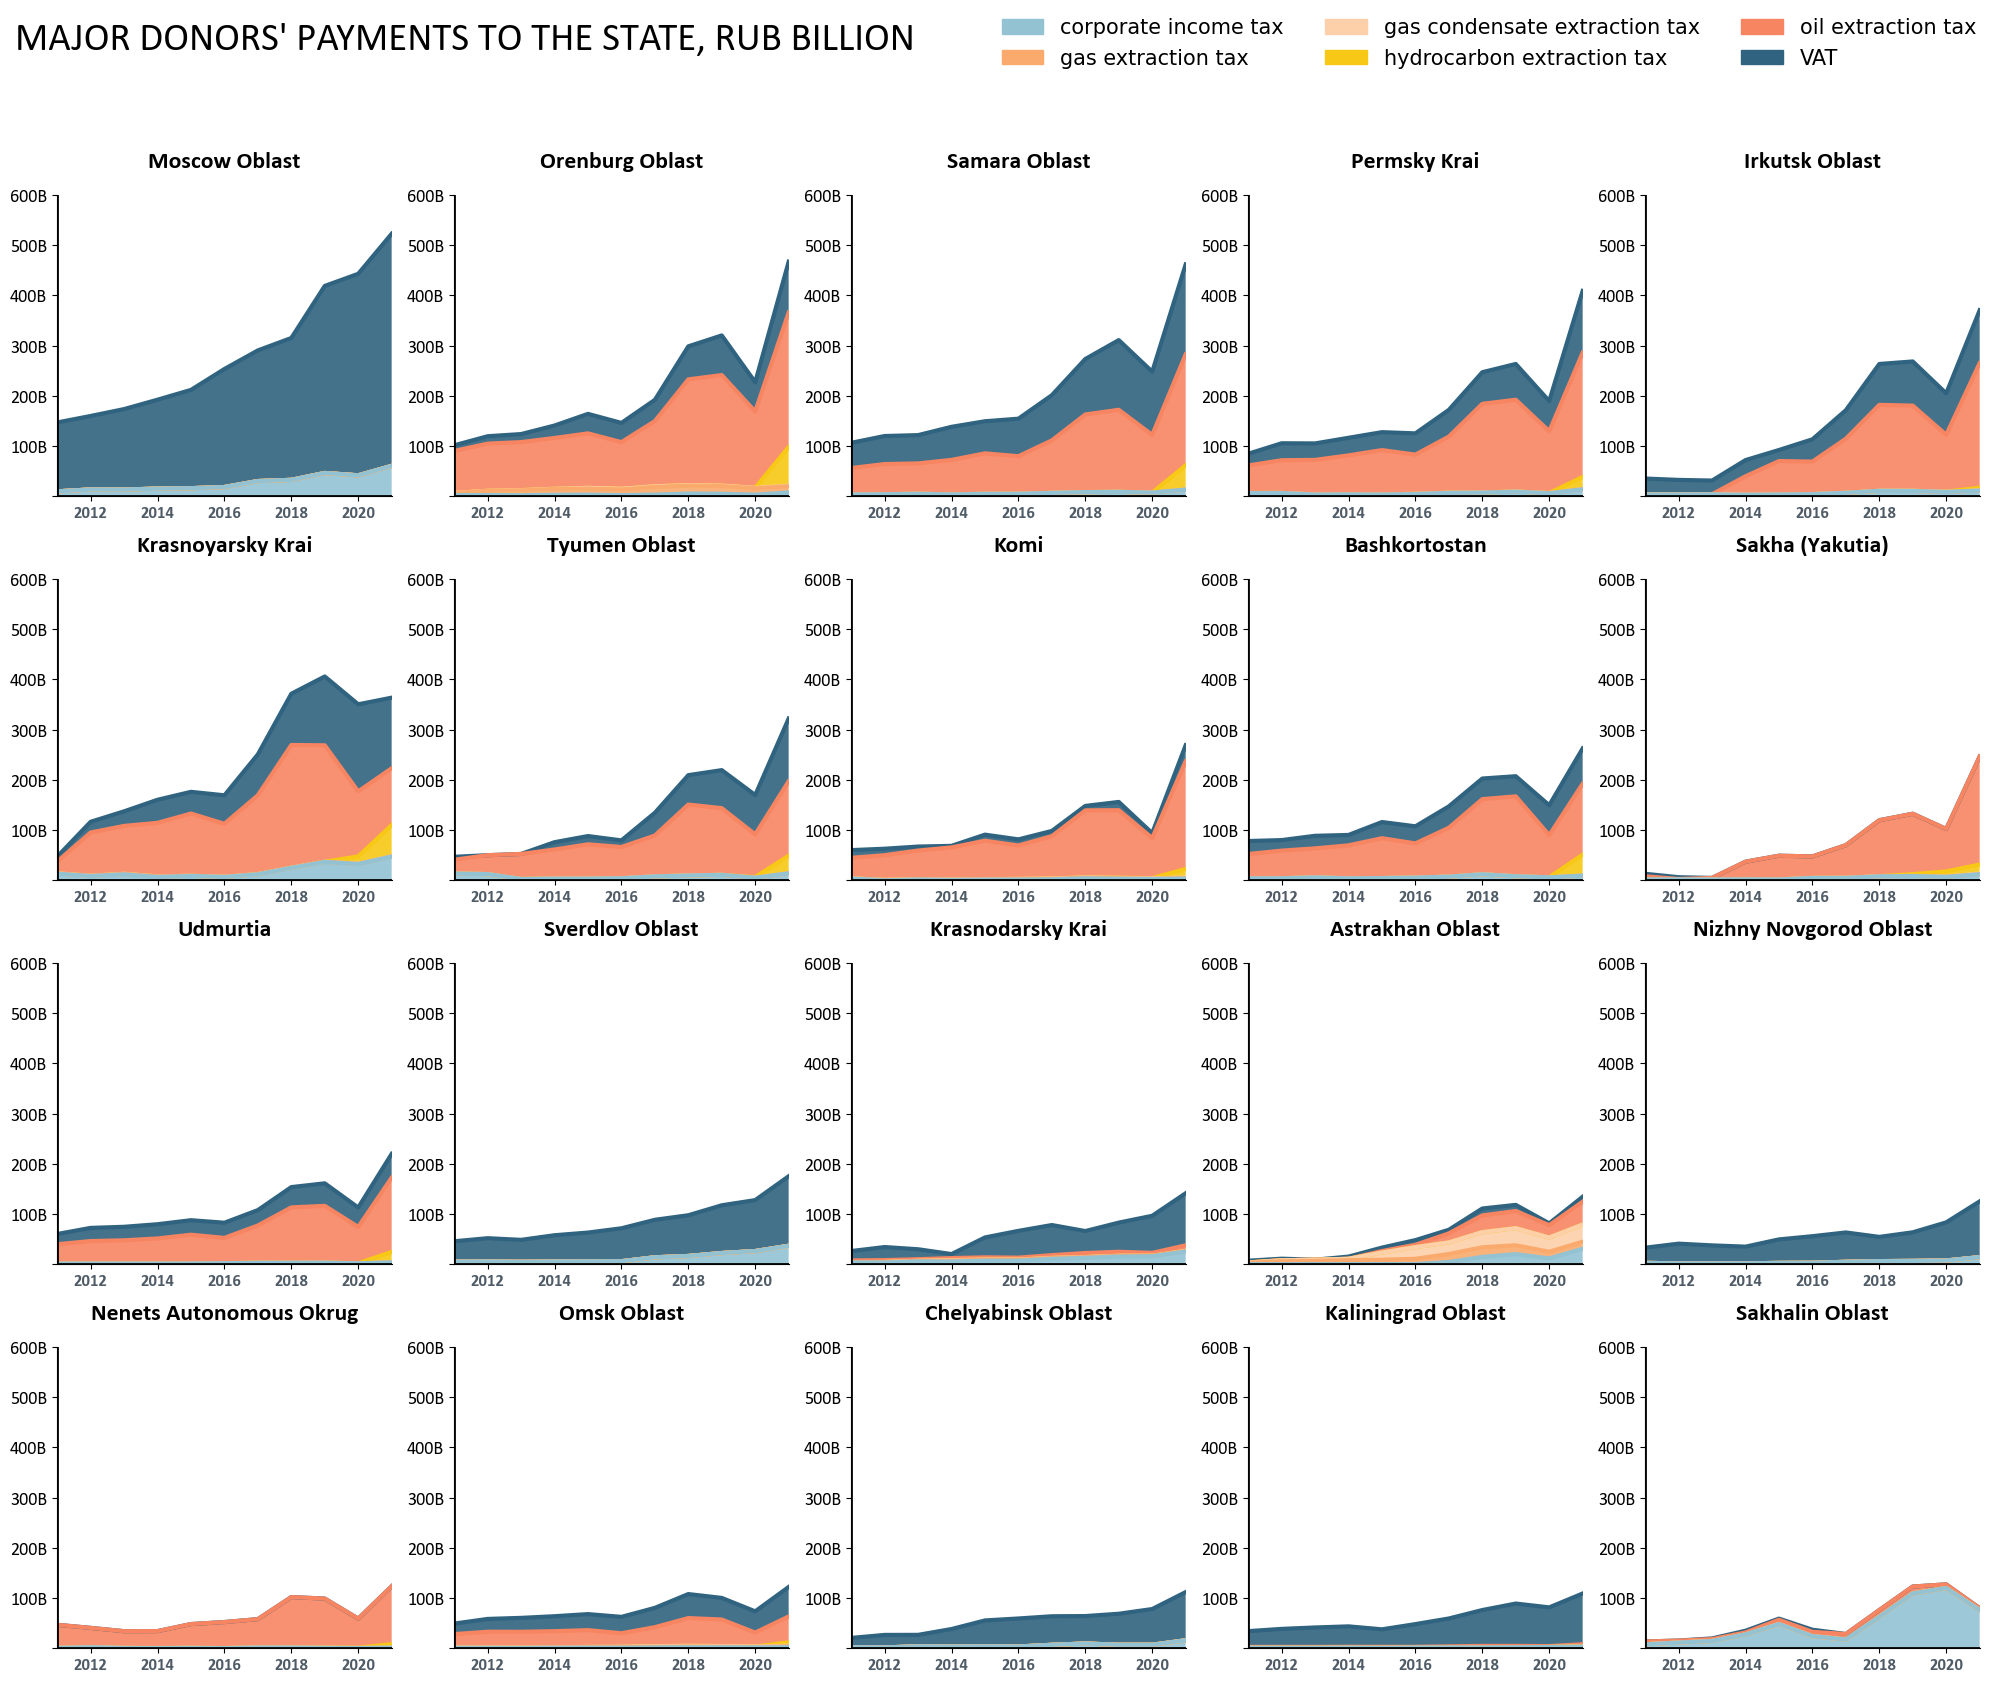

In [15]:
mpl.rcParams.update(
    mpl.rcParamsDefault)  # going back to default viz parameters

hfont = {'fontname': 'Calibri'}

x = table_graph.columns.values.tolist()

# lists of values, keys and titles for the area charts
y = []
keys = []
titles = []
for n in table_graph.index.get_level_values('region_eng').unique():
    area = table_graph.loc[n].reset_index().iloc[:, 1:].values.tolist()
    key = table_graph.loc[n].reset_index().iloc[:, 0].values.tolist()
    y.append(area)
    keys.append(key)
    titles.append(n)

# lists of values for the line charts
l = []
for n in table_graph_lines.index.get_level_values('region_eng').unique():
    p = []
    for m in table_graph_lines.index.get_level_values('tax_type').unique():
        plot = table_graph_lines.loc[n, m].round(3).values
        plots = plot.tolist()
        p.append(plots)
    l.append(p)

color_map = ['#93c2d3', '#faaa6d', '#fdd0a9', '#F7C815', '#f78562', '#30637f']

# a grid of 20 area charts
rows, cols = 5, 4
fig, axes = plt.subplots(rows,
                         cols,
                         sharex=True,
                         sharey=True,
                         squeeze=False,
                         figsize=(20, 16),
                         facecolor='w')

# a cycle to make charts
i = 0
plt.clf()
for n in range(4):
    for m in range(5):
        ax = plt.subplot2grid((4, 5), (n, m))
        ax.stackplot(x,
                     y[i],
                     labels=keys[i],
                     colors=color_map,
                     edgecolor=None,
                     alpha=0.9,
                     zorder=2)
        for m in range(6):
            ax.plot(x, l[i][m], color=color_map[5 - m], linewidth=3, zorder=3)
        ax.axhline(0, color='k', linewidth=2, linestyle='-', zorder=3)
        ax.axvline(2010.99, color='k', linewidth=2, linestyle='-', zorder=3)
        ax.yaxis.set_major_formatter('{x:1.0f}B')
        ax.set_title(titles[i],
                     fontweight='bold',
                     fontsize=17,
                     pad=20,
                     **hfont)
        ax.set_ylim(ymin=0, ymax=600)
        ax.set_xlim(xmin=2010.99, xmax=2021.01)
        for label in ax.get_xticklabels():
            label.set(fontsize=12, fontweight='bold', color='#4f5b66', **hfont)
        for label in ax.get_yticklabels():
            label.set(fontsize=13, **hfont)
        ax.grid(visible=False, which='major', axis='both')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
        i += 1

# a common legend for all subplots
patch1 = mpatches.Patch(color='#93c2d3', label='corporate income tax')
patch2 = mpatches.Patch(color='#faaa6d', label='gas extraction tax')
patch3 = mpatches.Patch(color='#fdd0a9', label='gas condensate extraction tax')
patch4 = mpatches.Patch(color='#F7C815', label='hydrocarbon extraction tax')
patch5 = mpatches.Patch(color='#f78562', label='oil extraction tax')
patch6 = mpatches.Patch(color='#30637f', label='VAT')
fig.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6],
           ncol=3,
           bbox_to_anchor=(0., 1, 1, 0),
           loc='lower right',
           fontsize=15,
           frameon=False)

plt.suptitle("MAJOR DONORS' PAYMENTS TO THE STATE, RUB BILLION",
             x=0.01,
             y=1.04,
             fontsize=28,
             ha='left',
             va='top',
             **hfont)

fig.tight_layout()

plt.show()

#### Key Takeaways

- The oil extraction tax, together with the hydrocarbon tax (2021), has been the main drivers of growth in federal revenue from the majority of top-20 "under-the-top" regions. Oil revenue growth accelerated after 2016, but fell temporarily in 2020 when there was a price collapse. Another significant tax is VAT (especially in the Moscow Oblast).


- Besides the growth of revenues itself, there are several oil newcomers, namely, Irkutsk Oblast, Sakha, and Astrakhan Oblast. According to the press and local officials, earlier these regions were considered "complicated" due to the difficult conditions of extraction, the poorly developed infrastructure, etc. They had stayed undeveloped for a long time. This changed in 2014–2018, and now they are among the major extractors.


- Sakhalin is unique, as the growth there was provided by corporate income tax. Until 2017, 75% of revenues from the oil and gas project "Sakhalin-2" went to the regional budget, and 25% went to the federal. But at the end of 2017, this scheme was modified, so that 75% started to go to the federal budget and only 25% to the regional. The local deputies tried to dispute this law modification in 2021. https://oilcapital.ru/news/2021-10-12/sahalin-hochet-poluchat-75-naloga-na-pribyl-sahalina-2-1042730 

## [What's On The Federal Level?](#contents) <a class="anchor" id="part_2"></a>

### [Which federal money was replaced by regional taxes?](#contents)  <a class="anchor" id="part_2_1"></a>

We remember from the first chart that regions' share of total federal revenues has grown from below 40% to 64% during 2011–2021. Did it replace some other revenues, or was it just added to the initial amount? Let's check which money constituted 60% of federal revenues 10 years ago.

In [16]:
# total federal revenue, its tax and non-tax parts, and their biggest items
fedrev_table = df.query(
    '(i1 == 2 & i2 == 2 & i3 == 1 & r3 == 0) | (i1 == 2 & i2 == 1 & r1 == 3 & r2 == 0) | (i1 == 2 & i2 == 2 & i3 == 2 & s1 == 0) | (i1 == 2 & i2 == 2 & r3 == 10 & r4 == 0)'
).set_index('index')[['year', 'value']].reset_index().pivot(index='year',
                                                            columns='index',
                                                            values='value')
fedrev_table['fed_nonreg_tax_revenue'] = fedrev_table[
    'fed_tax_revenue'] - fedrev_table['tax_to_fed']
fedrev_table = fedrev_table[[
    'fed_revenue', 'fed_tax_revenue', 'tax_to_fed', 'fed_nonreg_tax_revenue',
    'fed_nontax_revenue', 'international trade revenues', 'fed_spending'
]]

# -> trillions of rubles
fedrev_table = (fedrev_table / 1000000000000).round(1)

fedrev_table

index  fed_revenue  fed_tax_revenue  tax_to_fed  fed_nonreg_tax_revenue  \
year                                                                      
2011          11.3              6.0         4.5                     1.5   
2012          12.8              6.9         5.2                     1.7   
2013          13.0              7.1         5.4                     1.7   
2014          14.4              7.9         6.2                     1.7   
2015          13.4              8.6         6.9                     1.7   
2016          13.3              8.7         6.9                     1.8   
2017          15.0             11.1         9.2                     1.9   
2018          19.4             14.2        11.9                     2.2   
2019          20.1             15.2        12.6                     2.6   
2020          17.6             13.6        11.0                     2.6   
2021          25.0             19.1        15.9                     3.2   

index  fed_nontax_revenue  international trade revenues  fed_spending  
year                                                                   
2011                  5.4                           4.7           9.7  
2012                  5.9                           5.0          11.4  
2013                  5.9                           5.0          11.5  
2014                  6.5                           5.5          12.6  
2015                  4.8                           3.3          12.6  
2016                  4.6                           2.6          12.9  
2017                  4.0                           2.6          13.6  
2018                  5.2                           3.7          13.9  
2019                  4.9                           3.0          15.2  
2020                  4.0                           1.9          19.2  
2021                  5.9                           3.6          21.0

##### [Chart 06: Regions' role in the federal revenue growth](#contents) <a class="anchor" id="chart_06"></a>

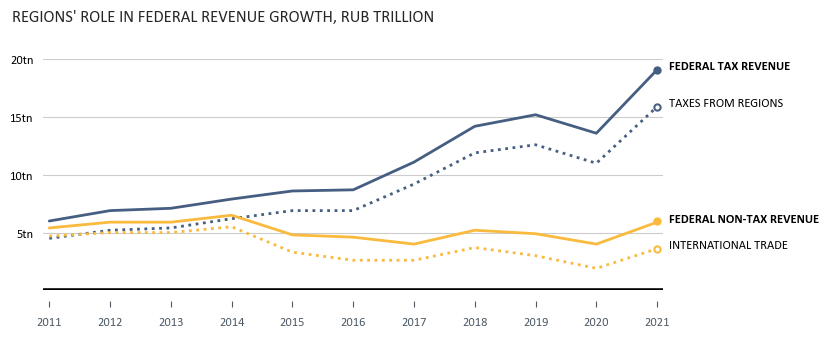

In [17]:
xticks = fedrev_table.index  # years
x_range = np.arange(len(fedrev_table['tax_to_fed']))
y1 = fedrev_table[
    'tax_to_fed']  # taxes from regions are a part of federal tax revenue
y2 = fedrev_table['fed_tax_revenue']  # total federal tax revenue
y3 = fedrev_table['fed_nontax_revenue']  # total federal nontax revenue
y4 = fedrev_table[
    'international trade revenues']  # int. trade is a part of federal nontax revenue

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 3))

# totals are solid lines, their parts are dotted
ax.plot(x_range, y1, color='#465e81', lw=2, linestyle=':')
ax.plot(x_range, y2, color='#465e81', lw=2)
ax.plot(x_range, y4, color='#f9ba3e', lw=2, linestyle=':')
ax.plot(x_range, y3, color='#f9ba3e', lw=2)

# end markers: full for totals, "empty" for parts
ax.plot(x_range[-1], y1[2021], 'o', markersize=5, color='#465e81')
ax.plot(x_range[-1], y1[2021], 'o', markersize=2, color='w')
ax.plot(x_range[-1], y2[2021], 'o', markersize=5, color='#465e81')
ax.plot(x_range[-1], y3[2021] + 0.1, 'o', markersize=5, color='#f9ba3e')
ax.plot(x_range[-1], y4[2021], 'o', markersize=5, color='#f9ba3e')
ax.plot(x_range[-1], y4[2021], 'o', markersize=2, color='w')

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=-0.1, xmax=10.1)

ax.xaxis.tick_bottom()

ax.set_xticks(x_range)
ax.set_xticklabels(xticks)
ax.set_yticks([5, 10, 15, 20])
ax.set_yticklabels(['5tn', '10tn', '15tn', '20tn'])

ax.tick_params(axis='x', colors='#4f5b66', direction='out', length=5)
ax.tick_params(axis='y', colors='#4f5b66')

# annotating the line charts endins
ax.text(x_range[-1] + 0.2,
        y1[2021],
        "TAXES FROM REGIONS",
        color='k',
        fontsize=9,
        **hfont)
ax.text(x_range[-1] + 0.2,
        y2[2021],
        "FEDERAL TAX REVENUE",
        color='k',
        fontsize=9,
        fontweight='bold',
        **hfont)
ax.text(x_range[-1] + 0.2,
        y3[2021],
        "FEDERAL NON-TAX REVENUE",
        color='k',
        fontsize=9,
        fontweight='bold',
        **hfont)
ax.text(x_range[-1] + 0.2,
        y4[2021],
        "INTERNATIONAL TRADE",
        color='k',
        fontsize=9,
        **hfont)

ax.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.axhline(0, color='k', lw=3.3, linestyle='-')

ax.spines['bottom'].set_position(('outward', 10))
ax.spines['bottom'].set_alpha(0)
for i in ax.xaxis.get_ticklines():
    i.set_marker('|')

for label in ax.get_xticklabels():
    label.set(fontsize=9, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=9, color=y_color, **hfont)

ax.set_title("REGIONS' ROLE IN FEDERAL REVENUE GROWTH, RUB TRILLION",
             x=0.63,
             y=1.18,
             fontsize=12,
             ha='right',
             va='top',
             **hfont)

plt.show()

#### Key Takeaways

- The non-tax revenues used to constitute almost half of all federal money until 2014, but contracted significantly in 2015, and have fluctuated around 5 trillion rubles a year since that time. As the USD course has grown sharply, this has actually been a contraction. 


- The main source of these non-tax revenues was international trade, which contracted sharply. In the next step, we'll extract a bit more data from the database to see what exactly has fallen so strongly.

#### [Table 03: The falling of the international trade revenues](#contents) <a class="anchor" id="table_03"></a>

In [18]:
# international trade revenue items
intern_trade = df.query('i1 == 2 & i2 == 2 & r3 == 10 & r5 == 0').set_index(
    'index')[['year',
              'value']].reset_index().pivot(index='year',
                                            columns='index',
                                            values='value').sort_values(
                                                by=2021,
                                                axis=1,
                                                ascending=False)
intern_trade[
    'other international trade revenues'] = intern_trade.iloc[:,
                                                              0] - intern_trade.iloc[:,
                                                                                     1] - intern_trade.iloc[:,
                                                                                                            2]
intern_trade = (intern_trade / 1000000000000).round(1)

# the largest item is customs duties, composed almost entirely of export customs duties ->
# extracting export customs duties items
exp_customs_duties = df.query(
    'i1 == 2 & i2 == 2 & r3 == 10 & r5 != 0').set_index('index')[[
        'year', 'value'
    ]].reset_index().pivot(index='year', columns='index',
                           values='value').sort_values(by=2021,
                                                       axis=1,
                                                       ascending=False)
exp_customs_duties[
    'other export customs duties'] = exp_customs_duties.iloc[:,
                                                             0] - exp_customs_duties.iloc[:, 1:].sum(
                                                                 axis=1)
exp_customs_duties = (exp_customs_duties / 1000000000000).round(1)

print(
    colored(
        'Which International Trade Revenues Have Fallen Most Significantly?',
        attrs=['bold', 'reverse']))
print()
print(colored('International Trade Revenues', attrs=['bold']))
display(intern_trade.iloc[:, 1:4].T.style.apply(highlight_greaterthan,
                                                threshold=2,
                                                column=[2011, 2021],
                                                axis=1).format(precision=1))
print()
print(colored('Export Customs Duties', attrs=['bold']))
display(exp_customs_duties.iloc[:,
                                1:5].T.style.apply(highlight_greaterthan,
                                                   threshold=2,
                                                   column=[2011, 2021],
                                                   axis=1).format(precision=1))

Which International Trade Revenues Have Fallen Most Significantly?

International Trade Revenues



Export Customs Duties


#### Key Takeaways

- The largest international trade item is customs duties, composed almost entirely of export customs duties; the latter, in its turn, used to be determined by oil, and only in 2021 did the leader change to gas.


- Export customs duties on oil fell sharply from 2.3 trillion rubles in 2011 to 700 billion in 2021. The revenues from customs duties on oil products have fallen as well. 


- In 2015, Russian officials started a tax maneuver; namely, they raised the mining tax and reduced the export duties. By 2017, the duties should have dropped to 30%. Now it is planned to decrease the export duty to zero by 2024 while the mining tax will be increased by an equivalent amount. 


- That is, the observed falling and rising is predetermined.

### [So, we sponsored the federal center. Did it start to spend more?](#contents) <a class="anchor" id="part_2_2"></a>

While federal revenue growth accelerated after 2016, federal budget spending didn't keep pace. According to the budget rule, a significant part of oil revenues should not be spent but saved in the Russian Sovereign Wealth Fund. On the next chart, we can see the divergence that was overturned only for the pandemic year.

#### [Chart 07: Growing federal revenue and lagging spending](#contents) <a class="anchor" id="chart_07"></a>

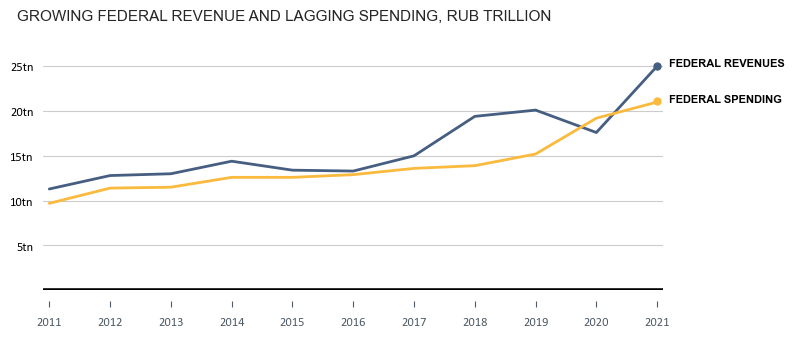

In [19]:
xticks = fedrev_table.index
x_range = np.arange(len(fedrev_table['fed_revenue']))
y1 = fedrev_table['fed_revenue']
y2 = fedrev_table['fed_spending']

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x_range, y1, color='#465e81', lw=2)
ax.plot(x_range, y2, color='#f9ba3e', lw=2)
ax.plot(x_range[-1], y1[2021], 'o', markersize=5, color='#465e81')
ax.plot(x_range[-1], y2[2021] + 0.1, 'o', markersize=5, color='#f9ba3e')

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=-0.1, xmax=10.1)

ax.xaxis.tick_bottom()

ax.set_xticks(x_range)
ax.set_xticklabels(xticks)
ax.set_yticks([5, 10, 15, 20, 25])
ax.set_yticklabels(['5tn', '10tn', '15tn', '20tn', '25tn'])

ax.tick_params(axis='x', colors='#4f5b66', direction='out', length=5)
ax.tick_params(axis='y', colors='#4f5b66')

ax.text(x_range[-1] + 0.2,
        y1[2021],
        "FEDERAL REVENUES",
        color='k',
        fontsize=8,
        fontweight='bold')
ax.text(x_range[-1] + 0.2,
        y2[2021],
        "FEDERAL SPENDING",
        color='k',
        fontsize=8,
        fontweight='bold')

ax.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.axhline(0, color='k', lw=3.3, linestyle='-')

ax.spines['bottom'].set_position(('outward', 10))
ax.spines['bottom'].set_alpha(0)
for i in ax.xaxis.get_ticklines():
    i.set_marker('|')

for label in ax.get_xticklabels():
    label.set(fontsize=9, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=9, color=y_color, **hfont)

ax.set_title("GROWING FEDERAL REVENUE AND LAGGING SPENDING, RUB TRILLION",
             x=0.82,
             y=1.18,
             fontsize=11,
             ha='right',
             va='top')

plt.show()

Anyway, the spending also increased, especially after the pandemic 2020. Let's check which items the money was spent on.

In [20]:
# extracting main spending items
spending_change = df.query(
    'i1 == 2 & i2 == 2 & i3 == 2 & 0 < s1 < 13 & s2 == 0')[[
        'index', 'year', 'value'
    ]].set_index('year')

# -> trillions of rubles
spending_change['spending_tn'] = (spending_change['value'] /
                                  1000000000000).round(1)
spending_change = spending_change[['index',
                                   'spending_tn']].pivot(columns='index',
                                                         values='spending_tn')

spending_change

index  culture, cinematography  education  environmental conservation  \
year                                                                    
2011                       0.1        0.5                         0.0   
2012                       0.1        0.6                         0.0   
2013                       0.1        0.6                         0.0   
2014                       0.1        0.6                         0.0   
2015                       0.1        0.6                         0.0   
2016                       0.1        0.6                         0.1   
2017                       0.1        0.6                         0.1   
2018                       0.1        0.7                         0.1   
2019                       0.1        0.8                         0.2   
2020                       0.1        0.9                         0.3   
2021                       0.1        1.0                         0.4   

index  general state issues  healthcare  housing and utilities sector  \
year                                                                    
2011                    0.7         0.5                           0.2   
2012                    0.7         0.6                           0.2   
2013                    0.8         0.5                           0.2   
2014                    0.8         0.5                           0.1   
2015                    0.9         0.5                           0.1   
2016                    1.0         0.5                           0.1   
2017                    1.0         0.4                           0.1   
2018                    1.1         0.5                           0.1   
2019                    1.1         0.7                           0.3   
2020                    1.2         1.3                           0.4   
2021                    1.3         1.4                           0.6   

index  mass media  national defense  national economy  \
year                                                    
2011          0.1               0.8               1.8   
2012          0.1               1.0               1.9   
2013          0.1               1.0               1.8   
2014          0.1               1.1               3.0   
2015          0.1               1.1               2.2   
2016          0.1               1.1               2.1   
2017          0.1               1.0               2.2   
2018          0.1               1.0               2.2   
2019          0.1               1.0               2.7   
2020          0.1               1.1               3.0   
2021          0.1               1.2               4.2   

index  national security and law enforcement   physical fitness and sports  \
year                                                                         
2011                                      0.9                          0.0   
2012                                      1.4                          0.0   
2013                                      1.5                          0.1   
2014                                      1.5                          0.1   
2015                                      1.4                          0.1   
2016                                      1.3                          0.1   
2017                                      1.4                          0.1   
2018                                      1.4                          0.1   
2019                                      1.5                          0.1   
2020                                      1.6                          0.1   
2021                                      1.6                          0.1   

index  social policy   
year                   
2011              3.1  
2012              3.9  
2013              3.8  
2014              3.5  
2015              4.3  
2016              4.6  
2017              5.0  
2018              4.6  
2019              4.9  
2020              7.0  
2021              6.6

#### [Chart 08: Which federal spendings have grown significantly after 2017](#contents)  <a class="anchor" id="chart_08"></a>

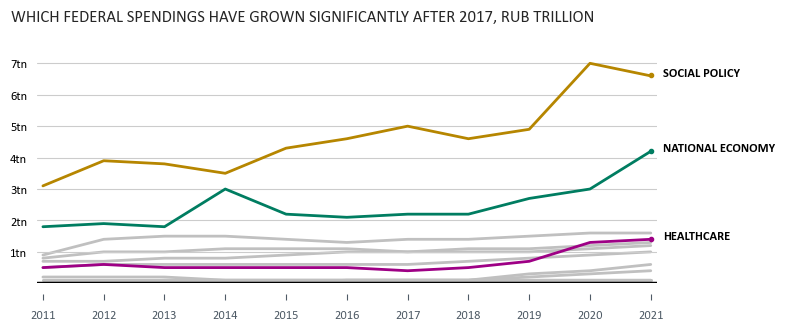

In [21]:
xticks = spending_change.index # years
x_range = np.arange(len(spending_change['education']))

# a list of columns values and labels for them
y = []
labels = []
for i in range(len(spending_change.columns)):
    y.append(spending_change.iloc[:, i])
    labels.append(spending_change.iloc[:, i].name.upper())

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,3))

# items that haven't grow notably -> will be gray
for i in [0,1,2,3,5,6,7,9,10]:
    ax.plot(xticks, y[i], color='silver', lw=2, zorder=0)

# items that have grown significantly -> will be colored
colors = dict({4:'#9E0085', 8:'#007D61', 11:'#B68600'})
for i in [4,8,11]:
    ax.plot(xticks, y[i], color=colors[i], lw=2, zorder=1)
    ax.plot(xticks[-1], y[i][2021]+0.02, 'o', markersize=3, color=colors[i])
    ax.text(xticks[-1]+0.2, y[i][2021], labels[i], color ='k', fontsize=9, fontweight='bold', **hfont)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=2010.9, xmax=2021.1)

ax.xaxis.tick_bottom()

ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks([1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(['1tn', '2tn', '3tn', '4tn', '5tn', '6tn', '7tn'])

ax.tick_params(axis='x', colors='#4f5b66', direction='out', length=5)
ax.tick_params(axis='y', colors='#4f5b66')

ax.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.axhline(0, color='k', lw=2.5, linestyle='-')

ax.spines['bottom'].set_position(('outward', 10))
ax.spines['bottom'].set_alpha(0)
for i in ax.xaxis.get_ticklines():
    i.set_marker('|')

for label in ax.get_xticklabels():
    label.set(fontsize=9, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=9, color=y_color, **hfont)
    
ax.set_title('WHICH FEDERAL SPENDINGS HAVE GROWN SIGNIFICANTLY AFTER 2017, RUB TRILLION', x=0.9, y=1.15, fontsize=12,
             ha='right', va='top', **hfont)

plt.show() 

#### Key Takeaways

- We see an expected growth in spending on healthcare and social policy during and after the pandemic year.


- What has been growing steadily is spending on the national economy. Which subitems in particular?

In [22]:
spending_change_econ = df.query(
    'i1 == 2 & i2 == 2 & i3 == 2 & s1 == 4 & s2 != 0')[[
        'index', 'year', 'value'
    ]].set_index('year')

spending_change_econ['spending_tn'] = (spending_change_econ['value'] /
                                       1000000000000).round(3)
spending_change_econ = spending_change_econ[['index', 'spending_tn'
                                             ]].pivot(columns='index',
                                                      values='spending_tn')

spending_change_econ

index  agriculture and fishing  applied national economy research  \
year                                                                
2011                     0.141                              0.157   
2012                     0.149                              0.194   
2013                     0.220                              0.217   
2014                     0.180                              0.205   
2015                     0.208                              0.198   
2016                     0.203                              0.216   
2017                     0.214                              0.173   
2018                     0.226                              0.159   
2019                     0.289                              0.182   
2020                     0.265                              0.217   
2021                     0.316                              0.277   

index  communications and information technology  forest sector  \
year                                                              
2011                                       0.043          0.035   
2012                                       0.041          0.030   
2013                                       0.041          0.029   
2014                                       0.034          0.032   
2015                                       0.031          0.029   
2016                                       0.033          0.027   
2017                                       0.035          0.028   
2018                                       0.048          0.033   
2019                                       0.092          0.042   
2020                                       0.094          0.044   
2021                                       0.126          0.050   

index  fuel and energy sector  general economy issues  \
year                                                    
2011                    0.041                   0.092   
2012                    0.108                   0.018   
2013                    0.019                   0.020   
2014                    0.025                   0.021   
2015                    0.084                   0.022   
2016                    0.042                   0.022   
2017                    0.028                   0.023   
2018                    0.013                   0.024   
2019                    0.019                   0.033   
2020                    0.019                   0.032   
2021                    0.017                   0.053   

index  other national economy issues  public road system  \
year                                                       
2011                           0.547               0.349   
2012                           0.513               0.442   
2013                           0.362               0.505   
2014                           1.538               0.527   
2015                           0.634               0.615   
2016                           0.599               0.629   
2017                           0.675               0.685   
2018                           0.696               0.704   
2019                           0.864               0.826   
2020                           1.017               0.930   
2021                           1.573               1.187   

index  replacement of the mineral raw material base  \
year                                                  
2011                                          0.022   
2012                                          0.030   
2013                                          0.035   
2014                                          0.039   
2015                                          0.033   
2016                                          0.031   
2017                                          0.030   
2018                                          0.029   
2019                                          0.028   
2020                                          0.030   
2021                                          0

#### [Chart 09: Federal spendings on the national economy](#contents) <a class="anchor" id="chart_09"></a>

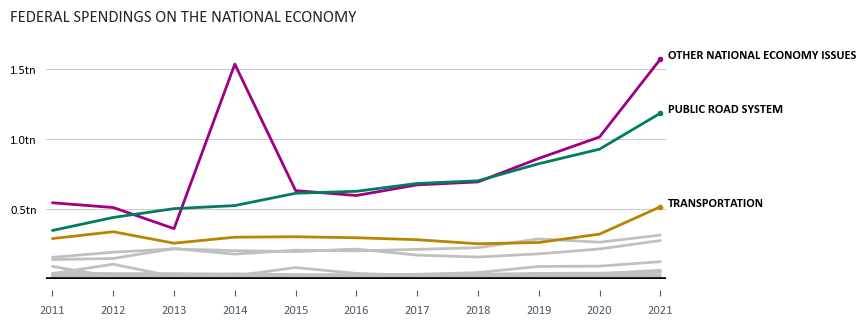

In [23]:
xticks = spending_change.index

y = []
labels = []
for i in range(len(spending_change_econ.columns)):
    y.append(spending_change_econ.iloc[:, i])
    labels.append(spending_change_econ.iloc[:, i].name.upper())

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 3))

for i in [0, 1, 2, 3, 4, 5, 8, 9, 11]:
    ax.plot(xticks, y[i], color='silver', lw=2, zorder=0)

colors = dict({6: '#9E0085', 7: '#007D61', 10: '#B68600'})
for i in [6, 7, 10]:
    ax.plot(xticks, y[i], color=colors[i], lw=2, zorder=1)
    ax.plot(xticks[-1], y[i][2021], 'o', markersize=3, color=colors[i])
    ax.text(xticks[-1] + 0.13,
            y[i][2021],
            labels[i],
            color='k',
            fontsize=9,
            fontweight='bold',
            **hfont)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=2010.9, xmax=2021.1)

ax.xaxis.tick_bottom()

ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticks([0.5, 1, 1.5])
ax.set_yticklabels(['0.5tn', '1.0tn', '1.5tn'])

ax.tick_params(axis='x', colors='#4f5b66', direction='out', length=5)
ax.tick_params(axis='y', colors='#4f5b66')

ax.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.axhline(0, color='k', lw=3.3, linestyle='-')

ax.spines['bottom'].set_position(('outward', 10))
ax.spines['bottom'].set_alpha(0)
for i in ax.xaxis.get_ticklines():
    i.set_marker('|')

for label in ax.get_xticklabels():
    label.set(fontsize=9, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=9, color=y_color, **hfont)

ax.set_title('FEDERAL SPENDINGS ON THE NATIONAL ECONOMY',
             x=0.5,
             y=1.13,
             fontsize=12,
             ha='right',
             va='top',
             **hfont)

plt.show()

We see the increase in spending on infrastructure and on some "other" economic issues, which peaked in 2014, the year of the first Russian-Ukrainian conflict, and then in 2021, before the Russian-Ukrainian war. To try to find out which issues have jumped in particular, we have to turn to the federal spending dataframe. This one is not detailed enough.

In [24]:
# spending subitems consist of federal programs, which, in their turn, include subprograms; here we'll extract federal program
# names and amounts separately, as the names change from year to year but the codes stay preserved; we'll then use the codes
# to identify the names of particular programs and subprograms

# the coding system changed in 2014, so we'll extract the data for 2014–2021 for simplicity

fs = pd.read_csv('final_data/fed_spend.csv', index_col=0)

# the names of programs + codes for each year
progr = fs.query(
    's1 == 4 & s2 == 12 & spnd_id_3 != "0" & spnd_id_4 == 0 & year > 2013')[[
        'spending_type_rus', 'spnd_id_3', 'year'
    ]].drop_duplicates()

# the amounts of money + codes for each year
spend = fs.query(
    's1 == 4 & s2 == 12 & spnd_id_3 != "0" & spnd_id_4 == 0 & year > 2013')[[
        'spnd_id_1', 'spnd_id_3', 'spending', 'year'
    ]]

# extracting 7-digit subcode, as the years after 2015 have extra-zeros
progr['spnd_id_3'] = [x[:7] for x in progr['spnd_id_3']]
spend['spnd_id_3'] = [x[:7] for x in spend['spnd_id_3']]
# the first two digits stand for the program code
progr['program'] = [x[:2] for x in progr['spnd_id_3']]
spend['program'] = [x[:2] for x in spend['spnd_id_3']]
# the third digit stands for subprogram
progr['subprogram'] = [x[2] for x in progr['spnd_id_3']]
spend['subprogram'] = [x[2] for x in spend['spnd_id_3']]
# the other four digits stand for more particular types of spending; '0000' means the total sum
progr['rest'] = [x[3:] for x in progr['spnd_id_3']]
spend['rest'] = [x[3:] for x in spend['spnd_id_3']]

# some clearing for the spendings names
progr['spending_type_rus'] = progr['spending_type_rus'].replace('\n',
                                                                ' ',
                                                                regex=True)
progr['spending_type_rus'] = progr['spending_type_rus'].replace('\xa0',
                                                                ' ',
                                                                regex=True)
progr['spending_type_rus'] = progr['spending_type_rus'].replace('\s+',
                                                                ' ',
                                                                regex=True)
progr['spending_type_rus'] = progr['spending_type_rus'].str.strip()

programs = progr.query('rest == "0000"')[[
    'year', 'program', 'subprogram', 'spending_type_rus'
]]
spendings = spend.query('rest == "0000"')

# program spending
spendings_programs = spendings.query(
    'rest == "0000" & subprogram == "0"').pivot_table(
        index=['year', 'program', 'subprogram'],
        values='spending',
        aggfunc='sum').reset_index()
# subprogram spending
spendings_subprograms = spendings.query(
    'rest == "0000" & subprogram != "0"').pivot_table(
        index=['year', 'program', 'subprogram'],
        values='spending',
        aggfunc='sum').reset_index()
# concatinating the two tables
spendings_ps = pd.concat([spendings_programs, spendings_subprograms])

# now let's find the codes of the top spending programs for 2014 and 2021
spendings_p = spendings_ps.query('subprogram == "0"').pivot(
    index='year', columns='program', values='spending').fillna(0)
spendings_p_2014 = spendings_p.sort_values(by=2014, axis=1,
                                           ascending=False).iloc[:, :1]
spendings_p_2021 = spendings_p.sort_values(by=2021, axis=1,
                                           ascending=False).iloc[:, :3]

# searching for the corresponding names in the programs dataframe
for name in spendings_p_2014.columns:
    str_name = programs[(programs['program'] == name)
                        & (programs['subprogram'] == "0") &
                        (programs['year']
                         == 2014)]['spending_type_rus'].values[0]
    spendings_p_2014 = spendings_p_2014.rename(columns={name: str_name})
for name in spendings_p_2021.columns:
    str_name = programs[(programs['program'] == name)
                        & (programs['subprogram'] == "0") &
                        (programs['year']
                         == 2021)]['spending_type_rus'].values[0]
    spendings_p_2021 = spendings_p_2021.rename(columns={name: str_name})

# leaving only the programs with the maximum spending in 2014 and 2021
fed_program_leaders = pd.concat([spendings_p_2014.T, spendings_p_2021.T])
fed_program_leaders.drop_duplicates()

# translating the names into English
fed_program_leaders_translated = fed_program_leaders.drop_duplicates().T
fed_program_leaders_translated.columns = [
    '1. implementation of the functions of other federal government bodies',
    '2. economic development and innovative economy',
    '3. public financial management and regulation of financial markets',
    '4. development of industry and increase of its competitiveness'
]

# now let's find the leading subprograms inside the leading programs:
spendings_s_2014 = spendings_ps.query(
    'program == "99" & subprogram != "0"').pivot(index='year',
                                                 columns='subprogram',
                                                 values='spending').fillna(0)
spendings_s_2021_1 = spendings_ps.query(
    'program == "15" & subprogram != "0"').pivot(index='year',
                                                 columns='subprogram',
                                                 values='spending').fillna(0)
spendings_s_2021_2 = spendings_ps.query(
    'program == "39" & subprogram != "0"').pivot(index='year',
                                                 columns='subprogram',
                                                 values='spending').fillna(0)
spendings_s_2021_3 = spendings_ps.query(
    'program == "16" & subprogram != "0"').pivot(index='year',
                                                 columns='subprogram',
                                                 values='spending').fillna(0)

spendings_s_2014 = spendings_s_2014.sort_values(by=2014,
                                                axis=1,
                                                ascending=False).iloc[:, :1]
spendings_s_2021_1 = spendings_s_2021_1.sort_values(
    by=2021, axis=1, ascending=False).iloc[:, :1]
spendings_s_2021_2 = spendings_s_2021_2.sort_values(
    by=2021, axis=1, ascending=False).iloc[:, :1]
spendings_s_2021_3 = spendings_s_2021_3.sort_values(
    by=2021, axis=1, ascending=False).iloc[:, :1]

for name in spendings_s_2014.columns:
    str_name = programs[(programs['program'] == '99')
                        & (programs['subprogram'] == "9") &
                        (programs['year']
                         == 2014)]['spending_type_rus'].values[0]
    spendings_s_2014 = spendings_s_2014.rename(columns={name: str_name})
for name in spendings_s_2021_1.columns:
    str_name = programs[(programs['program'] == '15')
                        & (programs['subprogram'] == "2") &
                        (programs['year']
                         == 2021)]['spending_type_rus'].values[0]
    spendings_s_2021_1 = spendings_s_2021_1.rename(columns={name: str_name})
for name in spendings_s_2021_2.columns:
    str_name = programs[(programs['program'] == '15')
                        & (programs['subprogram'] == "2") &
                        (programs['year']
                         == 2021)]['spending_type_rus'].values[0]
    spendings_s_2021_2 = spendings_s_2021_2.rename(columns={name: str_name})
for name in spendings_s_2021_3.columns:
    str_name = programs[(programs['program'] == '15')
                        & (programs['subprogram'] == "1") &
                        (programs['year']
                         == 2021)]['spending_type_rus'].values[0]
    spendings_s_2021_3 = spendings_s_2021_3.rename(columns={name: str_name})

spendings_s_2014.columns = ['1.1. other non-program activities']
spendings_s_2021_1.columns = ['2.1. small and medium business development']
spendings_s_2021_2.columns = ['3.1. small and medium business development']
spendings_s_2021_3.columns = ['4.1. investment climate']

# concatinating the data for the chart:
fed_program_leaders_translated = fed_program_leaders_translated.join(
    [
        spendings_s_2014, spendings_s_2021_1, spendings_s_2021_2,
        spendings_s_2021_3
    ],
    how='left')
fed_program_leaders_translated = (fed_program_leaders_translated /
                                  1000000000).round(1)
fed_program_leaders_translated = fed_program_leaders_translated.loc[
    2014:].join(spending_change_econ[['other national economy issues']])
fed_program_leaders_translated[
    'other national economy issues'] = fed_program_leaders_translated[
        'other national economy issues'] * 1000
fed_program_leaders_translated

1. implementation of the functions of other federal government bodies  \
year                                                                          
2014                                             1053.3                       
2015                                              156.0                       
2016                                              150.4                       
2017                                               65.4                       
2018                                               52.1                       
2019                                               14.6                       
2020                                                0.5                       
2021                                                0.6                       

      2. economic development and innovative economy  \
year                                                   
2014                                           159.7   
2015                                            91.5   
2016                                            65.8   
2017                                            75.1   
2018                                            74.2   
2019                                           111.8   
2020                                           254.2   
2021                                           641.4   

      3. public financial management and regulation of financial markets  \
year                                                                       
2014                                                0.0                    
2015                                                0.0                    
2016                                                0.0                    
2017                                              107.6                    
2018                                              125.5                    
2019                                              257.6                    
2020                                              127.0                    
2021                                              190.0                    

      4. development of industry and increase of its competitiveness  \
year                                                                   
2014                                               99.7                
2015                                              117.3                
2016                                              170.5                
2017                                              194.1                
2018                                              176.9                
2019                                              209.3                
2020                                              256.3                
2021                                              162.3                

      1.1. other non-program activities  \
year                                      
2014                             1053.2   
2015                              154.4   
2016                              150.4   
2017                               65.3   
2018                               51.9   
2019                               14.5   
2020                                0.4   
2021                                0.3   

      2.1. small and medium business development  \
year                                               
2014                                        69.4   
2015                                        17.5   
2016                                        11.1   
2017                                        20.6   
2018                                        15.8   
2019                                        50.8   
2020                                       175.2   
2021                                       529.0   

      3.1. small and medium business development  4.1. investment climate  \
year                                                                        
2014                                         NaN                  

#### [Chart 10: Federal spendings on "other national economy issues" ](#contents) <a class="anchor" id="chart_10"></a>

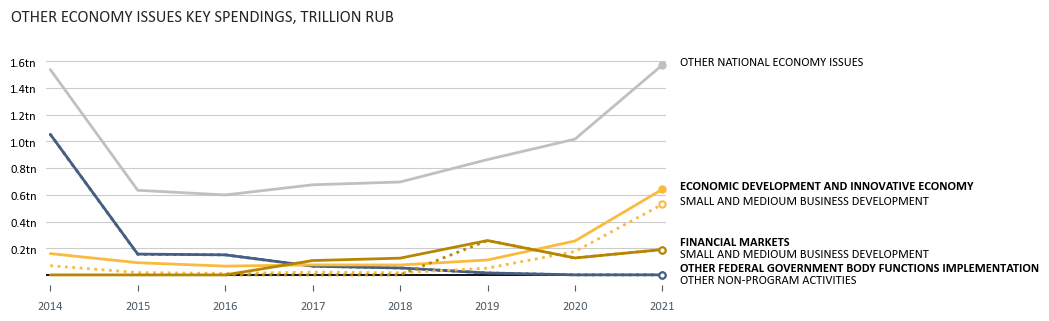

In [25]:
xticks = fed_program_leaders_translated.index
x_range = np.arange(
    len(fed_program_leaders_translated['other national economy issues']))
y1 = fed_program_leaders_translated['other national economy issues']
y2 = fed_program_leaders_translated[
    '1. implementation of the functions of other federal government bodies']
y3 = fed_program_leaders_translated['1.1. other non-program activities']
y4 = fed_program_leaders_translated[
    '2. economic development and innovative economy']
y5 = fed_program_leaders_translated[
    '2.1. small and medium business development']
y6 = fed_program_leaders_translated[
    '3. public financial management and regulation of financial markets']
y7 = fed_program_leaders_translated[
    '3.1. small and medium business development']

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x_range, y1, color='silver', lw=2)
ax.plot(x_range, y2, color='#465e81', lw=2)
ax.plot(x_range, y3, color='#465e81', lw=2, linestyle=':')
ax.plot(x_range, y4, color='#f9ba3e', lw=2)
ax.plot(x_range, y5, color='#f9ba3e', lw=2, linestyle=':')
ax.plot(x_range, y6, color='#B68600', lw=2)
ax.plot(x_range, y7, color='#B68600', lw=2, linestyle=':')

ax.plot(x_range[-1], y1[2021], 'o', markersize=5, color='silver')
ax.plot(x_range[-1], y2[2021], 'o', markersize=5, color='#465e81')
ax.plot(x_range[-1], y3[2021], 'o', markersize=5, color='#465e81')
ax.plot(x_range[-1], y3[2021], 'o', markersize=2, color='w')
ax.plot(x_range[-1],
        y4[2021] + 0.1,
        'o',
        markersize=5,
        color='#f9ba3e',
        zorder=2)
ax.plot(x_range[-1], y5[2021], 'o', markersize=5, color='#f9ba3e', zorder=2)
ax.plot(x_range[-1], y5[2021], 'o', markersize=2, color='w', zorder=2)
ax.plot(x_range[-1], y6[2021] + 0.1, 'o', markersize=5, color='#B68600')
ax.plot(x_range[-1], y7[2021], 'o', markersize=5, color='#B68600')
ax.plot(x_range[-1], y7[2021], 'o', markersize=2, color='w')

#ax.set_ylim(ymin=-0.9)
ax.set_xlim(xmin=-0.045, xmax=7.045)

ax.xaxis.tick_bottom()

ax.set_xticks(x_range)
ax.set_xticklabels(xticks)
ax.set_yticks([200, 400, 600, 800, 1000, 1200, 1400, 1600])
ax.set_yticklabels(
    ['0.2tn', '0.4tn', '0.6tn', '0.8tn', '1.0tn', '1.2tn', '1.4tn', '1.6tn'])

ax.tick_params(axis='x', colors='#4f5b66', direction='out', length=5)
ax.tick_params(axis='y', colors='#4f5b66')

ax.text(x_range[-1] + 0.2,
        y1[2021],
        "OTHER NATIONAL ECONOMY ISSUES",
        color='k',
        fontsize=9,
        **hfont)
ax.text(x_range[-1] + 0.2,
        y2[2021] + 30,
        "OTHER FEDERAL GOVERNMENT BODY FUNCTIONS IMPLEMENTATION",
        color='k',
        fontsize=9,
        fontweight='bold',
        **hfont)
ax.text(x_range[-1] + 0.2,
        y3[2021] - 60,
        "OTHER NON-PROGRAM ACTIVITIES",
        color='k',
        fontsize=9,
        **hfont)
ax.text(x_range[-1] + 0.2,
        y4[2021],
        "ECONOMIC DEVELOPMENT AND INNOVATIVE ECONOMY",
        color='k',
        fontsize=9,
        fontweight='bold',
        **hfont)
ax.text(x_range[-1] + 0.2,
        y5[2021],
        "SMALL AND MEDIOUM BUSINESS DEVELOPMENT",
        color='k',
        fontsize=9,
        **hfont)
ax.text(x_range[-1] + 0.2,
        y6[2021] + 30,
        "FINANCIAL MARKETS",
        color='k',
        fontsize=9,
        fontweight='bold',
        **hfont)
ax.text(x_range[-1] + 0.2,
        y7[2021] - 60,
        "SMALL AND MEDIOUM BUSINESS DEVELOPMENT",
        color='k',
        fontsize=9,
        **hfont)

ax.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.axhline(0, color='k', lw=1.3, linestyle='-', zorder=1)

ax.spines['bottom'].set_position(('outward', 2))
ax.spines['bottom'].set_alpha(0)
for i in ax.xaxis.get_ticklines():
    i.set_marker('|')

for label in ax.get_xticklabels():
    label.set(fontsize=9, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=9, color=y_color, **hfont)

ax.set_title("OTHER ECONOMY ISSUES KEY SPENDINGS, TRILLION RUB",
             x=0.56,
             y=1.16,
             fontsize=12,
             ha='right',
             va='top',
             **hfont)

plt.show()

#### Key Takeaways

- In 2014, the main source of growth of "other national economy" expenditures were inarticulate "other" governmental functions, but in 2021 the growth was caused by the budget investments in small business development and investment climate, so there were no secret items.

## [The Balance Between Given And Taken](#contents) <a class="anchor" id="part_3"></a>

### [How much do the regions get back from the state?](#contents) <a class="anchor" id="part_3_1"></a>

We see that in the vast majority of regions, the tax paid to the federal budget relative to their own revenues has grown notably. What about the backward process? How much do they get from the state?

In [26]:
# extracting transfers and own revenues for each region in 2011 and 2021
regs_for_graph_2 = df.query('i1 == 1 & r1 in (1, 2) & r3 == 0')[[
    'year', 'index', 'region_eng', 'value'
]].query('year in (2011,2021)').pivot(index=['year', 'region_eng'],
                                      columns='index',
                                      values='value')

# thansfers to the region as percentage of its own revenue
regs_for_graph_2['regtran_share'] = (regs_for_graph_2['transfers_to_reg'] /
                                     regs_for_graph_2['reg_own_revenue'] *
                                     100).round(1)

# years to columns
regs_for_graph_2 = regs_for_graph_2.reset_index().pivot(
    index='region_eng', columns='year',
    values='regtran_share').dropna().sort_values(by=2021).reset_index()

regs_for_graph_2['region_eng'] = regs_for_graph_2['region_eng'].str.title()

# the percentage point difference between the two years
regs_for_graph_2['diff'] = regs_for_graph_2[2021] - regs_for_graph_2[2011]

regs_for_graph_2.head()

year                               region_eng  2011  2021  diff
0                                      Moscow   6.5   2.9  -3.6
1                             Sakhalin Oblast  12.6   4.9  -7.7
2     Khanty-Mansiysk Autonomous Okrug – Ugra   3.3   5.8   2.5
3                               Tyumen Oblast  25.1   6.3 -18.8
4              Yamalo-Nenets Autonomous Okrug   3.0   6.3   3.3

#### [Chart 11: What percentage of a region's revenue were transfers from the state](#contents)  <a class="anchor" id="chart_11"></a>

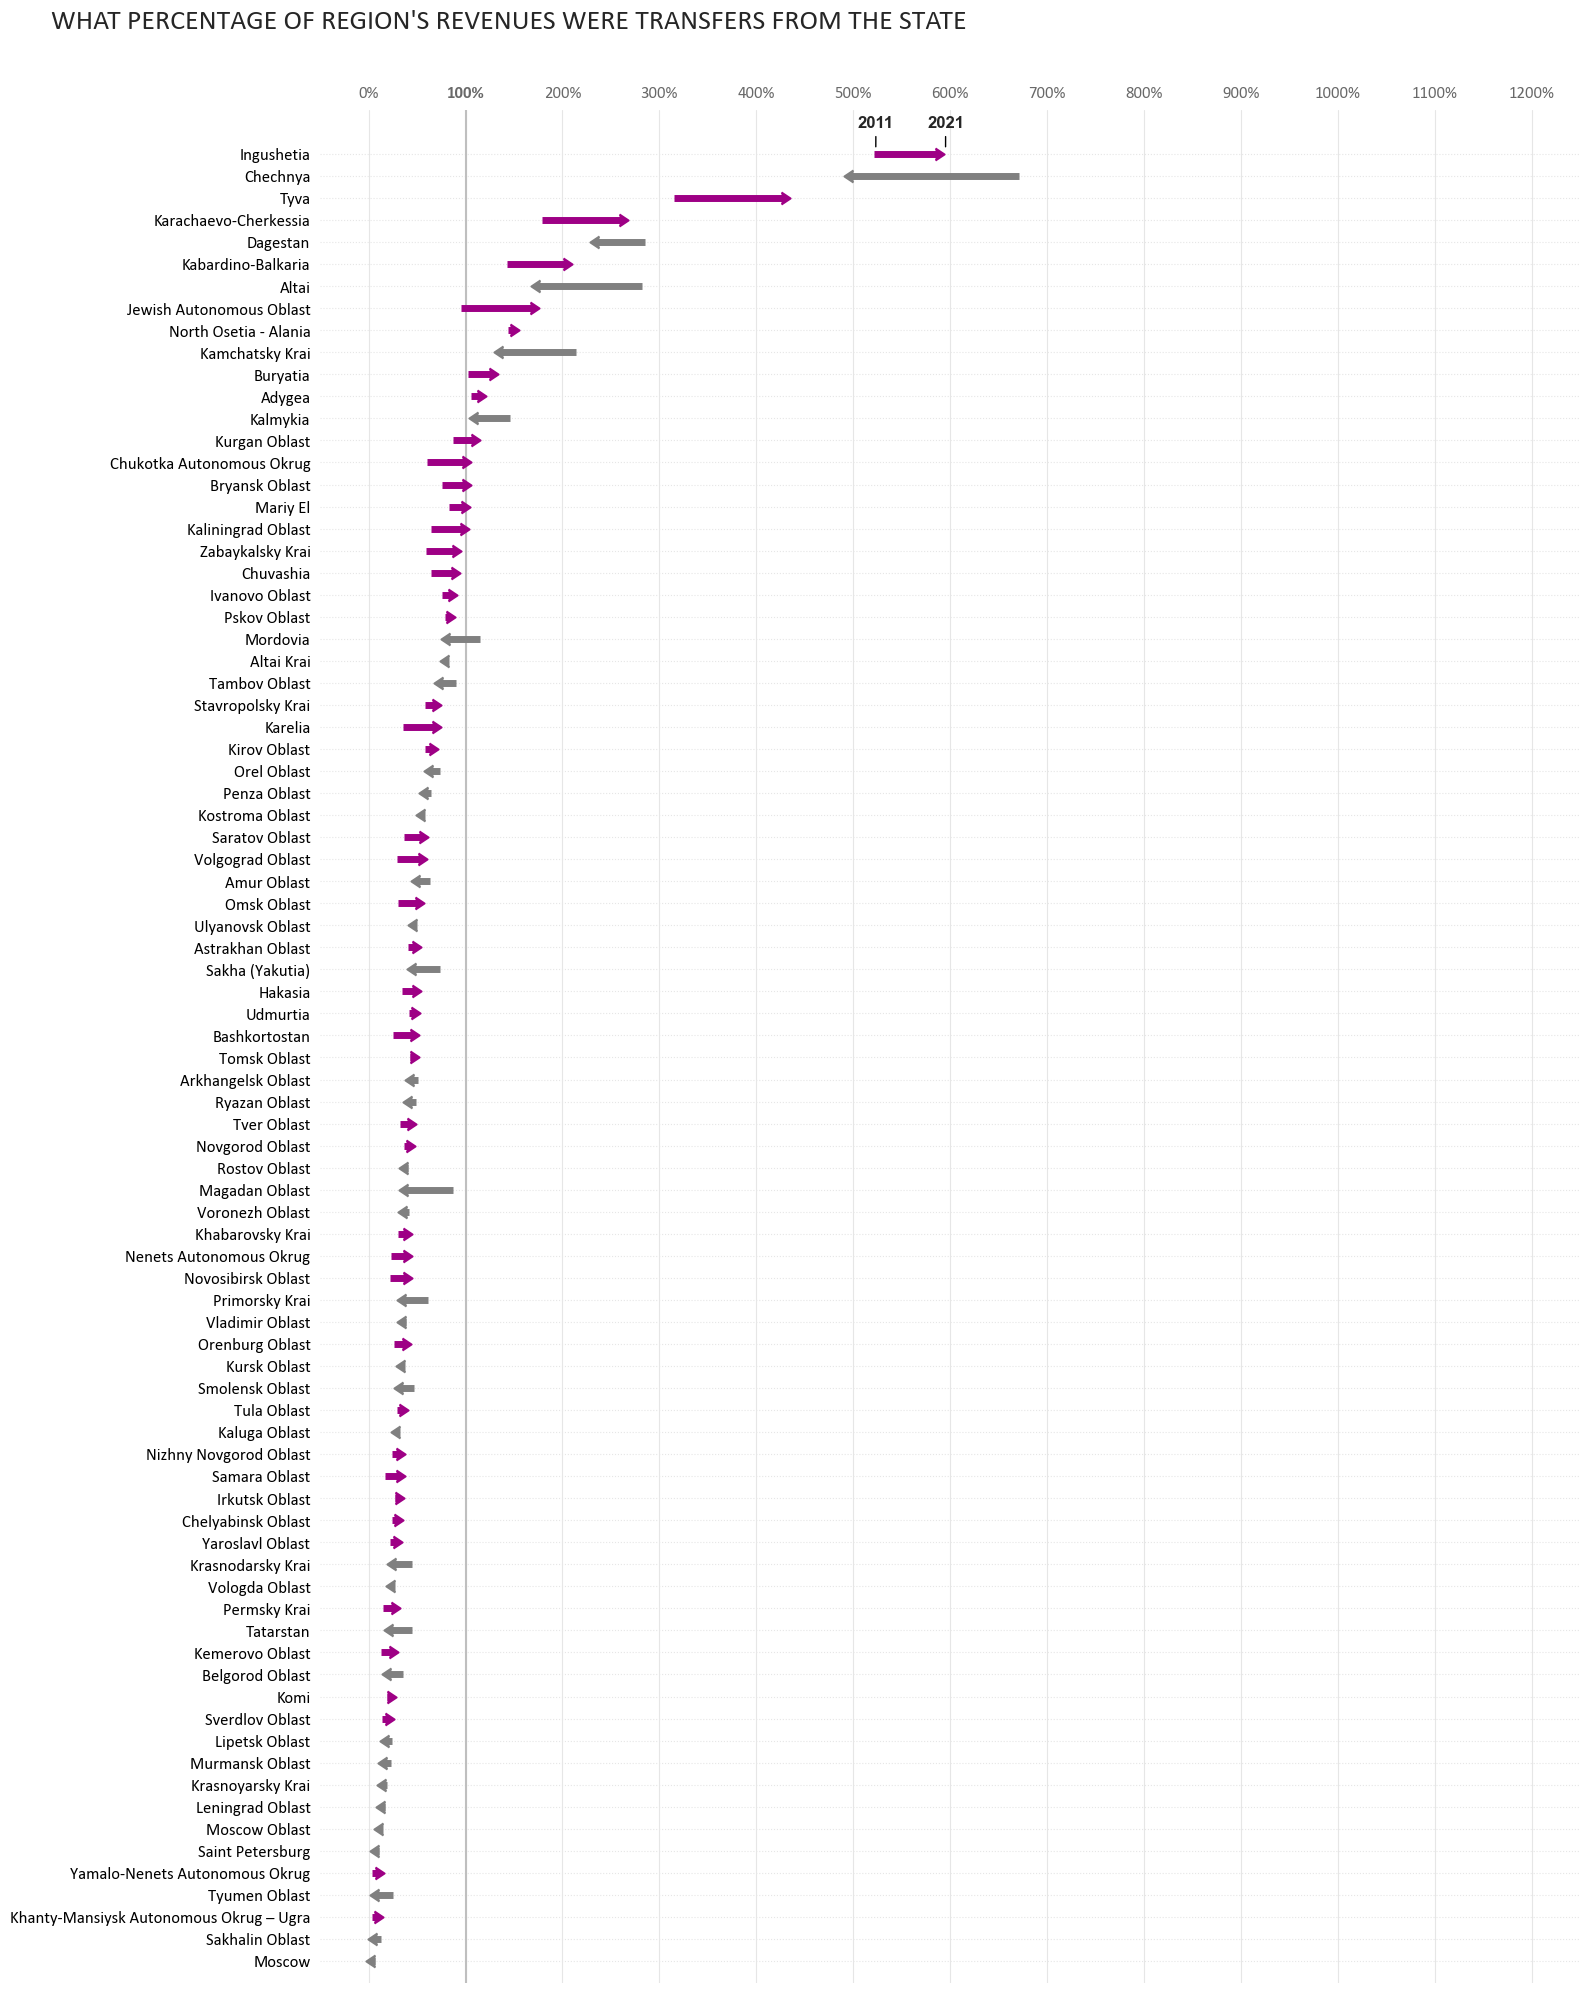

In [27]:
# THE CHART

hfont = {'fontname': 'Calibri'}
font_color = 'k'

plt.figure(figsize=(16, 20))
#sns.set_style('whitegrid', {'grid.linesyle': ':'})
y_range = range(len(regs_for_graph_2.index))

color_lines = dict()
for i in y_range:
    color_lines = []
    for val in regs_for_graph_2['diff']:
        if val > 0:
            color_lines.append('#9E0085')
        else:
            color_lines.append('#808080')

z = regs_for_graph_2['diff']
mask1 = z > 0
mask2 = z < 0

ax = plt.axes(frameon=False)
plt.hlines(y_range,
           xmin=regs_for_graph_2[2011],
           xmax=regs_for_graph_2[2021] + 2,
           color=color_lines,
           edgecolor=color_lines,
           lw=5,
           zorder=3)
plt.scatter(regs_for_graph_2[2021][mask2] + 4,
            regs_for_graph_2[mask2].index,
            color='#808080',
            s=75,
            marker=matplotlib.markers.CARETLEFTBASE,
            label=2011,
            zorder=4)
plt.scatter(regs_for_graph_2[2021][mask1],
            regs_for_graph_2[mask1].index,
            color='#9E0085',
            s=75,
            marker=matplotlib.markers.CARETRIGHTBASE,
            label=2021,
            zorder=4)

plt.annotate(2011,
             xy=(regs_for_graph_2[2011][82] + 2, y_range[82] + 0.2),
             xytext=(regs_for_graph_2[2011][82] - 16.5, y_range[82] + 1.2),
             arrowprops=dict(arrowstyle='-', color='k', lw=1),
             fontsize=12,
             fontweight='bold')
plt.annotate(2021,
             xy=(regs_for_graph_2[2021][82] + 11, y_range[82] + 0.2),
             xytext=(regs_for_graph_2[2021][82] - 8, y_range[82] + 1.2),
             arrowprops=dict(arrowstyle='-', color='k', lw=1),
             fontsize=12,
             fontweight='bold')

plt.gca().yaxis.grid(color='#E6E6E6', linestyle=':')
plt.gca().xaxis.grid(color='#E6E6E6', linestyle='-')
ax.legend().set_visible(False)

plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
ax.get_xticklabels()[1].set_weight('bold')

for label in ax.get_xticklabels():
    label.set(fontsize=12, color='dimgray', **hfont)

for label in ax.get_yticklabels():
    label.set(fontsize=12, color=font_color, **hfont)

plt.yticks(y_range, regs_for_graph_2['region_eng'])
plt.ylim(-1, 84)
plt.xlim(-50, 1250)

ynew = 100
ax.axvline(ynew, color='#BFBFBF', linestyle='-', zorder=1)

plt.title("WHAT PERCENTAGE OF REGION'S REVENUES WERE TRANSFERS FROM THE STATE",
          x=0.15,
          y=1.01,
          fontsize=20,
          pad=45,
          **hfont)

plt.tight_layout()

plt.show()

#### Key Takeaways

- Here we see a generally similar, although not so marked, process: the amount of money that regions take from the federal center has also grown in the majority of regions in terms of their own revenues. The total number of such dependants is smaller, however. So the transfers grow faster than the regions' revenues, just as their tax to the federal budget.


- The new subsidized leader is Ingushetia, which gets from the state an amount of money equal to six of its own revenues. Chechnya used to take even more, but now has lost its leadership and dropped to second place. Tyva is in third place with more than four revenues. However, all these regions are small and poor, so the absolute amounts of money are incomparable to the amount of taxes paid to the state by the leading donors.


- The number of pure dependents (those who get money equal to 100%+ of their own revenue) has grown from 13 to 18.


- There are several regions with a remarkable reduction in federal transfer share, e.g., Chechnya, Dagestan, Altai, Kamchatski Krai, and Kalmykia. The reasons for this are the subject for further analysis.

### [Cash leaders of the federal-regional money exchange](#contents) <a class="anchor" id="part_3_2"></a>

Now we look at the difference between two payments—federal taxes from the region and federal transfers to the region—as a net money flow between the region and the federation, and estimate it in absolute terms (USD). In each region, this flow would be either "positive" (to the region) or "negative" (to the state). Let's look at the leaders of net cash flow for 2017–2021 and compare the sums that they paid or got to those for 2012–2016.

In [28]:
# the next dataframe will be used in several further charts
cum_flow = df.query('(i1 == 1 & r1 > 1 & r3 == 0) | (i1 == 1 & i3 == 9)')[[
    'index', 'year', 'region_eng', 'value'
]].pivot(index=['year', 'region_eng'], columns='index',
         values='value').fillna(0)

# absolute money flow between the region and the state
cum_flow['flow_to_fed'] = cum_flow['tax_to_fed'] - cum_flow['transfers_to_reg']

# -> $ mln
cum_flow['flow_to_fed_usdmln'] = (cum_flow['flow_to_fed'] /
                                  cum_flow['rub_usd'] / 1000000).round(1)

# cumulative flow for each region
cum_flow['flow_to_fed_usdmln_cum'] = cum_flow.groupby(
    level=1)['flow_to_fed_usdmln'].cumsum()

cum_flow_2017_2021 = cum_flow.loc[2017:2021][[
    'flow_to_fed_usdmln'
]].groupby(level=1).cumsum().loc[2021].sort_values(by='flow_to_fed_usdmln',
                                                   ascending=True)
cum_flow_2017_2021 = (cum_flow_2017_2021.rename(
    columns={'flow_to_fed_usdmln': 'flow_to_fed_usdbn'}) / 1000).round(0)
cum_flow_2017_2021['flow_to_fed_usdbn'] = cum_flow_2017_2021[
    'flow_to_fed_usdbn'].astype('int')
cum_flow_2017_2021 = cum_flow_2017_2021.query(
    'flow_to_fed_usdbn < -1 | flow_to_fed_usdbn > 1')

cum_flow_2012_2016 = cum_flow.loc[2012:2016][[
    'flow_to_fed_usdmln'
]].groupby(level=1).cumsum().loc[2016].sort_values(by='flow_to_fed_usdmln',
                                                   ascending=True)
cum_flow_2012_2016 = (cum_flow_2012_2016.rename(
    columns={'flow_to_fed_usdmln': 'flow_to_fed_usdbn'}) / 1000).round(0)
cum_flow_2012_2016['flow_to_fed_usdbn_prev'] = cum_flow_2012_2016[
    'flow_to_fed_usdbn'].astype('int')

cum_flow_2017_2021 = cum_flow_2017_2021.join(
    cum_flow_2012_2016[['flow_to_fed_usdbn_prev']], how='left')

cum_flow_2017_2021.head()

index            flow_to_fed_usdbn  flow_to_fed_usdbn_prev
region_eng                                                
crimea                          -8                      -5
dagestan                        -7                      -7
chechnya                        -6                      -7
amur oblast                     -4                      -2
kamchatsky krai                 -4                      -4

#### [Chart 12: Cumulative net cash flow between the regions and the federal center in 2017-2021](#contents) <a class="anchor" id="chart_12"></a>

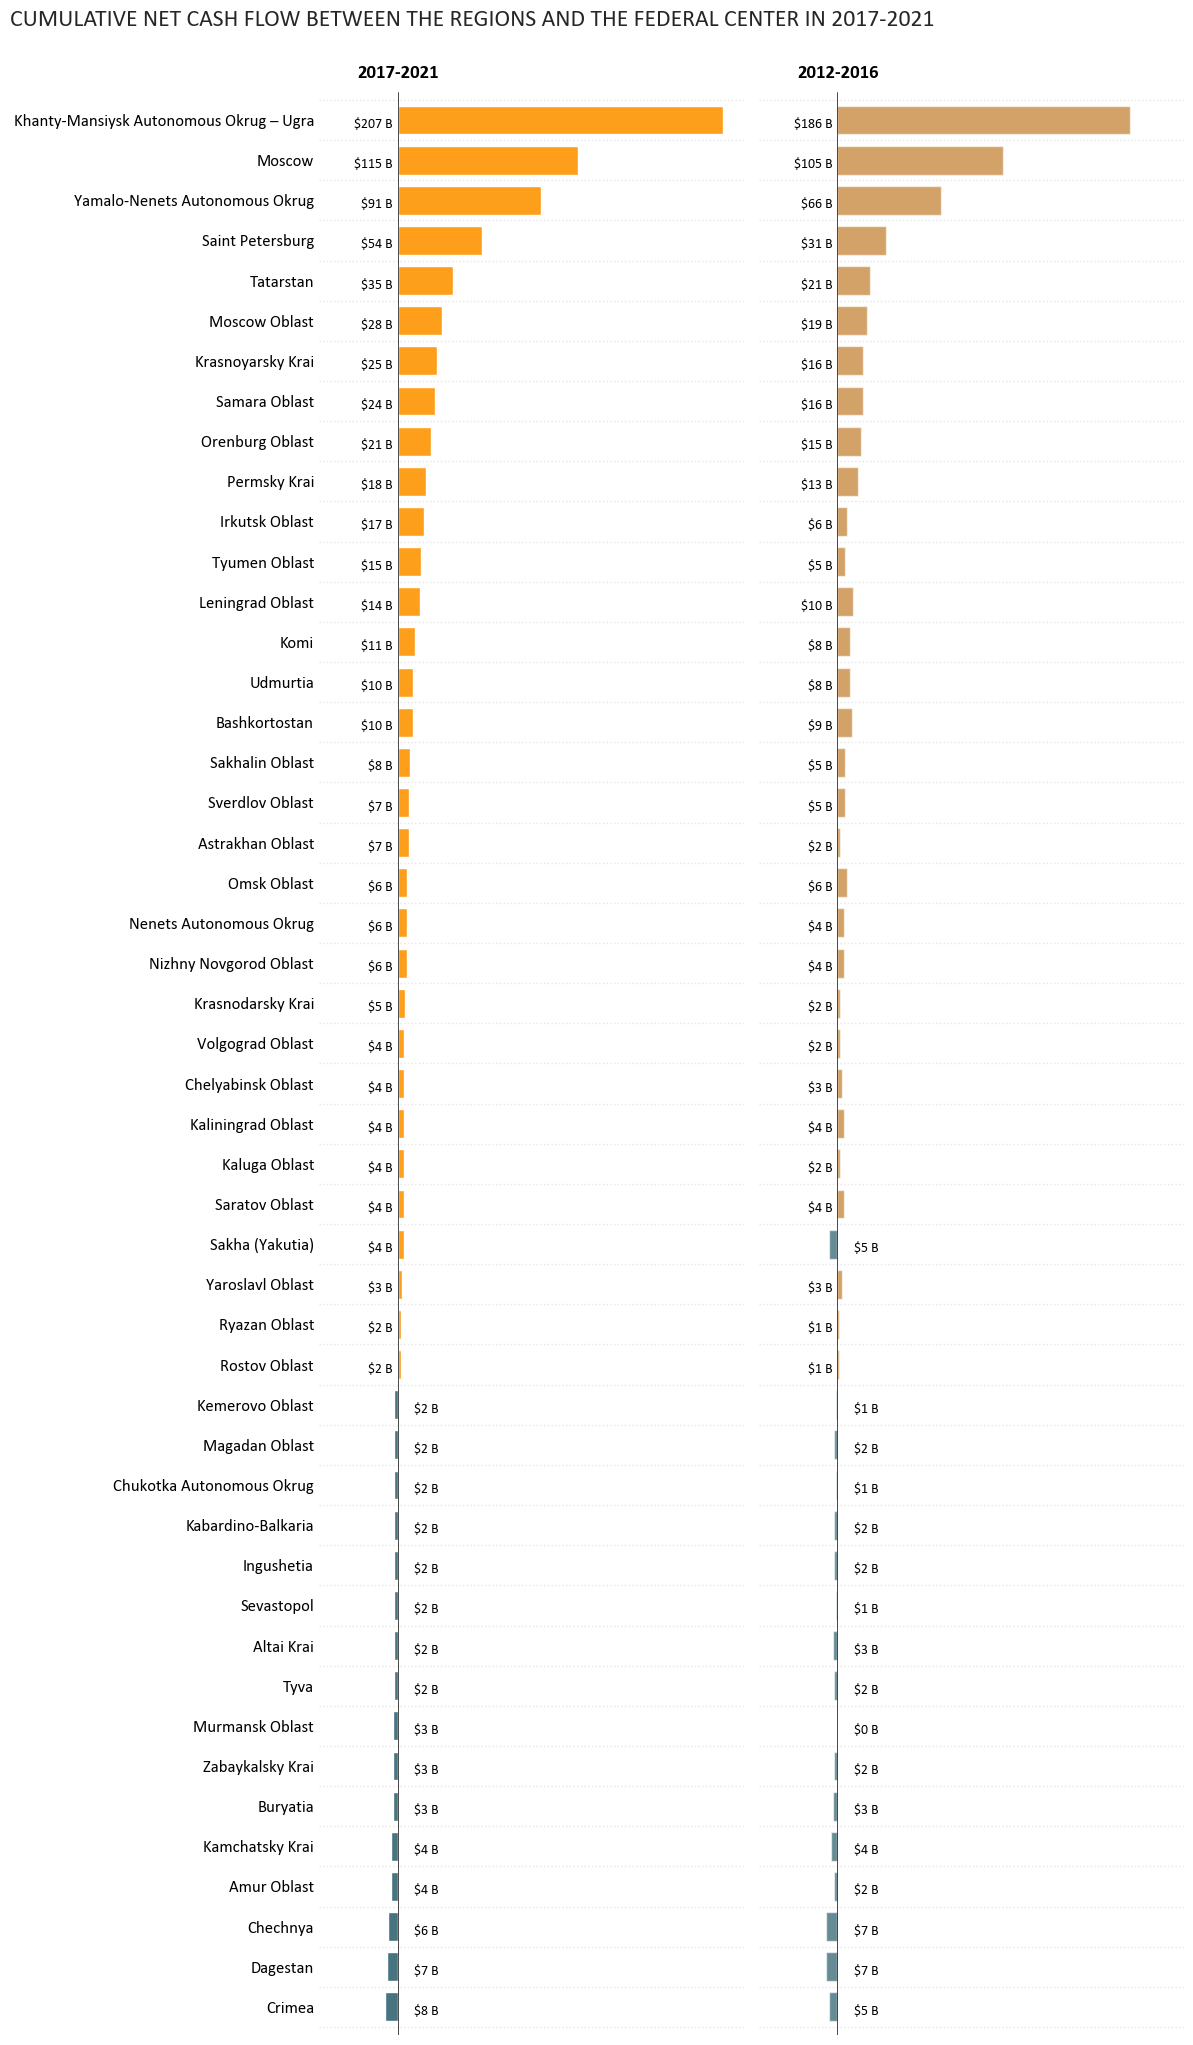

In [29]:
x = cum_flow_2017_2021.index.str.title()  # region names
y1 = cum_flow_2017_2021['flow_to_fed_usdbn']  # cumulative flows for 2017-2021
y2 = cum_flow_2017_2021[
    'flow_to_fed_usdbn_prev']  # cumulative flows for 2012-2016

# color dict for 2017-2021 chart
color_bars_1 = dict()
for i in range(len(x)):
    color_bars_1 = []
    for val in cum_flow_2017_2021['flow_to_fed_usdbn']:
        if val > 0:
            color_bars_1.append('#fd9f1a')
        else:
            color_bars_1.append('#467481')

# color dict for 2012-2016 chart
color_bars_2 = dict()
for i in range(len(x)):
    color_bars_2 = []
    for val in cum_flow_2017_2021['flow_to_fed_usdbn_prev']:
        if val > 0:
            color_bars_2.append('#b46406')
        else:
            color_bars_2.append('#003e4f')

fig, ax = plt.subplots(figsize=(12, 20), facecolor='w', ncols=2, sharey=True)

plt.tight_layout()

ax[0].barh(x, y1, color=color_bars_1, align='center', height=0.72)
ax[1].barh(x, y2, color=color_bars_2, alpha=0.6, align='center', height=0.72)
ax[0].set_title('2017-2021',
                loc='left',
                x=0.09,
                fontsize=13.5,
                fontweight='bold',
                pad=10,
                color='k',
                **hfont)
ax[1].set_title('2012-2016',
                loc='left',
                x=0.09,
                fontsize=13.5,
                fontweight='bold',
                pad=10,
                color='k',
                **hfont)

# annotating the 2017-2021 bars
for n, m in enumerate(y1):
    if m > 0:
        p = -3
    else:
        p = 26
        m = -m

    ax[0].text(x=p,
               y=n - 0.2,
               s=f'${m} B',
               color="k",
               fontsize=10,
               horizontalalignment='right',
               **hfont)

# annotating the 2012-2016 bars
for n, m in enumerate(y2):
    if m > 0:
        p = -3
    else:
        p = 26
        m = -m

    ax[1].text(x=p,
               y=n - 0.2,
               s=f'${m} B',
               color="k",
               fontsize=10,
               horizontalalignment='right',
               **hfont)

# setting minor ticks to draw gridlines between the bars
ax[0].yaxis.set_minor_locator(
    mtick.FixedLocator(np.arange(-0.5, len(cum_flow_2017_2021.index), 1)))
ax[0].set_yticks(x)
ax[0].set_yticklabels(x)
ax[0].grid(which='minor',
           axis='y',
           color='#E6E6E6',
           linestyle=':',
           linewidth=1,
           zorder=3)
ax[0].grid(visible=False, which='major', axis='y')

ax[1].yaxis.set_minor_locator(
    mtick.FixedLocator(np.arange(-0.5, len(cum_flow_2017_2021.index), 1)))
ax[1].set_yticks(x)
ax[1].set_yticklabels(x)
ax[1].grid(which='minor',
           axis='y',
           color='#E6E6E6',
           linestyle=':',
           linewidth=1,
           zorder=3)
ax[1].grid(visible=False, which='major', axis='y')

for label in ax[0].get_yticklabels():
    label.set(fontsize=12, color=font_color, **hfont)
ax[0].get_xaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[0].yaxis.set_tick_params(which='both', length=0)
ax[1].yaxis.set_tick_params(which='both', length=0)

ax[0].axvline(0, color='k', linestyle='-', linewidth=0.5, zorder=1)
ax[1].axvline(0, color='k', linestyle='-', linewidth=0.5, zorder=1)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].set_xlim(xmin=-50, xmax=220)
ax[0].set_ylim(ymin=-0.7, ymax=len(cum_flow_2017_2021.index) - 0.3)
ax[1].set_xlim(xmin=-50, xmax=220)
ax[1].set_ylim(ymin=-0.7, ymax=len(cum_flow_2017_2021.index) - 0.3)

plt.tight_layout()

plt.suptitle(
    'CUMULATIVE NET CASH FLOW BETWEEN THE REGIONS AND THE FEDERAL CENTER IN 2017-2021',
    x=0.78,
    y=1.02,
    fontsize=17,
    ha='right',
    va='top',
    **hfont)

plt.show()

#### Key Takeaways

- Here we can see the leaders of cash flow for 2017–2021, which sent or got a billion dollars or more for this period, and their similar indicators for 2012–2016. Generally, if we take 5-year periods, almost nothing changes, except for the amount of money that is given to the federal center. The changes in the amounts of money transferred to the regions are small, with only the Crimea (annexed in 2014) as an exception.


- We see a significant growth of net cash flow to the state from the so-called new donor regions-Irkutsk, Tyumen, and Astrakhan, but also regions that are not oil-bearing, e.g., Krasnodarsky Krai, Volgograd, Kaluga, etc.


- Sakha changed its status from dependent to donor.

## [Any benefits for the state's sponsors?](#contents) <a class="anchor" id="part_4"></a>

### [Mapping the givers and takers](#contents) <a class="anchor" id="part_4_1"></a>

Which regions become donors or takers? Do they have enough money for their needs? Do many people live there? Are these people rich or poor compared to the national average? Here we'll prepare a dataframe to check all these questions. After that we'll map all the regions according to the amount of money which they give or take from the state, and the amount of their surplus or deficit in relation to their own revenues. 

In [30]:
regional_flows = df.query(
    '(i1 == 1 & r1 != 0 & r3 == 0) | (i1 == 1 & i3 == 2 & s1 == 0) | (i1 == 1 & 5 <= i3 <= 9) | (i1 == 1 & i3 == 2 & s1 in (7,9) & s2 == 0)'
)[['year', 'index', 'region_eng', 'value']].pivot(index=['year', 'region_eng'],
                                                  columns='index',
                                                  values='value').fillna(0)

# spending on human capital (healthcare + education), total and per capita
regional_flows[
    'humcap'] = regional_flows['education'] + regional_flows['healthcare']
regional_flows['humcap_per_cap'] = (regional_flows['humcap'] /
                                    regional_flows['population']).round(1)

# deficit = own revenue + federal transfers - spending
regional_flows['deficit'] = regional_flows['reg_own_revenue'] + regional_flows[
    'transfers_to_reg'] - regional_flows['reg_spending']

# net cash flow between the region and the federal center
regional_flows['flow_to_fed'] = regional_flows[
    'transfers_to_reg'] - regional_flows['tax_to_fed']

# -> $ mln
regional_flows['flow_to_fed_usd'] = (regional_flows['flow_to_fed'] /
                                     regional_flows['rub_usd'] /
                                     1000000).round(1)
regional_flows['reg_own_revenue_usd'] = (regional_flows['reg_own_revenue'] /
                                         regional_flows['rub_usd'] /
                                         1000000).round(1)
regional_flows['tax_to_fed_usd'] = (regional_flows['tax_to_fed'] /
                                    regional_flows['rub_usd'] /
                                    1000000).round(1)
regional_flows['transfers_to_reg_usd'] = (regional_flows['transfers_to_reg'] /
                                          regional_flows['rub_usd'] /
                                          1000000).round(1)

# -> RUB bn
regional_flows[[
    'reg_own_revenue', 'tax_to_fed', 'transfers_to_reg', 'reg_spending',
    'education', 'healthcare', 'humcap', 'deficit', 'flow_to_fed'
]] = (regional_flows[[
    'reg_own_revenue', 'tax_to_fed', 'transfers_to_reg', 'reg_spending',
    'education', 'healthcare', 'humcap', 'deficit', 'flow_to_fed'
]] / 1000000000).round(1)

# -> as a percentage of the region's own revenue
regional_flows['deficit_rev_share'] = (regional_flows['deficit'] /
                                       regional_flows['reg_own_revenue'] *
                                       100).round(1)
regional_flows['flow_to_fed_rev_share'] = (regional_flows['flow_to_fed'] /
                                           regional_flows['reg_own_revenue'] *
                                           100).round(1)

# If net money flow (transfers from the federal center minus taxes to it) is more than 100% of own revenue for the corresponding
# year, we'll consider this region a dependent by 100% and more. If the flow is -100% or less, the region is a 100%+ donor. If
# the region gives away or takes from the federation a sum equivalent to less than 100% of its own revenue, it'll be called up
# to 100% donor or dependent, correspondingly.


def region_class(s):
    if s['flow_to_fed'] == 0:
        return 'no_data'
    elif s['flow_to_fed'] <= -s['reg_own_revenue']:
        return 'donor_100_and_more'
    elif -s['reg_own_revenue'] < s['flow_to_fed'] < 0:
        return 'donor_up_to_100'
    elif 0 < s['flow_to_fed'] < s['reg_own_revenue']:
        return 'dependent_up_to_100'
    elif s['flow_to_fed'] > s['reg_own_revenue']:
        return 'dependent_100_and_more'


regional_flows['region_class'] = regional_flows.apply(region_class, axis=1)

# average regional income per capita and regional spendings on human capital per capita -> USD
regional_flows['income_usd_per_cap'] = (regional_flows['income_per_cap'] /
                                        regional_flows['rub_usd']).round(
                                            1)  # for the year
regional_flows['humcap_usd_per_cap'] = (regional_flows['humcap_per_cap'] /
                                        regional_flows['rub_usd']).round(1)

# average regional income per capita and regional spendings on human capital per capita ->
# a percentage towards the coutry average
regional_flows['income_tw_mean'] = regional_flows[
    'income_usd_per_cap'] / regional_flows.groupby(
        level=0)['income_usd_per_cap'].mean()
regional_flows['humcap_tw_mean'] = regional_flows[
    'humcap_usd_per_cap'] / regional_flows.groupby(
        level=0)['humcap_usd_per_cap'].mean()

# defining regions' per capita income classes: the poorest 40%, 20%, 20%, and the richest 20%
# the mean per capita income fluctuates around 7-th quantile (70%)

quantiles = dict()
years = pd.Series(range(2011, 2022))

for year in years:
    quantiles[year] = []
    inc_quantile_80 = float(
        regional_flows.loc[year].income_usd_per_cap.quantile([0.8]))
    inc_quantile_60 = float(
        regional_flows.loc[year].income_usd_per_cap.quantile([0.6]))
    inc_quantile_40 = float(
        regional_flows.loc[year].income_usd_per_cap.quantile([0.4]))
    quantiles[year].append([inc_quantile_80, inc_quantile_60, inc_quantile_40])

df_quantiles = pd.DataFrame(quantiles).T
df_quantiles['inc_quantile_80'], df_quantiles['inc_quantile_60'], df_quantiles[
    'inc_quantile_40'] = zip(*df_quantiles[0])
df_quantiles = df_quantiles.rename(index={'index': 'year'}).drop(0, axis=1)

regional_flows = regional_flows.reset_index().set_index('year').join(
    df_quantiles).reset_index().rename(columns={
        'index': 'year'
    }).set_index(['year', 'region_eng'])


def region_inc(s):
    if s['income_usd_per_cap'] == 0:
        return 'nodata'
    elif s['income_usd_per_cap'] >= s['inc_quantile_80']:
        return 'high'
    elif s['inc_quantile_60'] <= s['income_usd_per_cap'] < s['inc_quantile_80']:
        return 'higher_avg'
    elif s['inc_quantile_60'] > s['income_usd_per_cap'] >= s['inc_quantile_40']:
        return 'lower_avg'
    elif s['income_usd_per_cap'] < s['inc_quantile_40']:
        return 'low'


regional_flows['region_inc'] = regional_flows.apply(region_inc, axis=1)

# ADDITIONAL COLUMNS FOR PLOTLY CHARTS


def inc_order(s):
    if s['region_inc'] == 'high':
        return 0
    elif s['region_inc'] == 'higher_avg':
        return 1
    elif s['region_inc'] == 'lower_avg':
        return 2
    elif s['region_inc'] == 'low':
        return 3
    elif s['region_inc'] == 'nodata':
        return 4
    else:
        return 5


regional_flows['inc_order'] = regional_flows.apply(inc_order, axis=1)


def big_class(s):
    if s['flow_to_fed_usd'] > 0:
        return 'Absorbing Regions'
    elif s['flow_to_fed_usd'] < 0:
        return 'Donating Regions'


regional_flows['big_class'] = regional_flows.apply(big_class, axis=1)

regional_flows['flow_to_fed_usd_abs'] = abs(regional_flows['flow_to_fed_usd'])

regional_flows = regional_flows[[
    'reg_own_revenue', 'tax_to_fed', 'transfers_to_reg', 'flow_to_fed_usd',
    'flow_to_fed_usd_abs', 'deficit_rev_share', 'flow_to_fed_rev_share',
    'population', 'income_usd_per_cap', 'humcap_usd_per_cap', 'region_class',
    'region_inc', 'income_tw_mean', 'poverty', 'humcap_tw_mean', 'inc_order',
    'big_class', 'reg_own_revenue_usd', 'tax_to_fed_usd',
    'transfers_to_reg_usd'
]]

regional_flows = regional_flows.sort_values(by=['year', 'inc_order'])

regional_flows.head()

reg_own_revenue  tax_to_fed  \
year region_eng                                                             
2011 chukotka autonomous okrug                           12.4         1.3   
     kamchatsky krai                                     17.2         3.0   
     khabarovsky krai                                    61.2        15.1   
     khanty-mansiysk autonomous okrug – ugra            187.7      1278.6   
     komi                                                48.3        62.0   

                                              transfers_to_reg  \
year region_eng                                                  
2011 chukotka autonomous okrug                             7.5   
     kamchatsky krai                                      36.9   
     khabarovsky krai                                     18.7   
     khanty-mansiysk autonomous okrug – ugra               6.2   
     komi                                                  8.9   

                                              flow_to_fed_usd  \
year region_eng                                                 
2011 chukotka autonomous okrug                          210.8   
     kamchatsky krai                                   1153.2   
     khabarovsky krai                                   122.1   
     khanty-mansiysk autonomous okrug – ugra         -43288.6   
     komi                                             -1804.8   

                                              flow_to_fed_usd_abs  \
year region_eng                                                     
2011 chukotka autonomous okrug                              210.8   
     kamchatsky krai                                       1153.2   
     khabarovsky krai                                       122.1   
     khanty-mansiysk autonomous okrug – ugra              43288.6   
     komi                                                  1804.8   

                                              deficit_rev_share  \
year region_eng                                                   
2011 chukotka autonomous okrug                              8.1   
     kamchatsky krai                                        2.3   
     khabarovsky krai                                      -0.3   
     khanty-mansiysk autonomous okrug – ugra                0.7   
     komi                                                  -4.3   

                                              flow_to_fed_rev_share  \
year region_eng                                                       
2011 chukotka autonomous okrug                                 50.0   
     kamchatsky krai                                          197.1   
     khabarovsky krai                                           5.9   
     khanty-mansiysk autonomous okrug – ugra                 -677.9   
     komi                                                    -109.7   

                                              population  income_usd_per_cap  \
year region_eng                                                                
2011 chukotka autonomous okrug                   50667.0              1464.6   
     kamchatsky krai                            320907.0               985.4   
     khabarovsky krai                          1342680.0               808.6   
     khanty-mansiysk autonomous okrug – ugra   1549186.0               869.0   
     komi                                       894526.0               813.9   

                                              humcap_usd_per_cap  \
year region_eng                                                    
2011 chukotka autonomous okrug                            3951.5   
     kamchatsky krai                                      1967.9   
     khabarovsky krai                                      875.8   
     khanty-mansiysk autonomous okrug – ugra              1856.7   
     komi                                                 1016.4   

                                                        region_class  \
year region_eng          

#### [Chart 13: Mapping the donors, the dependents, and their budget balances](#contents) <a class="anchor" id="chart_13"></a>

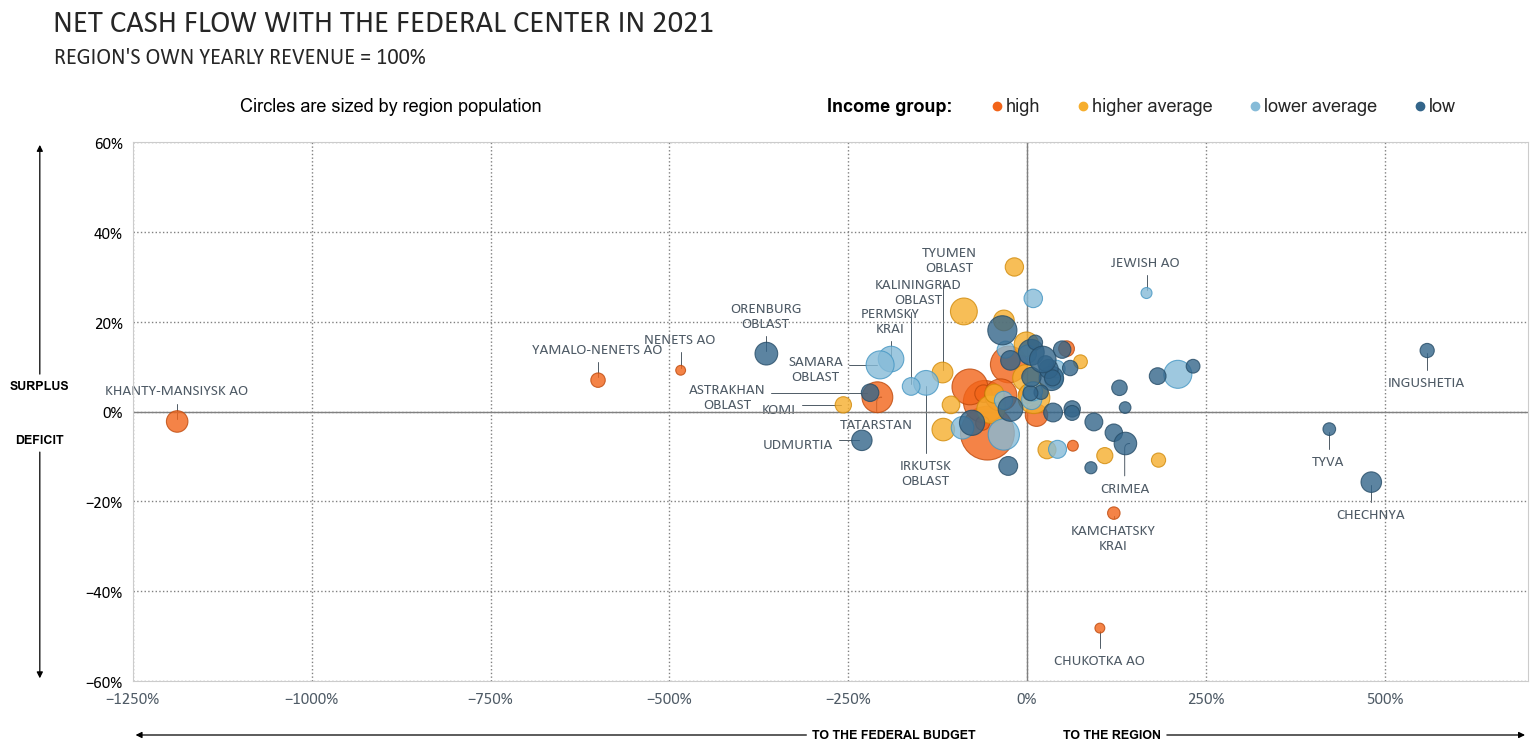

In [31]:
# and put the net money flow to and from the federal government as the x-axis and the budget surplus or deficit as the y-axis;
# we'll use color to identify the income group of the region (high income, higher than the country's average, lower than the
# country's average, low), and size the dots according to the population quantity of the region.

# COORDINATES AND NAMES FOR ANNOTATIONS
coordinates = regional_flows.loc[2021][
    (regional_flows.loc[2021]["flow_to_fed_rev_share"] >= 100) |
    (regional_flows.loc[2021]["flow_to_fed_rev_share"] <= -100)][[
        'flow_to_fed_rev_share', 'deficit_rev_share'
    ]]
coordinates = coordinates.rename(
    index={
        'chukotka autonomous okrug': 'Chukotka AO',
        'jewish autonomous oblast': 'Jewish AO',
        'khanty-mansiysk autonomous okrug – ugra': 'Khanty-Mansiysk AO',
        'nenets autonomous okrug': 'Nenets AO',
        'north osetia - alania': 'North Osetia',
        'yamalo-nenets autonomous okrug': 'Yamalo-Nenets AO'
    })
coordinates.index = coordinates.index.str.upper()
coordinates.index = coordinates.index.str.replace(' OBLAST',
                                                  '\nOBLAST',
                                                  regex=True)
coordinates.index = coordinates.index.str.replace(' KRAI',
                                                  '\nKRAI',
                                                  regex=True)
coordinates.index = coordinates.index.str.replace(' OKRUG',
                                                  '\nOKRUG',
                                                  regex=True)

# THE CHART
hfont = {'fontname': 'Calibri'}
x_color = '#4f5b66'
y_color = 'k'

sns.set_style('whitegrid')
x = regional_flows.loc[2021][
    'flow_to_fed_rev_share']  # net cash flow between the region and
# the center as a % of region's revenue
y = regional_flows.loc[2021][
    'deficit_rev_share']  # region's surplus/deficit as a % of region's revenue
color = regional_flows.loc[2021]['region_inc']  # colored by the income group
size = regional_flows.loc[2021]['population']  # sized by the population

# preparing a color dict
z = regional_flows.loc[2021]['region_inc'].dropna()
colors = []
for i in range(len(z)):
    if z[i] == "high":
        colors.append('#be490b')
    if z[i] == "higher_avg":
        colors.append('#d18a09')
    if z[i] == "lower_avg":
        colors.append('#4496c3')
    if z[i] == "low":
        colors.append('#264c67')

fig, ax = plt.subplots(figsize=(18, 7))

ax = sns.scatterplot(x=x,
                     y=y,
                     data=regional_flows.loc[2021],
                     hue=color,
                     size=size,
                     sizes=(50, 1500),
                     alpha=.8,
                     lw=20,
                     palette=['#f26419', '#f6ae2d', '#86bbd8', '#33658a'],
                     edgecolor=colors,
                     zorder=3)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# some addings for the legend
ax.text(-1100,
        67,
        "Circles are sized by region population",
        color='k',
        fontsize=13)
ax.text(-280, 67, "Income group:", color='k', fontsize=13, fontweight='bold')

# we use annotations with arrows to label x and y axes
ax.annotate("SURPLUS",
            xy=(-1380, 60),
            xytext=(-1380, 5),
            arrowprops=dict(arrowstyle="-|>", color='k', lw=0.9),
            color='k',
            fontsize=9,
            fontweight='bold',
            horizontalalignment='center',
            annotation_clip=False)
ax.annotate("DEFICIT",
            xy=(-1380, -60),
            xytext=(-1380, -7),
            arrowprops=dict(arrowstyle="-|>", color='k', lw=0.9),
            color='k',
            fontsize=9,
            fontweight='bold',
            horizontalalignment='center',
            annotation_clip=False)
ax.annotate("TO THE REGION",
            xy=(700, -72),
            xytext=(50, -72),
            arrowprops=dict(arrowstyle="-|>", color='k', lw=0.9),
            color='k',
            fontsize=9,
            fontweight='bold',
            verticalalignment='center',
            annotation_clip=False)
ax.annotate("TO THE FEDERAL BUDGET",
            xy=(-1250, -72),
            xytext=(-300, -72),
            arrowprops=dict(arrowstyle="-|>", color='k', lw=0.9),
            color='k',
            fontsize=9,
            fontweight='bold',
            verticalalignment='center',
            annotation_clip=False)

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

ax.grid(which='major',
        axis='both',
        color='#808080',
        linestyle=':',
        linewidth=1,
        zorder=0)
for label in ax.get_xticklabels():
    label.set(fontsize=12, color=x_color, **hfont)
for label in ax.get_yticklabels():
    label.set(fontsize=12, color=y_color, **hfont)

plt.axhline(0, color='#808080', linewidth=1, zorder=1)
plt.axvline(0, color='#808080', linewidth=1, zorder=1)
plt.ylim(ymin=-60, ymax=60)
plt.xlim(xmin=-1250, xmax=700)

# legend
h, l = ax.get_legend_handles_labels()
plt.legend(h[1:5], ['high', 'higher average', 'lower average', 'low'],
           ncol=4,
           bbox_to_anchor=(-0.06, 1.02, 1.02, 0),
           loc='lower right',
           fontsize=13,
           frameon=False,
           handlelength=0.7,
           handletextpad=0.15)

# annotations style dicts
arrowprops1 = dict(arrowstyle='-',
                   color='#4f5b66',
                   lw=0.7,
                   connectionstyle="angle,angleA=0,angleB=90,rad=5")
arrowprops2 = dict(arrowstyle='-',
                   color='#4f5b66',
                   lw=0.7,
                   connectionstyle="angle,angleA=90,angleB=0,rad=5")
kwargs1 = {
    'fontname': 'Calibri',
    'fontsize': 11,
    'horizontalalignment': 'center',
    'color': '#4f5b66'
}
kwargs2 = {
    'fontname': 'Calibri',
    'fontsize': 11,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
    'color': '#4f5b66'
}

# making annotations
c_x = coordinates["flow_to_fed_rev_share"]
c_y = coordinates["deficit_rev_share"]
c_i = coordinates.index

mask1 = (c_x < -280)
mask2 = (c_x > 250)
mask3 = (c_y > 20)
mask4 = (c_y < -20)
mask5 = ((c_i == "KOMI") | (c_i == "SAMARA\nOBLAST") | (c_i == "UDMURTIA"))
tomsk = (c_i == "TOMSK\nOBLAST")
perm = (c_i == "PERMSKY\nKRAI")
tyumen = (c_i == "TYUMEN\nOBLAST")
irkutsk = (c_i == "IRKUTSK\nOBLAST")
kalin = (c_i == "KALININGRAD\nOBLAST")
tatar = (c_i == "TATARSTAN")
astr = (c_i == "ASTRAKHAN\nOBLAST")
crimea = (c_i == "CRIMEA")

x1 = c_x[mask1 | mask3 | perm]
y1 = c_y[mask1 | mask3 | perm]
names1 = c_i[mask1 | mask3 | perm]
for x0, y0, name in zip(x1, y1, names1):
    ax.annotate(name,
                xy=(x0, y0),
                xytext=(x0 - 1, y0 + 6),
                arrowprops=arrowprops1,
                **kwargs1,
                zorder=0)

x2 = c_x[mask2 | mask4 | tomsk]
y2 = c_y[mask2 | mask4 | tomsk]
names2 = c_i[mask2 | mask4 | tomsk]
for x0, y0, name in zip(x2, y2, names2):
    ax.annotate(name,
                xy=(x0, y0),
                xytext=(x0 - 1, y0 - 8),
                arrowprops=arrowprops1,
                **kwargs1,
                zorder=0)

x3 = c_x[mask5]
y3 = c_y[mask5]
names3 = c_i[mask5]
for x0, y0, name in zip(x3, y3, names3):
    ax.annotate(name,
                xy=(x0, y0),
                xytext=(x0 - 90, y0 - 1),
                arrowprops=arrowprops2,
                **kwargs2,
                zorder=0)

x4 = c_x[tatar][0]
y4 = c_y[tatar][0]
names4 = c_i[tatar][0]
ax.annotate(names4,
            xy=(x4, y4),
            xytext=(x4 - 1, y4 - 6),
            arrowprops=arrowprops2,
            **kwargs2,
            zorder=0)

x5 = c_x[astr][0]
y5 = c_y[astr][0]
names5 = c_i[astr][0]
ax.annotate(names5,
            xy=(x5, y5),
            xytext=(x5 - 200, y5 - 1),
            arrowprops=arrowprops2,
            **kwargs2,
            zorder=0)

x6 = c_x[crimea][0]
y6 = c_y[crimea][0]
names6 = c_i[crimea][0]
ax.annotate(names6,
            xy=(x6, y6),
            xytext=(x6 - 1, y6 - 10),
            arrowprops=arrowprops2,
            **kwargs2,
            zorder=0)

x7 = c_x[tyumen][0]
y7 = c_y[tyumen][0]
names7 = c_i[tyumen][0]
ax.annotate(names7,
            xy=(x7, y7),
            xytext=(x7 + 10, y7 + 25),
            arrowprops=arrowprops1,
            **kwargs2,
            zorder=0)

x8 = c_x[kalin][0]
y8 = c_y[kalin][0]
names8 = c_i[kalin][0]
ax.annotate(names8,
            xy=(x8, y8),
            xytext=(x8 + 10, y7 + 18),
            arrowprops=arrowprops1,
            **kwargs2,
            zorder=0)

x9 = c_x[irkutsk][0]
y9 = c_y[irkutsk][0]
names9 = c_i[irkutsk][0]
ax.annotate(names9,
            xy=(x9, y9),
            xytext=(x9 - 1, y9 - 20),
            arrowprops=arrowprops1,
            **kwargs2,
            zorder=0)

plt.suptitle('NET CASH FLOW WITH THE FEDERAL CENTER IN 2021',
             x=0.448,
             y=1.07,
             fontsize=22,
             ha='right',
             va='top',
             **hfont)
plt.title("REGION'S OWN YEARLY REVENUE = 100%",
          x=0.21,
          y=1.16,
          fontsize=16,
          ha='right',
          va='top',
          **hfont)

plt.show()

#### Key Takeaways

- The map shows the distribution of money from the region's point of view. We see that the dwellers of several regions with maximum donations to the federation relative to their own revenues are actually richer than the majority of the Russian population.


- However, lots of regions with poor populations also sponsor the federal budget with money exceeding their own revenues. Among them is Orenburg Oblast, whose population is quite large and poor even by Russian standards. It used to be a federal sponsor 10 years ago as well, so we see that nothing has changed for its dwellers during these years, although the amount of the region's tax to the federation has jumped and is now four times higher than its own revenue. A similar situation we see in Udmurtia, which has not only a poor population but also a budget deficit. Same with Tomsk Oblast, whose people, however, are a bit more wealthy (but still earn below the country's average). Kaliningrad Oblast has a surplus for the year, but its people stay poor.


- Among the donor newbies, there are many regions with poor dwellers as well. This is first Astrakhan Oblast, and then Permsky Krai, Irkutsk, and Samara Oblast.


- On the other hand, among those who depend strongly on federal transfers, there are mainly poor regions, which looks fair. The exceptions are Chukotka and Kamchatsky Krais, but they have quite a small population, so the federal aid must not be very large.


- It is also seen that the majority of regions with large populations (and, consequently, larger budgets) tend to be among the system's donors, while the dependent ones are predominantly small (and so they need less money per capita).

### [How did the region's position change with time?](#contents) <a class="anchor" id="part_4_2"></a>

Now let's make the same chart but add dynamics by year (we'll use plotly for this).

#### [Chart 14: Mapping the donors, the dependents, and their budget balances: dynamics by year](#contents)  <a class="anchor" id="chart_14"></a>

In [32]:
years = regional_flows.index.get_level_values('year').unique().values.tolist()

# a list of income groups
region_incs = []
for region_inc in regional_flows['region_inc']:
    if region_inc not in region_incs:
        region_incs.append(region_inc)

# make figure
fig_dict = {'data': [], 'layout': {}, 'frames': []}

# fill in most of layout
fig_dict['layout']['xaxis'] = {
    'range': [-1250, 700],
    'showgrid': True,
    'gridcolor': '#808080',
    'gridwidth': 0.1,
    'zeroline': False,
    'ticksuffix': '%'
}
fig_dict['layout']['yaxis'] = {
    'range': [-60, 60],
    'showgrid': True,
    'gridcolor': '#808080',
    'gridwidth': 0.1,
    'zeroline': False,
    'ticksuffix': '%'
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['updatemenus'] = [{
    'buttons': [{
        'args': [
            None, {
                'frame': {
                    'duration': 500,
                    'redraw': False
                },
                'fromcurrent': True,
                'transition': {
                    'duration': 300,
                    'easing': 'quadratic-in-out'
                }
            }
        ],
        'label':
        'Play',
        'method':
        'animate'
    }, {
        'args': [[None], {
            'frame': {
                'duration': 0,
                'redraw': False
            },
            'mode': 'immediate',
            'transition': {
                'duration': 0
            }
        }],
        'label':
        'Pause',
        'method':
        'animate'
    }],
    'direction':
    'left',
    'pad': {
        'r': 10,
        't': 87
    },
    'showactive':
    False,
    'type':
    'buttons',
    'x':
    0.1,
    'xanchor':
    'right',
    'y':
    0,
    'yanchor':
    'top'
}]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {
            'size': 16
        },
        'prefix': 'YEAR: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {
        'duration': 300,
        'easing': 'cubic-in-out'
    },
    'pad': {
        'b': 10,
        't': 50
    },
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 2011
for region_inc in region_incs:
    dataset_by_year = regional_flows.loc[year]
    dataset_by_year_and_reginc = dataset_by_year[dataset_by_year['region_inc']
                                                 == region_inc]

    # set color range for markers and their borders
    if region_inc == 'nodata':
        edgecolor = 'gray'
        color = 'silver'
        name = 'no data'
    if region_inc == 'high':
        edgecolor = '#be490b'
        color = '#f26419'
        name = 'high'
    if region_inc == 'higher_avg':
        edgecolor = '#d18a09'
        color = '#f6ae2d'
        name = 'higher average'
    if region_inc == 'lower_avg':
        edgecolor = '#4496c3'
        color = '#86bbd8'
        name = 'lower average'
    if region_inc == 'low':
        edgecolor = '#264c67'
        color = '#33658a'
        name = 'low'

    data_dict = {
        'x': list(dataset_by_year_and_reginc['flow_to_fed_rev_share']),
        'y': list(dataset_by_year_and_reginc['deficit_rev_share']),
        'mode': 'markers',
        'text': list(dataset_by_year_and_reginc.index.str.title().values),
        'marker': {
            'sizemode': 'area',
            'sizeref': 30000,
            'size': list(dataset_by_year_and_reginc['population']),
            'color': color,
            'opacity': 0.8,
            'line': {
                'width': 1,
                'color': edgecolor
            }
        },
        'name': name
    }
    fig_dict['data'].append(data_dict)

# make frames
for year in years:

    frame = {'data': [], 'name': str(year)}
    for region_inc in region_incs:
        dataset_by_year = regional_flows.loc[year]
        dataset_by_year_and_reginc = dataset_by_year[
            dataset_by_year['region_inc'] == region_inc]

        if region_inc == 'nodata':
            edgecolor = 'gray'
            color = 'silver'
            name = 'no data'
        if region_inc == 'high':
            edgecolor = '#be490b'
            color = '#f26419'
            name = 'high'
        if region_inc == 'higher_avg':
            edgecolor = '#d18a09'
            color = '#f6ae2d'
            name = 'higher average'
        if region_inc == 'lower_avg':
            edgecolor = '#4496c3'
            color = '#86bbd8'
            name = 'lower average'
        if region_inc == 'low':
            edgecolor = '#264c67'
            color = '#33658a'
            name = 'low'

        data_dict = {
            'x':
            list(dataset_by_year_and_reginc['flow_to_fed_rev_share']),
            'y':
            list(dataset_by_year_and_reginc['deficit_rev_share']),
            'mode':
            'markers',
            'text':
            list(dataset_by_year_and_reginc.index.str.title().values),
            'marker': {
                'sizemode': 'area',
                'sizeref': 30000,
                'size': list(dataset_by_year_and_reginc['population']),
                'color': color,
                'opacity': 0.8,
                'line': {
                    'width': 1,
                    'color': edgecolor
                }
            },
            'name':
            name,
            'customdata':
            list(dataset_by_year_and_reginc.index.str.title().values),
        }
        frame['data'].append(data_dict)

    fig_dict['frames'].append(frame)
    slider_step = {
        'args': [[year], {
            'frame': {
                'duration': 300,
                'redraw': False
            },
            'mode': 'immediate',
            'transition': {
                'duration': 300
            }
        }],
        'label':
        year,
        'method':
        'animate'
    }
    sliders_dict['steps'].append(slider_step)

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    grid_pattern='independent',
    autosize=False,
    width=900,
    height=500,
    margin=dict(l=80, r=0, b=50, t=90, pad=4),
    font_family='Calibri',
    font_color='#000000',
    title_font_family='Calibri',
    title_font_color='#000000',
    legend=dict(title_text='<b>Income Group:</b>',
                orientation='h',
                yanchor='middle',
                y=1.1,
                xanchor='right',
                x=1.01,
                font_size=10,
                title_font_size=11,
                title_font_color='#000000',
                itemsizing='constant'),
    xaxis=dict(tickfont=dict(size=9, color='#4f5b66'),
               titlefont=dict(size=9, color='black'),
               gridcolor='silver',
               griddash='dot',
               gridwidth=0.01,
               tickvals=[-1000, -750, -500, -250, 0, 250, 500],
               zeroline=True,
               zerolinewidth=1,
               zerolinecolor='#4f5b66'),
    yaxis=dict(tickfont=dict(size=9),
               titlefont=dict(size=9, color='black'),
               gridcolor='silver',
               griddash='dot',
               gridwidth=0.01,
               zeroline=True,
               zerolinewidth=1,
               zerolinecolor='#4f5b66'),
    title=dict(
        text=
        "NET CASH FLOW WITH THE FEDERAL CENTER BY YEAR<br><sup>REGION'S OWN YEARLY REVENUE = 100%</sup>",
        yref='container',
        y=0.975,
        x=0.06,
        xanchor='left',
        yanchor='top',
        font=dict(family='Calibri')))

fig.update_traces(
    hovertemplate=
    '<b>%{text}</b> <br><br>Net Cash Flow with the Center: <b>%{x}</b> of revenue <br>Surplus/Deficit(-): <b>%{y}</b> of revenue <br>Population: <b>%{marker.size:,}</b>'
),

fig.add_annotation(x=-0.07,
                   y=1,
                   xref='paper',
                   yref='paper',
                   text='<b>SURPLUS</b>',
                   showarrow=True,
                   font=dict(family='Calibri', size=9, color='black'),
                   align='center',
                   arrowhead=2,
                   arrowsize=1,
                   arrowwidth=1,
                   arrowcolor='black',
                   ax=0,
                   ay=120)
fig.add_annotation(x=-0.07,
                   y=0,
                   xref='paper',
                   yref='paper',
                   text='<b>DEFICIT</b>',
                   showarrow=True,
                   font=dict(family='Calibri', size=9, color='black'),
                   align='center',
                   arrowhead=2,
                   arrowsize=1,
                   arrowwidth=1,
                   arrowcolor='black',
                   ax=0,
                   ay=-120)
fig.add_annotation(x=0,
                   y=-0.13,
                   xref='paper',
                   yref='paper',
                   text='<b>TO THE FEDERAL BUDGET</b>',
                   showarrow=True,
                   font=dict(family='Calibri', size=9, color='black'),
                   align='center',
                   arrowhead=2,
                   arrowsize=1,
                   arrowwidth=1,
                   arrowcolor='black',
                   ax=340,
                   ay=0)
fig.add_annotation(x=1,
                   y=-0.13,
                   xref='paper',
                   yref='paper',
                   text='<b>TO THE REGION</b>',
                   showarrow=True,
                   font=dict(family='Calibri', size=9, color='black'),
                   align='center',
                   arrowhead=2,
                   arrowsize=1,
                   arrowwidth=1,
                   arrowcolor='black',
                   ax=-185,
                   ay=0)
fig.add_annotation(x=-0.03,
                   y=1.15,
                   xref='paper',
                   yref='paper',
                   text='Circles are sized by region population',
                   showarrow=False,
                   font=dict(family='Calibri', size=11, color='black'),
                   align='center')

fig.show()

#### Key Takeaways

- The main trend is the extension of the chart: in 2011 the regions were concentrated in the center, with some exceptions. The poor regions were almost completely on the right side of the chart.


- Then they started to extend year-by-year. In 2017-2018, there is a significant shift of poor regions to the left. The range between the main donor and the main taker reached its maximum in 2021.

### [Mapping the donors and the takers: absolute sums](#contents) <a class="anchor" id="part_4_3"></a>

In this chunk, I'll map the net cash flow from and to regions as part of the federal budget and use a treemap for that.

In [33]:
treemap_flows_2021 = regional_flows[
    regional_flows['flow_to_fed_usd'].notna()].loc[2021].reset_index()[[
        'big_class', 'region_eng', 'reg_own_revenue_usd', 'tax_to_fed_usd',
        'transfers_to_reg_usd', 'flow_to_fed_usd', 'flow_to_fed_usd_abs',
        'population', 'income_usd_per_cap'
    ]]

treemap_flows_2021['region_eng'] = treemap_flows_2021['region_eng'].str.title()
treemap_flows_2021['big_class'] = treemap_flows_2021['big_class'].str.title()

treemap_flows_2021['region_eng'] = treemap_flows_2021['region_eng'].replace(
    'Autonomous Okrug', 'AO', regex=True)
treemap_flows_2021['region_eng'] = treemap_flows_2021['region_eng'].replace(
    ' – Ugra', '', regex=True)


def balance_type(s):
    if s['big_class'] == 'Donating Regions':
        return 'Donation'
    else:
        return 'Aid'


treemap_flows_2021['balance_type'] = treemap_flows_2021.apply(balance_type,
                                                              axis=1)

treemap_flows_2021.head()

big_class          region_eng  reg_own_revenue_usd  tax_to_fed_usd  \
0  Absorbing Regions         Chukotka AO                310.2           -15.0   
1  Absorbing Regions     Kamchatsky Krai                605.7            79.5   
2  Absorbing Regions    Khabarovsky Krai               1646.9           549.2   
3   Donating Regions  Khanty-Mansiysk AO               4261.3         50877.4   
4   Donating Regions   Krasnodarsky Krai               4941.7          2447.8   

   transfers_to_reg_usd  flow_to_fed_usd  flow_to_fed_usd_abs  population  \
0                 299.6            314.6                314.6     49784.0   
1                 813.8            734.2                734.2    312186.0   
2                 581.0             31.8                 31.8   1300052.0   
3                 246.6         -50630.8              50630.8   1694947.0   
4                1189.1          -1258.8               1258.8   5685662.0   

   income_usd_per_cap balance_type  
0              1321.8          Aid  
1               817.7          Aid  
2               598.7          Aid  
3               773.9     Donation  
4               569.5     Donation

#### [Chart 15: Mapping the donors and the dependents: absolute sums](#contents) <a class="anchor" id="chart_15"></a>

In [34]:
# coloring the regions depending on their income per capita
colorscale = [[0, "#209bd0"], [0.125, "#209bd0"], [0.125, "#67a1a3"],
              [0.250, "#67a1a3"], [0.250, "#aba778"], [0.375, "#aba778"],
              [0.375, "#f0ad4d"], [0.500, "#f0ad4d"], [0.500, "#eb974d"],
              [0.625, "#eb974d"], [0.625, "#e5804e"], [0.750, "#e5804e"],
              [0.750, "#e06a4e"], [0.875, "#e06a4e"], [0.875, "#da534f"],
              [1.000, "#da534f"]]

# making a treemap
fig = px.treemap(treemap_flows_2021,
                 path=[px.Constant("Russia"), 'big_class', 'region_eng'],
                 values='flow_to_fed_usd_abs',
                 color='income_usd_per_cap',
                 custom_data=[
                     'region_eng', 'reg_own_revenue_usd', 'tax_to_fed_usd',
                     'transfers_to_reg_usd', 'balance_type',
                     'flow_to_fed_usd_abs', 'income_usd_per_cap', 'population'
                 ],
                 color_continuous_scale=colorscale,
                 range_color=[0, 2000],
                 height=450)

# setting the colorbar, margins, ticks and ticklabels
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title=dict(text='Monthly<br>Income<br>Per Capita', font=dict(size=9)),
        tickvals=[250, 500, 750, 1000, 1250, 1500, 1750],
        ticktext=["$250", "$500", "$750", "$1000", "$1250", "$1500", "$1750"],
        tickfont=dict(size=9),
        thicknessmode="pixels",
        thickness=20,
        lenmode="pixels",
        len=350,
        ticks="outside"),
    title=dict(
        text=
        "SUPPLIERS AND DEPENDENTS FOR 2021, AND THEIR INPUT ($ MILLION)<br>",
        yref='container',
        y=0.93,
        x=0.03,
        xanchor='left',
        yanchor='top',
        font=dict(family='Calibri', size=20)))

# counting the averages and totals for the common cards (donors, dependent regions, and the whole Russia)
for i, v in enumerate(fig.data[0].customdata):
    n = 0
    dependent_indices = []
    donor_indices = []
    for x in fig.data[0].customdata[:, 4][:-3]:
        if x == 'Aid':
            dependent_indices.append(n)
        else:
            donor_indices.append(n)
        n += 1

    if fig.data[0].customdata[i, 0] == fig.data[0].customdata[-3, 0]:
        v[0] = 'Absorbing Regions'
        v[1] = sum(fig.data[0].customdata[dependent_indices,
                                          1])  # total Dependent income
        v[2] = sum(fig.data[0].customdata[dependent_indices,
                                          2])  # total Dependent tax
        v[3] = sum(fig.data[0].customdata[dependent_indices,
                                          3])  # total Dependent transfers
        v[4] = 'Aid'
        v[5] = abs(
            sum(fig.data[0].customdata[dependent_indices, 3]) -
            sum(fig.data[0].customdata[dependent_indices,
                                       2]))  # total Dependent balance
        v[6] = fig.data[0].customdata[dependent_indices, 6].mean()
        fig.data[0].marker.colors[-3] = fig.data[0].customdata[
            dependent_indices, 6].mean()
        v[7] = sum(fig.data[0].customdata[dependent_indices, 7])

    if fig.data[0].customdata[i, 0] == fig.data[0].customdata[-2, 0]:
        v[0] = 'Donating Regions'
        v[1] = sum(fig.data[0].customdata[donor_indices,
                                          1])  # total Donor income
        v[2] = sum(fig.data[0].customdata[donor_indices, 2])  # total Donor tax
        v[3] = sum(fig.data[0].customdata[donor_indices,
                                          3])  # total Donor transfers
        v[4] = 'Donation'
        v[5] = abs(
            sum(fig.data[0].customdata[donor_indices, 3]) -
            sum(fig.data[0].customdata[donor_indices,
                                       2]))  # total Donor balance
        v[6] = fig.data[0].customdata[donor_indices, 6].mean()
        fig.data[0].marker.colors[-2] = fig.data[0].customdata[donor_indices,
                                                               6].mean()
        v[7] = sum(fig.data[0].customdata[donor_indices, 7])

    if fig.data[0].customdata[i, 0] == fig.data[0].customdata[-1, 0]:
        v[0] = 'All Regions'
        v[1] = sum(fig.data[0].customdata[:, 1][:-3])  # total Russia income
        v[2] = sum(fig.data[0].customdata[:, 2][:-3])  # total Russia tax
        v[3] = sum(fig.data[0].customdata[:, 3][:-3])  # total Russia transfers
        v[5] = abs(
            sum(fig.data[0].customdata[:, 3][:-3]) -
            sum(fig.data[0].customdata[:, 2][:-3]))  # total Russia balance
        if sum(fig.data[0].customdata[:, 3][:-3]) - sum(
                fig.data[0].customdata[:, 2][:-3]) > 0:
            v[4] = 'Aid'
        else:
            v[4] = 'Donation'
        v[6] = fig.data[0].customdata[:, 6][:-3].mean()
        fig.data[0].marker.colors[-1] = fig.data[0].customdata[:,
                                                               6][:-3].mean()
        v[7] = sum(fig.data[0].customdata[:, 7][:-3])

# seting the dropdown cards design
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br><br>\
Earned For Own Needs: <b>%{customdata[1]:$,.0f}M</b><br>\
Donated To The Center: <b>%{customdata[2]:$,.0f}M</b><br>\
Got From The Center: <b>%{customdata[3]:$,.0f}M</b><br><br>\
Net %{customdata[4]}: <b>%{customdata[5]:$,.0f}M</b><br><br>\
Population: <b>%{customdata[7]:,}</b><br>\
Monthly Income Per Capita: <b>%{customdata[6]:$,.0f}</b>')

fig.show()

#### Key Takeaways

- We see that, as of 2021, the amount of money received by the federal budget is about four times the amount of money paid by it.


- The majority of the funds it receives comes from wealthy regions. However, these regions are in the minority among its donors by quantity. There are several very poor regions among them, e.g., Udmurtia, Volgograd, Tyumen, and Saratov Oblast.


- On the other hand, a conspicuous part of federal money goes to the regions that are quite wealthy by Russian standards, e.g., to Sakha and Kamchatsky Krai. For some reason, there are also very rich regions, like Chukotka, that play the role of takers in the money exchange.

### [Drifting between donors and takers](#contents) <a class="anchor" id="part_4_4"></a>

Let's try to figure out if the amount of given or received money had an influence on the regions' dwellers' lives somehow. Here we'll analyse the changes that the regions of four classes (100%+ donor, up to 100% donor, up to 100% dependent, 100%+ dependent) underwent throughout 2016–2021. In particular, the change in real income; the change in per capita income (in dollars); the change in the key regional budget spending per capita (in dollars).

In [35]:
# We want to compare, how did the income, spendings on human capital, and poverty change in regions that belonged to a
# particular class in 2011 and 2016; to do that, we extract the classes for these years into separate columns

classes2021 = regional_flows.loc[2021][[
    'region_class'
]].rename(columns={'region_class': 'region_class_2021'})
classes2016 = regional_flows.loc[2016][[
    'region_class'
]].rename(columns={'region_class': 'region_class_2016'})
classes2013 = regional_flows.loc[2013][[
    'region_class'
]].rename(columns={'region_class': 'region_class_2013'})
classes2011 = regional_flows.loc[2011][[
    'region_class'
]].rename(columns={'region_class': 'region_class_2011'})

income_change = regional_flows[[
    'region_class', 'income_tw_mean', 'humcap_tw_mean', 'poverty'
]].join(classes2021).join(classes2016).join(classes2011).reset_index()

income_change[[
    'income_tw_mean', 'humcap_tw_mean'
]] = (income_change[['income_tw_mean', 'humcap_tw_mean']] * 100).round(1)

income_change.head()

year                               region_eng            region_class  \
0  2011                chukotka autonomous okrug     dependent_up_to_100   
1  2011                          kamchatsky krai  dependent_100_and_more   
2  2011                         khabarovsky krai     dependent_up_to_100   
3  2011  khanty-mansiysk autonomous okrug – ugra      donor_100_and_more   
4  2011                                     komi      donor_100_and_more   

   income_tw_mean  humcap_tw_mean  poverty       region_class_2021  \
0           235.5           505.2      9.0  dependent_100_and_more   
1           158.4           251.6     19.2  dependent_100_and_more   
2           130.0           112.0     15.8     dependent_up_to_100   
3           139.7           237.4     10.6      donor_100_and_more   
4           130.9           129.9     16.3      donor_100_and_more   

        region_class_2016       region_class_2011  
0     dependent_up_to_100     dependent_up_to_100  
1  dependent_100_and_more  dependent_100_and_more  
2         donor_up_to_100     dependent_up_to_100  
3      donor_100_and_more      donor_100_and_more  
4      donor_100_and_more      donor_100_and_more

#### [Chart 16: How the regions' budget role and per capita income has changed since 2011](#contents) <a class="anchor" id="chart_16"></a>

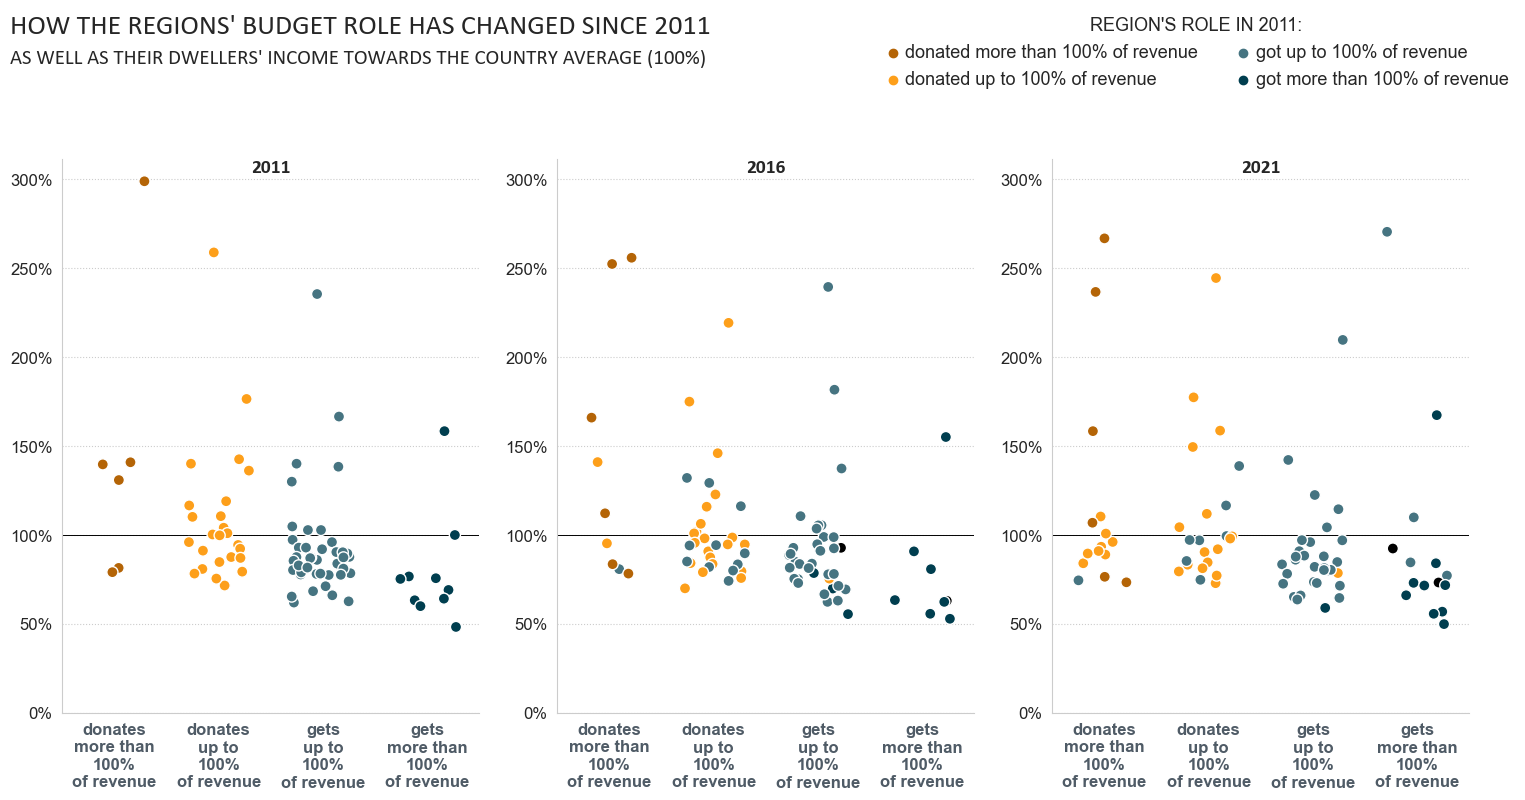

In [36]:
sns.set_style("whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15, 7))

plt.clf()

ax1 = plt.subplot2grid((1, 3), (0, 0))

plt.subplots_adjust(wspace=0.8)

stripplot_kwargs = dict({
    'size': 8,
    'linewidth': 1,
    'edgecolor': 'w',
    'alpha': 1
})

# the region's place stands for its class in the corresponding year;
# the region's color stands for its class in 2011

ax1 = sns.stripplot(
    x='region_class',
    y='income_tw_mean',
    data=income_change.query('year == 2011 & income_tw_mean > 0'),
    order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    hue='region_class_2011',
    hue_order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    jitter=0.3,
    palette=['#b46406', '#fd9f1a', '#467481', '#003e4f'],
    **stripplot_kwargs)
ax1.axhline(100, color='k', linewidth=0.7, zorder=2)
ax1.xaxis.label.set_visible(False)
ax1.yaxis.label.set_visible(False)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylim(ymin=0)
ax1.set_title('2011', fontsize=14, fontweight='bold', pad=-10, **hfont)
ax1.grid(which='major', axis='y', linestyle=':')

for label in ax1.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', color='#4f5b66')
for label in ax1.get_yticklabels():
    label.set(fontsize=12)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks([
    0, 1, 2, 3
])
ax1.set_xticklabels([
    'donates\nmore than\n100%\nof revenue', 'donates\nup to\n100%\nof revenue',
    'gets\nup to\n100%\nof revenue', 'gets\nmore than\n100%\nof revenue'
])
ax1.get_legend().remove()

ax2 = plt.subplot2grid((1, 3), (0, 1), sharey=ax1)

ax2 = sns.stripplot(
    x='region_class',
    y='income_tw_mean',
    data=income_change.query('year == 2016 & income_tw_mean > 0'),
    order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    hue='region_class_2011',
    hue_order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    jitter=0.3,
    palette=['#b46406', '#fd9f1a', '#467481', '#003e4f'],
    **stripplot_kwargs)

ax2.axhline(100, color='k', linewidth=0.7, zorder=2)
ax2.xaxis.label.set_visible(False)
ax2.yaxis.label.set_visible(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylim(ymin=0)
ax2.set_title('2016', fontsize=14, fontweight='bold', pad=-10, **hfont)
ax2.grid(which='major', axis='y', linestyle=':')

for label in ax2.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', color='#4f5b66')
for label in ax2.get_yticklabels():
    label.set(fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks([
    0, 1, 2, 3
])
ax2.set_xticklabels([
    'donates\nmore than\n100%\nof revenue', 'donates\nup to\n100%\nof revenue',
    'gets\nup to\n100%\nof revenue', 'gets\nmore than\n100%\nof revenue'
])
ax2.get_legend().remove()

ax3 = plt.subplot2grid((1, 3), (0, 2), sharey=ax1)

ax3 = sns.stripplot(
    x='region_class',
    y='income_tw_mean',
    data=income_change.query('year == 2021 & income_tw_mean > 0'),
    order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    hue='region_class_2011',
    hue_order=[
        'donor_100_and_more', 'donor_up_to_100', 'dependent_up_to_100',
        'dependent_100_and_more'
    ],
    jitter=0.3,
    palette=['#b46406', '#fd9f1a', '#467481', '#003e4f'],
    **stripplot_kwargs)
ax3.axhline(100, color='k', linewidth=0.7, zorder=2)
ax3.xaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.set_title('2021', fontsize=14, fontweight='bold', pad=-10, **hfont)
ax3.grid(which='major', axis='y', linestyle=':')
ax3.set_ylim(ymin=0)

for label in ax3.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', color='#4f5b66')
for label in ax3.get_yticklabels():
    label.set(fontsize=12)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks([
    0, 1, 2, 3
])
ax3.set_xticklabels([
    'donates\nmore than\n100%\nof revenue', 'donates\nup to\n100%\nof revenue',
    'gets\nup to\n100%\nof revenue', 'gets\nmore than\n100%\nof revenue'
])
ax3.get_legend().remove()

h, l = ax3.get_legend_handles_labels()
fig.legend(h[:4], [
    'donated more than 100% of revenue', 'donated up to 100% of revenue',
    'got up to 100% of revenue', 'got more than 100% of revenue'
],
           ncol=2,
           bbox_to_anchor=(0, 1, 1.02, 0),
           loc='lower right',
           fontsize=13,
           frameon=False,
           handlelength=1,
           handletextpad=0.2,
           title="REGION'S ROLE IN 2011:",
           title_fontsize=13)

fig.suptitle("HOW THE REGIONS' BUDGET ROLE HAS CHANGED SINCE 2011",
             x=0.01,
             y=1.13,
             fontsize=20,
             ha='left',
             va='top',
             **hfont)
fig.text(
    0.01,
    1.06,
    "AS WELL AS THEIR DWELLERS' INCOME TOWARDS THE COUNTRY AVERAGE (100%)",
    fontsize=15,
    **hfont)

plt.tight_layout()

plt.show()

#### Key Takeaways

- The income level towards the country's average stays almost without any changes between groups throughout the years, as the chart shows. The majority of regions in all the groups make less than the country's average income. In general, the more cashflow shifts towards the region, the poorer its dwellers are. The poor regions get more support from the state. The rich pay more; it's logical.


- The general trend is to drift to the left part of the chart; we see the former "up to 100%" donors among the "100%+" donors in 2016 and 2021, as well as former "up to 100%" takers among the "up to 100%" donors.


- However, there's also a tendency among "up to 100%" donors to join the ranks of "100%+" donors. So, "up to 100%" takers drift to two destinations, while if the region is a donor, it will either preserve its status or begin to give away more.

In the next chunk, we'll see how the real income in different classes of regions has changed since 2013, the year when Russians' wealth peaked.

In [37]:
regional_realinc = df.query('i1 == 1 & i3 == 6')[[
    'year', 'index', 'region_eng', 'value'
]].pivot(index=['year', 'region_eng'], columns='index',
         values='value').loc['2014':'2021'].fillna(0) / 100
regional_realinc['realinc_tw_2013'] = regional_realinc.groupby(
    level=1)['real_income'].cumprod()

regional_realinc = regional_realinc.join(classes2013).join(classes2021)
regional_realinc = regional_realinc.reset_index()
regional_realinc['realinc_tw_2013'] = (
    regional_realinc['realinc_tw_2013'] * 100 - 100).round(1)
regional_realinc['real_income'] = (regional_realinc['real_income'] * 100 -
                                   100).round(1)
regional_realinc.head()

year          region_eng  real_income  realinc_tw_2013  \
0  2014              adygea          9.9              9.9   
1  2014               altai          8.4              8.4   
2  2014          altai krai          6.1              6.1   
3  2014         amur oblast          1.9              1.9   
4  2014  arkhangelsk oblast          2.2              2.2   

        region_class_2013       region_class_2021  
0     dependent_up_to_100     dependent_up_to_100  
1  dependent_100_and_more  dependent_100_and_more  
2     dependent_up_to_100     dependent_up_to_100  
3  dependent_100_and_more  dependent_100_and_more  
4     dependent_up_to_100     dependent_up_to_100

#### [Chart 17: How the regions' budget role and real income has changed since 2011](#contents) <a class="anchor" id="chart_17"></a>

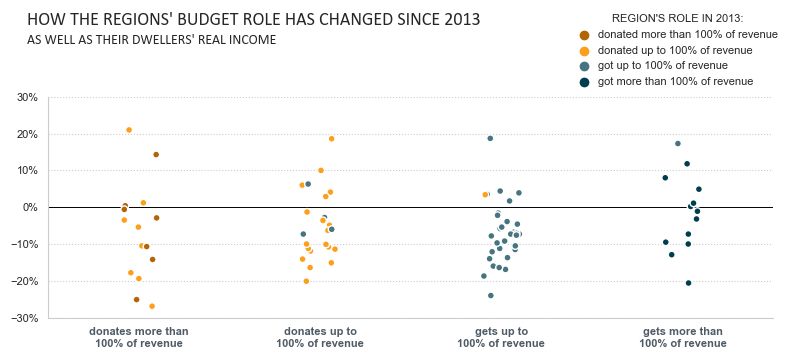

In [38]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 4))

stripplot_kwargs = dict({
    'size': 5,
    'linewidth': 1,
    'edgecolor': 'w',
    'alpha': 1
})

ax = sns.stripplot(x='region_class_2021',
                   y='realinc_tw_2013',
                   data=regional_realinc.query('year == 2021'),
                   order=[
                       'donor_100_and_more', 'donor_up_to_100',
                       'dependent_up_to_100', 'dependent_100_and_more'
                   ],
                   hue='region_class_2013',
                   hue_order=[
                       'donor_100_and_more', 'donor_up_to_100',
                       'dependent_up_to_100', 'dependent_100_and_more'
                   ],
                   jitter=0.1,
                   palette=['#b46406', '#fd9f1a', '#467481', '#003e4f'],
                   **stripplot_kwargs)
ax.axhline(0, color='k', linewidth=0.7, zorder=2)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(ymin=-30, ymax=30)
ax.grid(which='major', axis='y', linestyle=':')

for label in ax.get_xticklabels():
    label.set(fontsize=8, fontweight='bold', color='#4f5b66')
for label in ax.get_yticklabels():
    label.set(fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([
    0, 1, 2, 3
])
ax.set_xticklabels([
    'donates more than\n100% of revenue', 'donates up to\n100% of revenue',
    'gets up to\n100% of revenue', 'gets more than\n100% of revenue'
])

h, l = ax.get_legend_handles_labels()
ax.legend(h[:4], [
    'donated more than 100% of revenue', 'donated up to 100% of revenue',
    'got up to 100% of revenue', 'got more than 100% of revenue'
],
          bbox_to_anchor=(0, 1, 1.02, 0),
          loc='lower right',
          fontsize=8,
          frameon=False,
          handlelength=1,
          handletextpad=0.7,
          title="REGION'S ROLE IN 2013:",
          title_fontsize=8)

fig.suptitle("HOW THE REGIONS' BUDGET ROLE HAS CHANGED SINCE 2013",
             x=0.04,
             y=0.88,
             fontsize=13,
             ha='left',
             va='top',
             **hfont)
fig.text(0.04,
         0.8,
         "AS WELL AS THEIR DWELLERS' REAL INCOME",
         fontsize=10,
         **hfont)

plt.tight_layout()

plt.show()

#### Key Takeaways

- Here we see the real income dynamics in comparison to 2013, as well as the change in the regions' classes. It's obvious that in the majority of new 100% donors, the real income has fallen by up to 28%, but this didn't stop them from becoming 100% donors. Moreover, the scale of the real income fall is the largest among the 100% donors.


- There are also three regions that saw a fall in real incomes but requalified from takers to donors. This can be a subject for further exploration.

### [How did the regional standard of living change?](#contents) <a class="anchor" id="part_4_5"></a>

Now let's analyze how some important regional spending per capita changed, e.g., healthcare, education, social policy, infrastructure, etc. We'll again divide the regions into classes, and color these groups according to their class in 2021. And we'll see if anything changed for the regions that were donors in 2021 in terms of budget spending, and how.

In [39]:
regional_spendings = df.query(
    '(i1 == 1 & i3 == 2 & s1 in (5,7,9,10) & s2 == 0) | (i1 == 1 & i3 == 2 & s1 == 4 & s2 in (8,9))'
)[['year', 'index', 'region_eng', 'value']].pivot(index=['year', 'region_eng'],
                                                  columns='index',
                                                  values='value').fillna(0)
population = df.query('i3 == 5')[['year', 'index', 'region_eng',
                                  'value']].pivot(index=['year', 'region_eng'],
                                                  columns='index',
                                                  values='value').fillna(0)
rub_usd = df.query('i3 == 9')[['year', 'index', 'region_eng',
                               'value']].pivot(index=['year', 'region_eng'],
                                               columns='index',
                                               values='value').fillna(0)
classes2021 = regional_flows.loc[2021][['region_class']]

# -> USD
regional_spendings_usd = regional_spendings.div(rub_usd.rub_usd,
                                                axis=0).round(1)
# -> per capita
regional_spendings_pc = regional_spendings_usd.div(population.population,
                                                   axis=0).round(1)
# we'll analyse the regions in classes as of 2021
regional_spendings_pc = regional_spendings_pc.join(classes2021).reset_index()

regional_spendings_pc = regional_spendings_pc[[
    'year', 'region_eng', 'healthcare', 'education', 'social policy ',
    'housing and utilities sector', 'public road system', 'transportation',
    'region_class'
]]

regional_spendings_pc.head()

year          region_eng  healthcare  education  social policy   \
0  2011              adygea       194.4      265.7           185.0   
1  2011               altai       295.0      624.7           274.9   
2  2011          altai krai       213.7      298.4           197.8   
3  2011         amur oblast       361.1      495.2           402.1   
4  2011  arkhangelsk oblast       326.7      527.7           374.2   

   housing and utilities sector  public road system  transportation  \
0                          74.7                27.7             4.3   
1                         179.4               498.8            16.9   
2                          77.2                62.1             9.0   
3                         284.2                85.9            16.5   
4                         241.7                61.7            14.4   

             region_class  
0     dependent_up_to_100  
1  dependent_100_and_more  
2     dependent_up_to_100  
3  dependent_100_and_more  
4     dependent_up_to_100

#### [Chart 18: How the regions' per capita spendings have changed since 2016](#contents) <a class="anchor" id="chart_18"></a>

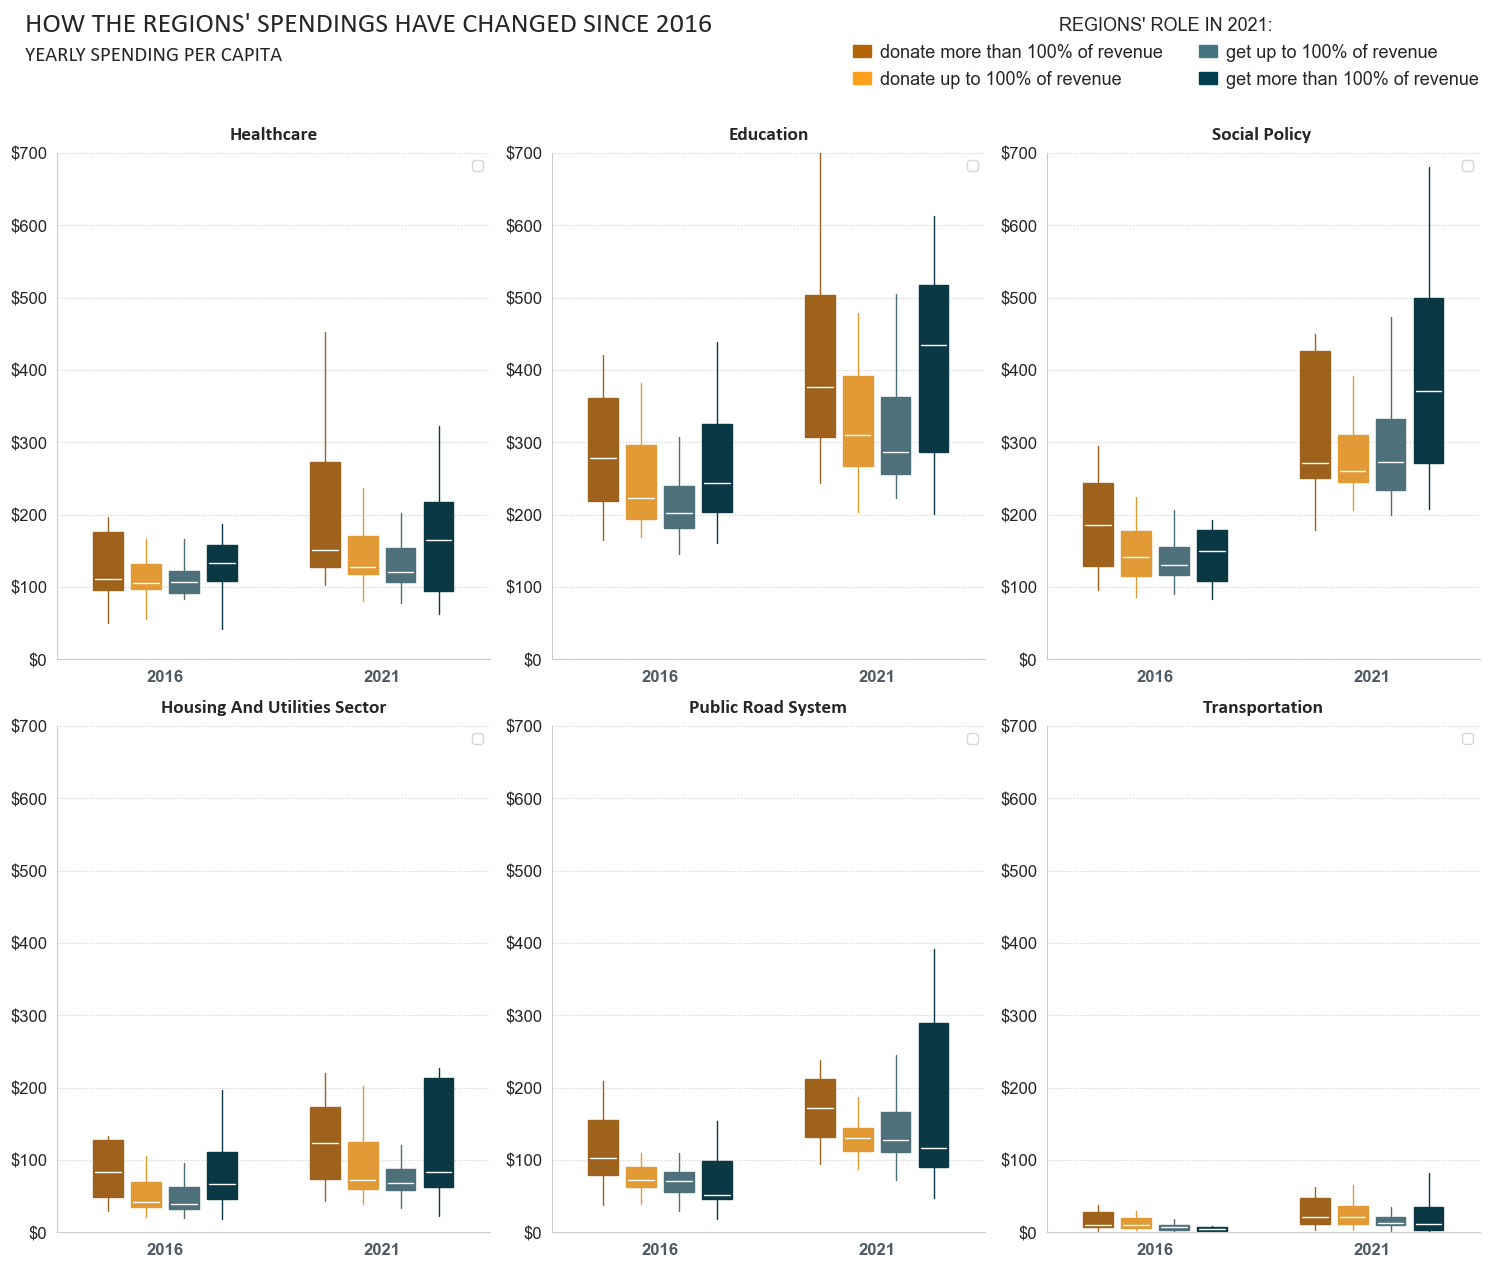

In [40]:
# the next function narrows the boxes, I took it from Stackoverflow and modified a bit
def adjust_box_widths(g, fac):

    for ax in g.axes:

        for c in ax.get_children():

            if isinstance(c, PathPatch):
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5 * (xmin + xmax)
                xhalf = 0.5 * (xmax - xmin)

                xmin_new = xmid - fac * xhalf
                xmax_new = xmid + fac * xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new + 0.01, xmax_new - 0.01])

x = 'year'

y = []
for n in regional_spendings_pc.columns[2:8]:
    y.append(n)

titles = []
for n in regional_spendings_pc.columns[2:8].str.title():
    titles.append(n)

colors = {"donor_100_and_more": "#b46406",
          "donor_up_to_100": "#fd9f1a", 
          "dependent_up_to_100":'#467481', 
          "dependent_100_and_more":'#003e4f'}

boxprops = {'linewidth': 1}
lineprops = {'linewidth': 1}
medianprops = {'color': 'w', 'linewidth': 1}
capprops = {'linewidth': 0}

boxplot_kwargs = dict({
    'boxprops': boxprops,
    'medianprops': medianprops,
    'whiskerprops': lineprops,
    'capprops': capprops,
    'width': 0.7
})

rows, cols = 2, 3
fig, axes = plt.subplots(rows,
                         cols,
                         sharex=True,
                         sharey=True,
                         squeeze=False,
                         figsize=(15, 12))

plt.clf()

# a cycle to make a grid of charts
i = 0
for n in range(2):
    for m in range(3):
        ax = plt.subplot2grid((2, 3), (n, m))

        sns.boxplot(x=x,
                    y=y[i],
                    data=regional_spendings_pc.query('year in (2016, 2021)'),
                    hue='region_class',
                    hue_order=[
                        'donor_100_and_more', 'donor_up_to_100',
                        'dependent_up_to_100', 'dependent_100_and_more'
                    ],
                    palette = colors,
                    dodge=True,
                    fliersize=0,
                    **boxplot_kwargs,
                    ax=ax)
        
        box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
        num_patches = len(box_patches)
        lines_per_boxplot = len(ax.lines) // num_patches
        for m, patch in enumerate(box_patches):
            col = patch.get_facecolor()
            patch.set_edgecolor(col)
            for line in ax.lines[m * lines_per_boxplot: (m + 1) * lines_per_boxplot]:
                line.set_color(col)
                line.set_mfc(col) 
                line.set_mec(col)
            ax.lines[m * lines_per_boxplot: (m + 1) * lines_per_boxplot][4].set_color('#ffffff')

        ax.set_ylim(ymin=0, ymax=700)
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)
        ax.set_title(titles[i],
                     fontsize=14,
                     fontweight='bold',
                     pad=10,
                     **hfont)
        ax.grid(which='major', axis='y', linestyle=':')
        for label in ax.get_xticklabels():
            label.set(fontsize=12, fontweight='bold', color='#4f5b66')
        for label in ax.get_yticklabels():
            label.set(fontsize=12)
        ax.yaxis.set_major_formatter('${x:1.0f}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.legend([])
        if i == 0:
            h, l = ax.get_legend_handles_labels()
        i += 1
        
# narrowing the boxes
adjust_box_widths(fig, 0.8)

# legend
patch1 = mpatches.Patch(color='#b46406',
                        label='donate more than 100% of revenue')
patch2 = mpatches.Patch(color='#fd9f1a', label='donate up to 100% of revenue')
patch3 = mpatches.Patch(color='#467481', label='get up to 100% of revenue')
patch4 = mpatches.Patch(color='#003e4f', label='get more than 100% of revenue')
fig.legend(handles=[patch1, patch2, patch3, patch4],
           ncol=2,
           bbox_to_anchor=(0, 1.06, 1, 0),
           loc='upper right',
           fontsize=13,
           frameon=False,
           handlelength=1,
           handletextpad=0.5,
           title="REGIONS' ROLE IN 2021:",
           title_fontsize=13)

fig.suptitle("HOW THE REGIONS' SPENDINGS HAVE CHANGED SINCE 2016",
             x=0.02,
             y=1.05,
             fontsize=20,
             ha='left',
             va='top',
             **hfont)
fig.text(0.02, 1.01, "YEARLY SPENDING PER CAPITA", fontsize=15, **hfont)

plt.tight_layout()

plt.show()

#### Key Takeaways

- Here we see the regions divided by their class in a corresponding year, but colored according to their class in 2021. In other words, we see what has actually changed for the current donors, dependents, etc. during the last five years in terms of per capita budget.


- Spending on healthcare has grown everywhere proportionally, which is not surprising given that there was a pandemic year. However, the range of these expenditures has grown significantly in "100%+" donor and "100%+" dependent regions, particularly in the former. The same goes for public transportation.


- In education and social policy, the leaders are the "100%+" donors and the "100%+" dependents again, but the dependents spend more. The same is true for housing and public roads. 

#### [Chart 19: How the regions' standard of living has changed since 2016](#contents) <a class="anchor" id="chart_19"></a>

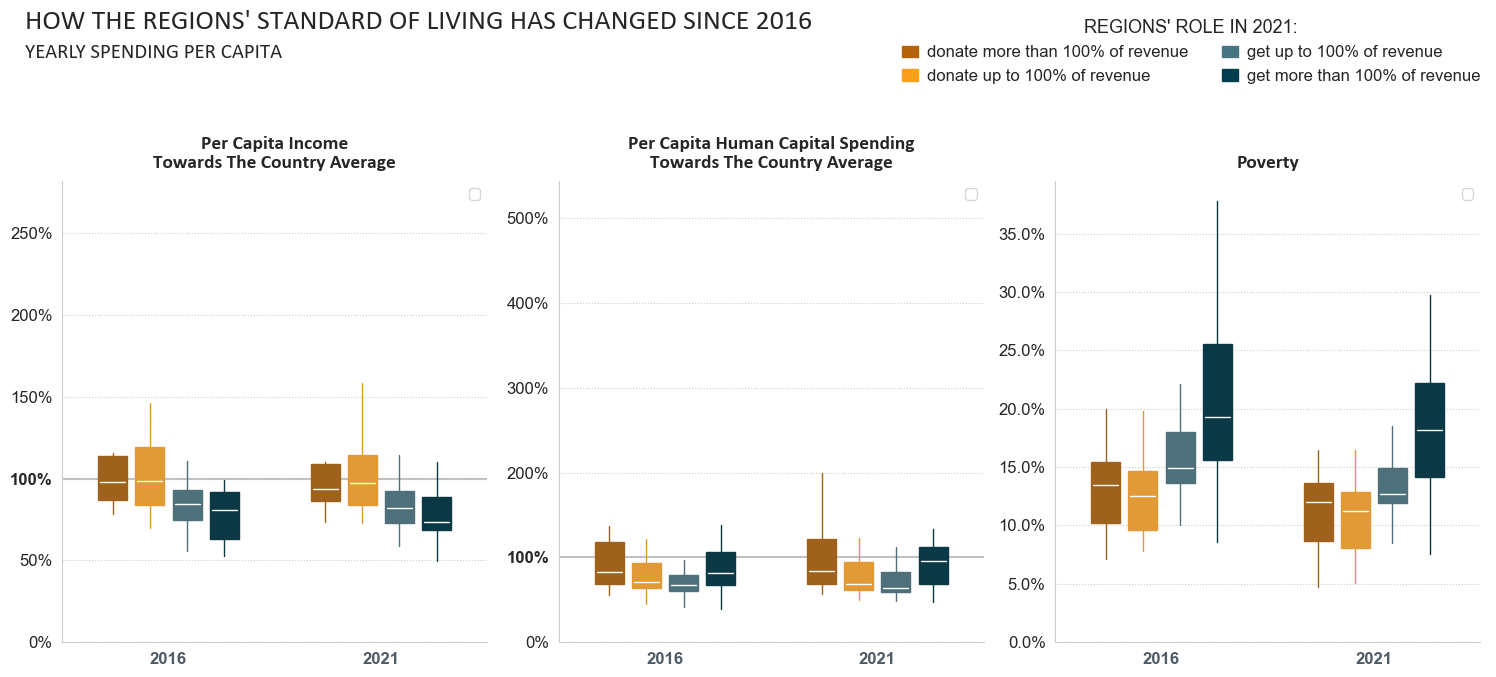

In [41]:
x = 'year'

y = []
for n in income_change.columns[3:6]:
    y.append(n)

titles = [
    'Per Capita Income\nTowards The Country Average',
    'Per Capita Human Capital Spending\nTowards The Country Average', 'Poverty'
]

colors = {
    "donor_100_and_more": "#b46406",
    "donor_up_to_100": "#fd9f1a",
    "dependent_up_to_100": '#467481',
    "dependent_100_and_more": '#003e4f'
}

boxprops = {'linewidth': 1}
lineprops = {'linewidth': 1}
medianprops = {'color': 'w', 'linewidth': 1}
capprops = {'linewidth': 0}

boxplot_kwargs = dict({
    'boxprops': boxprops,
    'medianprops': medianprops,
    'whiskerprops': lineprops,
    'capprops': lineprops,
    'capprops': capprops,
    'width': 0.7
})

rows, cols = 1, 3
fig, axes = plt.subplots(rows,
                         cols,
                         sharex=True,
                         squeeze=False,
                         figsize=(15, 6))

i = 0
for m in range(3):
    ax = plt.subplot2grid((1, 3), (0, m))

    sns.boxplot(x=x,
                y=y[i],
                data=income_change.query('year in (2016, 2021)'),
                hue='region_class_2021',
                hue_order=[
                    'donor_100_and_more', 'donor_up_to_100',
                    'dependent_up_to_100', 'dependent_100_and_more'
                ],
                palette=colors,
                dodge=True,
                fliersize=0,
                **boxplot_kwargs,
                ax=ax)
    
    box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
    num_patches = len(box_patches)
    lines_per_boxplot = len(ax.lines) // num_patches
    for m, patch in enumerate(box_patches):
        col = patch.get_facecolor()
        patch.set_edgecolor(col)
        for line in ax.lines[m * lines_per_boxplot: (m + 1) * lines_per_boxplot]:
            line.set_color(col)
            line.set_mfc(col) 
            line.set_mec(col)
        ax.lines[m * lines_per_boxplot: (m + 1) * lines_per_boxplot][4].set_color('#ffffff')

    ax.set_ylim(ymin=0)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(titles[i], fontsize=14, fontweight='bold', pad=10, **hfont)
    ax.grid(which='major', axis='y', linestyle=':')
    for label in ax.get_xticklabels():
        label.set(fontsize=12, fontweight='bold', color='#4f5b66')
    for label in ax.get_yticklabels():
        label.set(fontsize=12)
    if i in (0, 1):
        ax.axhline(100, color='#BFBFBF', linestyle='-', zorder=0)
    if i == 0:
        ax.get_yticklabels()[2].set_weight('bold')
    if i == 1:
        ax.get_yticklabels()[1].set_weight('bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend([])
    if i == 0:
        h, l = ax.get_legend_handles_labels()
    i += 1

adjust_box_widths(fig, 0.8)

patch1 = mpatches.Patch(color='#b46406',
                        label='donate more than 100% of revenue')
patch2 = mpatches.Patch(color='#fd9f1a', label='donate up to 100% of revenue')
patch3 = mpatches.Patch(color='#467481', label='get up to 100% of revenue')
patch4 = mpatches.Patch(color='#003e4f', label='get more than 100% of revenue')
fig.legend(handles=[patch1, patch2, patch3, patch4],
           ncol=2,
           bbox_to_anchor=(0, 1.13, 1, 0),
           loc='upper right',
           fontsize=12,
           frameon=False,
           handlelength=1,
           handletextpad=0.5,
           title="REGIONS' ROLE IN 2021:",
           title_fontsize=13)

fig.suptitle("HOW THE REGIONS' STANDARD OF LIVING HAS CHANGED SINCE 2016",
             x=0.02,
             y=1.12,
             fontsize=20,
             ha='left',
             va='top',
             **hfont)
fig.text(0.02, 1.04, "YEARLY SPENDING PER CAPITA", fontsize=15, **hfont)

plt.tight_layout()

plt.show()

#### Key Takeaways

- There have been no significant changes in wealth or human capital spending for residents of different regional classes over the last five years.


- The poverty level has fallen quite proportionally in the donor regions; as for the dependent, the decrease is notable.

## [Conclusions](#contents) <a class="anchor" id="part_5"></a>

- There's a disproportion between how much money the Russian regions make for themselves and how much they pay into the federal budget. Since 2017, the amount of payment has increased significantly and exceeded the regions' total revenues.


- The main tax paid to the federation is the mineral extraction tax. However, there are other taxes that also define the amount of the regions' tributes. Firstly, it's VAT but also corporate income tax and, in recent years, the hydrocarbon extraction tax. All of these are usually connected to mining, and to oil in particular.


- The maximum amount of money that is given away by a region reached 12 region's own revenues in 2021. And it increased in the vast majority of Russian regions, not only those that are mining but those that are not oil-bearing as well. There are also new oil-bearing leaders, which were earlier considered too "complicated" for mining.


- The donor status of the region has no significant effect on its residents' wealth dynamics. The rich regions stay rich, the poor stay poor, no matter how much money the federal center makes on their resources. The real income dynamic is negative towards 2013 in the majority of regions, regardless of their meaning to the country's budget.


- On average, the regions that pay into the federal budget a sum equal to or exceeding their own revenues, as well as the regions that take from the state a sum equal to 100% or more of their own revenues, spend notably more on human capital, infrastructure, social policy, and housing.